## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user
#!pip install imbalanced-learn

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd


# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV


## Import Dataset

In [4]:
data = pd.read_csv("EasyVisa.csv")
df = data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [5]:
df.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.6500         Year                  Y   Certified  
2      122996.8600         Year                  Y      Denied  
3       83434.0300         Year                  Y      Denied  
4      149907.3900         Year                  Y   Certified

In [6]:
df.tail()

case_id continent education_of_employee has_job_experience  \
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
25475                South         77092.57         Year                  Y   
25476            Northeast        279174.79         Year                  Y   
25477                South        146298.85         Year                  N   
25478                 West         86154.77         Year                  Y   
25479              Midwest         70876.91         Year                  Y   

      case_status  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified

#### Understand the shape of the dataset

In [7]:
df.shape

(25480, 12)

- There are 25,480 observations and 12 columns in the dataset

#### Check the data types of the columns for the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
print("Missing value")
print(df.isnull().sum())

Missing value
case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


In [10]:
print("Duplicate values")
print("Data set has {} duplicates".format(df.duplicated().sum()))

Duplicate values
Data set has 0 duplicates


### Observation

* The dataset has columns/attributes with integer, float, and object data type. 
* There are no missing values in the data.
* The dataset doesn't have any duplicates.

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [11]:
df.describe().T

count          mean           std        min       25%  \
no_of_employees  25480.0   5667.043210  22877.928848   -26.0000   1022.00   
yr_of_estab      25480.0   1979.409929     42.366929  1800.0000   1976.00   
prevailing_wage  25480.0  74455.814592  52815.942327     2.1367  34015.48   

                      50%          75%        max  
no_of_employees   2109.00    3504.0000  602069.00  
yr_of_estab       1997.00    2005.0000    2016.00  
prevailing_wage  70308.21  107735.5125  319210.27

### Observations

* no_of_employees has negative values.
* no_of_employees has right skewed distribution with outliers as its max is 602069 which is far more than 1.5 * IQR.
* yr_of_estab has slightly left skewed distribution.
* prevailing_wage has right skewed distribution with outliers as its max is 319210.27 which is far more than 1.5 * IQR.


#### Fixing the negative values in number of employees columns

In [12]:
# Checking no_of_employees column
df['no_of_employees'].describe().T

count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [13]:
total_neg_value_no_of_employees = df[df['no_of_employees'] < 0]['no_of_employees'].count()
print('total number of rows having negative value in no_of_employees = {}'.format(total_neg_value_no_of_employees))

total number of rows having negative value in no_of_employees = 33


In [14]:
df[df['no_of_employees'] < 0].head()

case_id      continent education_of_employee has_job_experience  \
245    EZYV246         Europe              Master's                  N   
378    EZYV379           Asia            Bachelor's                  N   
832    EZYV833  South America              Master's                  Y   
2918  EZYV2919           Asia              Master's                  Y   
6439  EZYV6440           Asia            Bachelor's                  N   

     requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
245                      N              -25         1980            Northeast   
378                      Y              -11         2011            Northeast   
832                      N              -17         2002                South   
2918                     N              -26         2005              Midwest   
6439                     N              -14         2013                South   

      prevailing_wage unit_of_wage full_time_position case_status  
245          39452.99         Year                  Y   Certified  
378          32506.14         Year                  Y      Denied  
832         129701.94         Year                  Y   Certified  
2918        112799.46         Year                  Y   Certified  
6439           103.97         Hour                  Y      Denied

In [15]:
# As no_of_employees can't be negative. Therefore, sign is irrelevant that is caused by manual data entry
# That's why we will take the absolute of for the no_of_employees column.
df['no_of_employees'] = df['no_of_employees'].abs()
# Print the modified DataFrame
df['no_of_employees'].describe().T

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

#### Let's check the count of each unique category in each of the categorical variables

In [16]:
# Finding the unique values of categorical column
# input:
# df -> dataframe
# column_name -> Column/Attribute name
def unique_values(df, column_name):
    column_data_type_name = df.dtypes[column_name].name
    is_numeric = True if column_data_type_name not in ["object", "string"] else False

    if not is_numeric:
        df_unique_value_count = df[column_name].value_counts()
        #print("Total unique value is '\033[1m{}\033[0m' for attribute/column: '\033[1m{}\033[0m'".format(len(df_unique_value_count.index), column_name))
        print("Column \033[1m{}\033[0m has total \033[1m{}\033[0m unique values".format(column_name, len(df_unique_value_count.index)))
        #printing underline text
        print("\n\033[4m{}\033[0m  \033[4mTotal Count\033[0m".format(column_name))
        print(df_unique_value_count)
        
# Drawing a horizontal line
# Input: 
# length -> number of char/length of a line
def print_horizontal_line(length):
    print("-" * length)

def get_bold_text(txt):
    bold_start = "\033[1m"
    bold_end = "\033[0m"
    return bold_start + txt + bold_end



In [17]:
for column_name in df.select_dtypes(include=['object']).columns.tolist():
    unique_values(df, column_name)
    print_horizontal_line(30)
    

Column case_id has total 25480 unique values

case_id  Total Count
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
------------------------------
Column continent has total 6 unique values

continent  Total Count
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
------------------------------
Column education_of_employee has total 4 unique values

education_of_employee  Total Count
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
------------------------------
Column has_job_experience has total 2 unique values

has_job_experience  Total Count
Y    14802
N    10678
Name: has_job_experience, dtype: int64
------------------------------
Col

### Univariate Analysis

In [18]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### 1. no_of_employees

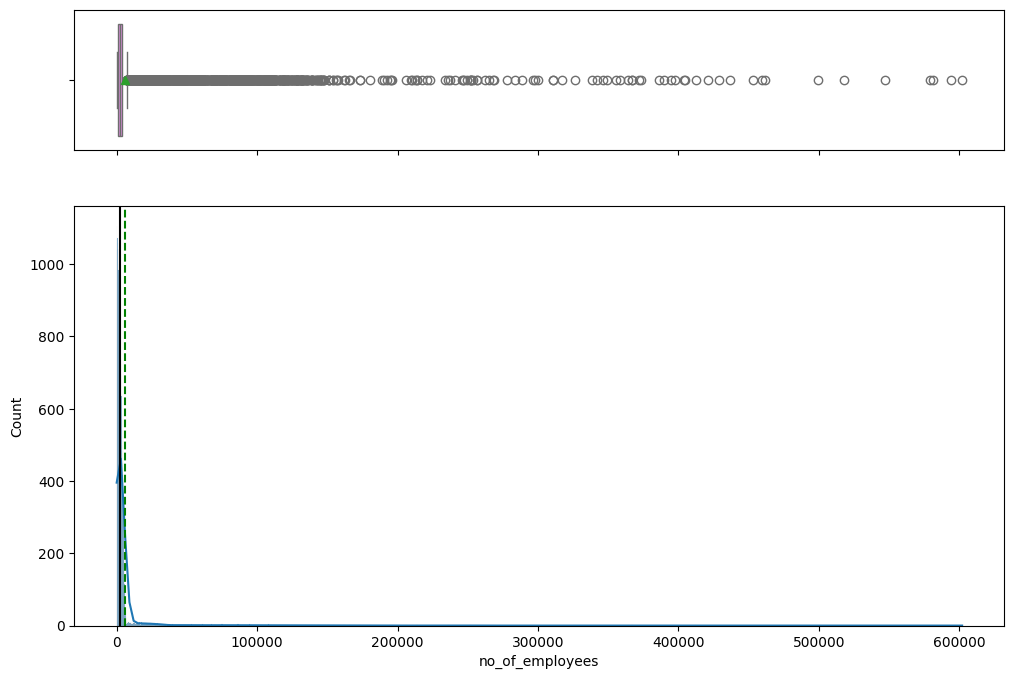

In [20]:
histogram_boxplot(df, 'no_of_employees', figsize=(12, 8), kde=True, bins=None)    

#### Observations on no_of_employees
* no_of_employees has a right skewed distribution with outliers.
* Number of employees in Companies of the majority of the submitted visa applications are in between 1022 and 3504.
* We can't discard the outerliers as they are the information for visa approval classification.

### 2. yr_of_estab

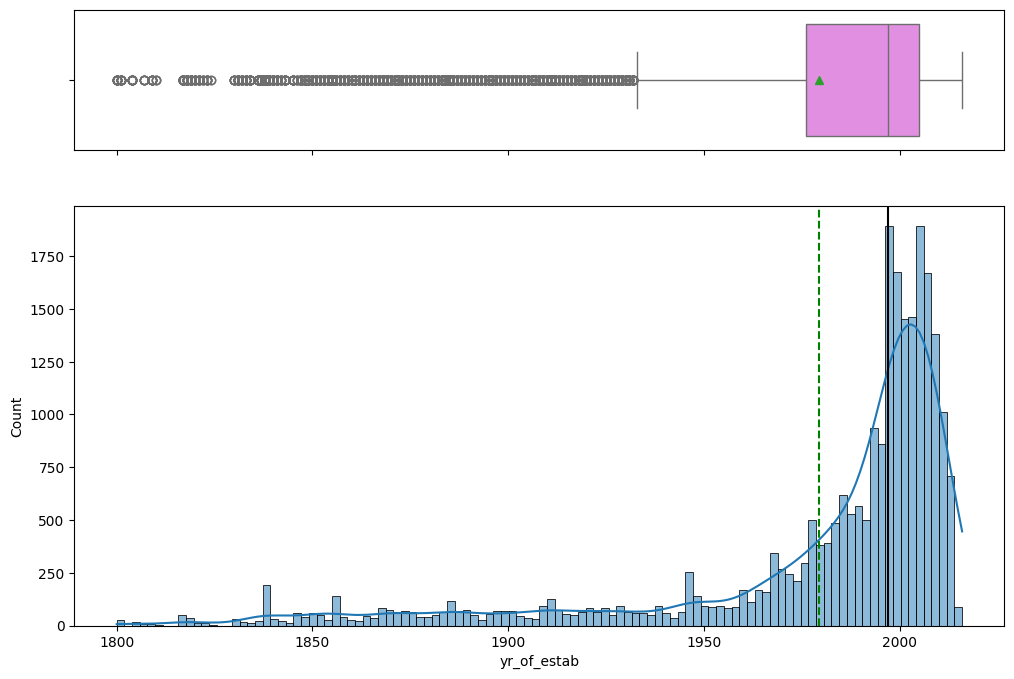

In [21]:
histogram_boxplot(df, 'yr_of_estab', figsize=(12, 8), kde=True, bins=None)


#### Observations on yr_of_estab
* yr_of_estab has a left skewed distribution with outliers.
* Companies of the majority of the submitted visa applications are establisted in between 1976 and 2005.
* We can't discard the outerliers as they are the information for visa approval classification.

### 3. prevailing_wage

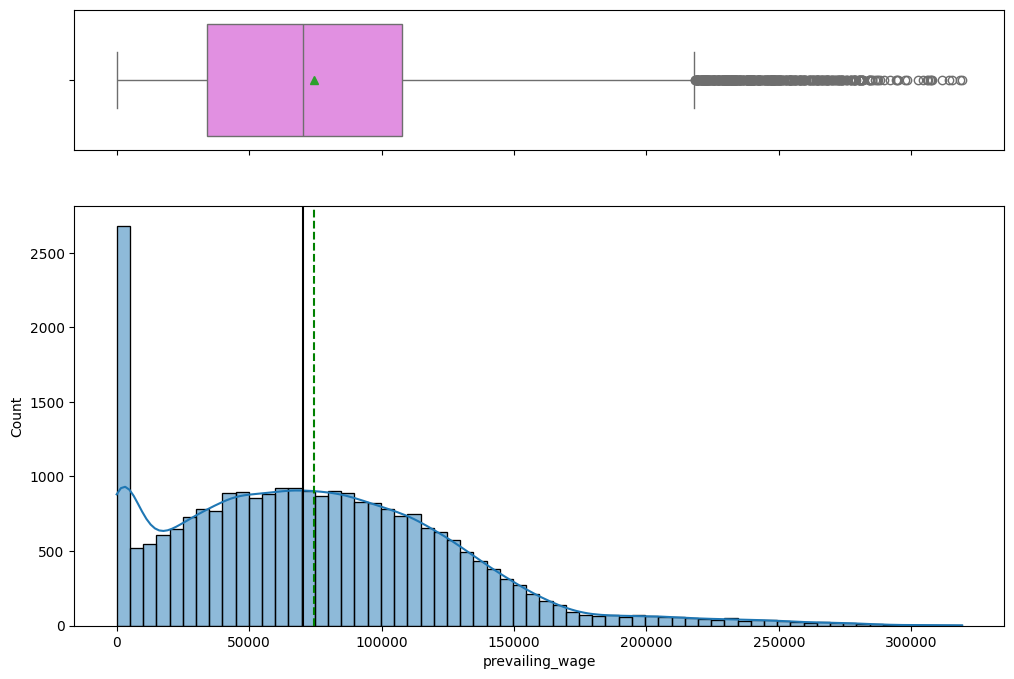

In [22]:
histogram_boxplot(df, 'prevailing_wage', figsize=(12, 8), kde=True, bins=None)


#### Observations on prevailing_wage
* prevailing_wage has a right skewed distribution with outliers.
* prevailing_wage has min \\$2.13, max \\$319210.27, mode \\$70308.21, and median \\$74455.81.
* We can't calculate yearly_wage from prevailing_wage based and unit_of_wage because we do not know the exact number of working hours in a day or the exact number of working days in a week and so on. Therefore, this column can be be discarded/keep as it is as it is ambigous.

### 4. case_id


#### Observations on case_id
There are 25480 unique case_id.
This column doesn't play important role for classification.
It can be dropped.

### 5. continent 

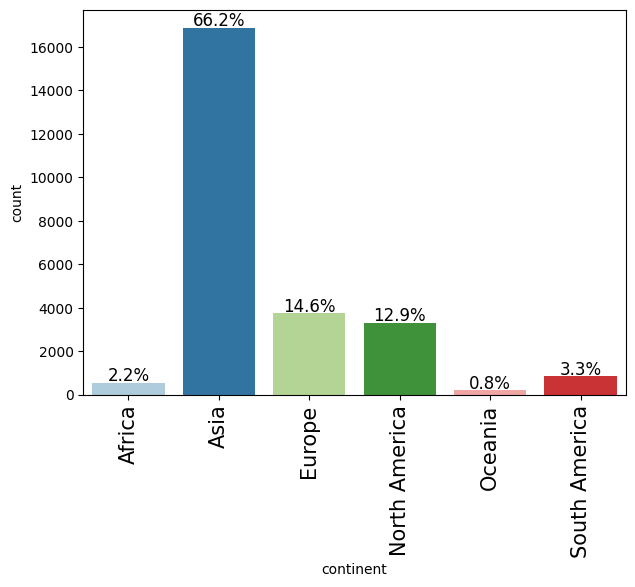

In [23]:
labeled_barplot(df, 'continent', perc=True)


#### Observations on continent of employee
* Highest visa applications were submitted from Asia which is 66.2%
* Lowest visa applications were submitted from Oceania which is 0.8%
* Moderate visa applications were submitted from Europe (14.6%) and North America (12.9%) 

### 6. education_of_employee

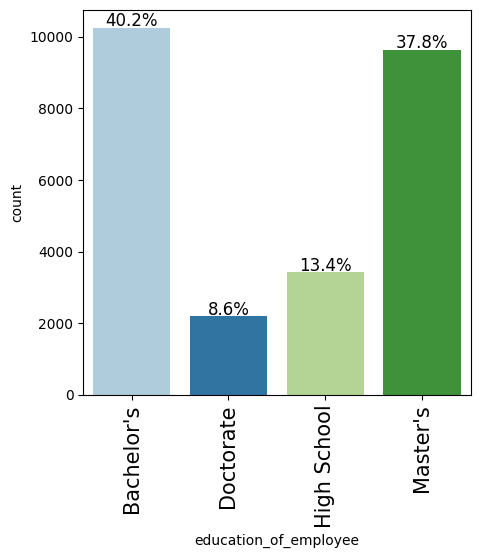

In [24]:
labeled_barplot(df, 'education_of_employee', perc=True)

#### Observations on education of employee
* Applicants of the 78% of visa applications have either Bachelor or Master degree.
* Top educational experience of visa applicants is Bachelor followed by Master, high school, and doctorate. 

#### 7. has_job_experience

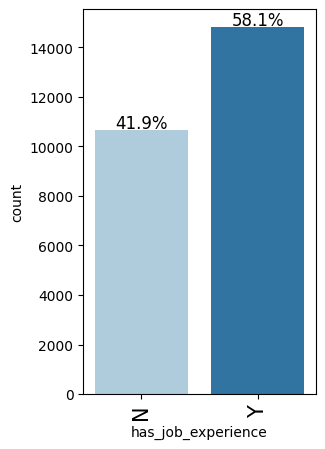

In [25]:
labeled_barplot(df, 'has_job_experience', perc=True)

#### Observations on has_job_experience of employment 
* Applicants of 58.1% of visa applications have job experience
* Applicants of 41.9% of visa applications don't have any job experience

#### 8. requires_job_training

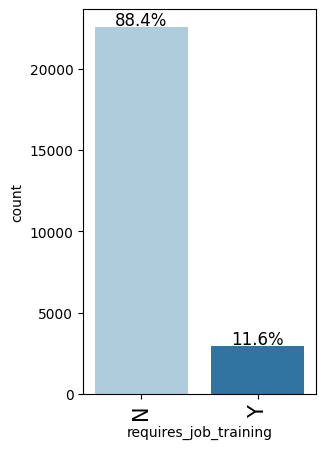

In [26]:
labeled_barplot(df, 'requires_job_training', perc=True)

#### Observations on requires_job_training of employment
* Majority of the visa applicants (88.4%) doesn't require job training.
* Only 11.6% of them require job training.

### 9. region_of_employment

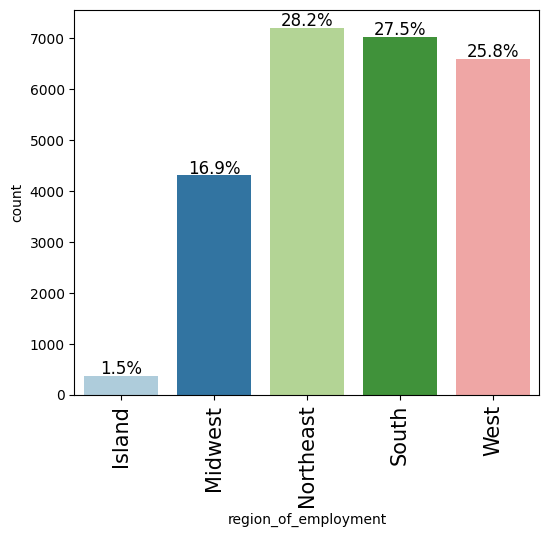

In [27]:
labeled_barplot(df, 'region_of_employment', perc=True)

#### Observations on region of employment
* Highest visa applications are submitted for Northeast (28.2%) region followed by South (27.5%), West (25.8%), Midwest (16.9%), and Island (1.5%).


#### 10. unit_of_wage

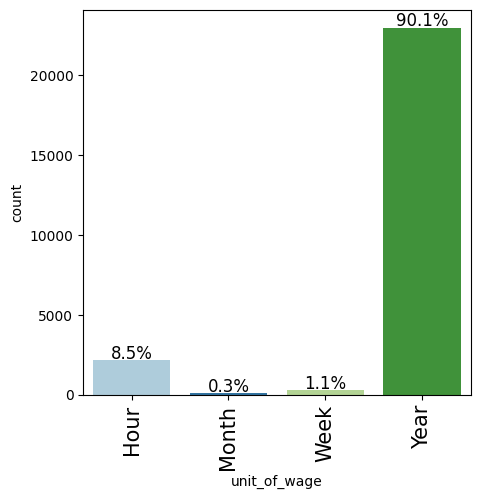

In [28]:
labeled_barplot(df, 'unit_of_wage', perc=True)

#### Observations on unit_of_wage of employment
* The unit of wage for job of majority (90.1%) visa applications is Year.
* Other unit of wages are Hour (8.5%), Week (1.1%), and Month (0.3%)

#### 11. full_time_position

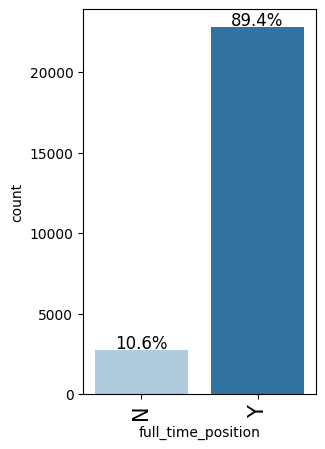

In [29]:
labeled_barplot(df, 'full_time_position', perc=True)

#### Observations on full_time_position
* Most visa applications are for full time position (89.4%) and the remaining (10.6%) for temporary/part time position.

#### 12. case_status

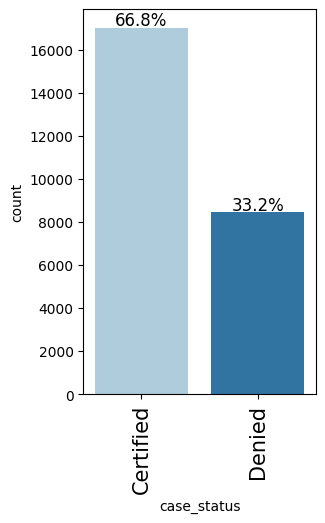

In [30]:
labeled_barplot(df, 'case_status', perc=True)

#### Observations on case status
* Majority of the Visa applications were accepted (66.8%).
* 33.2% of them denied.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [31]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [32]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### no_of_employees vs case_status

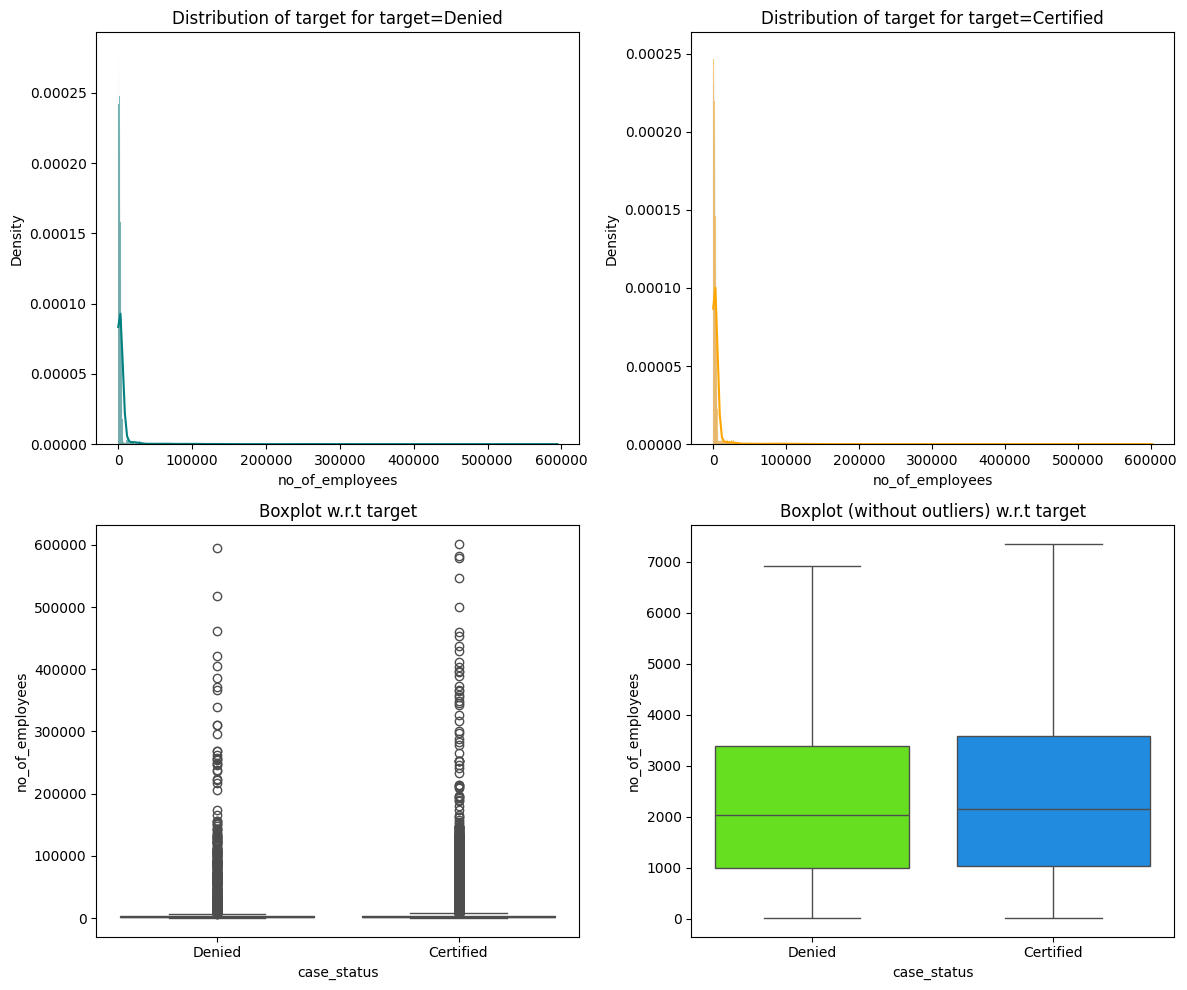

In [33]:
distribution_plot_wrt_target(df, 'no_of_employees', 'case_status')

#### Observations
* Number of employees in Companies of the majority of the accepted/certified visa applications are in between 1000 and 3500 with mean 2000.
* Number of employees in Companies of the majority of the denied visa applications are in between 1000 and 3200 with mean 2000.

### yr_of_estab vs case_status

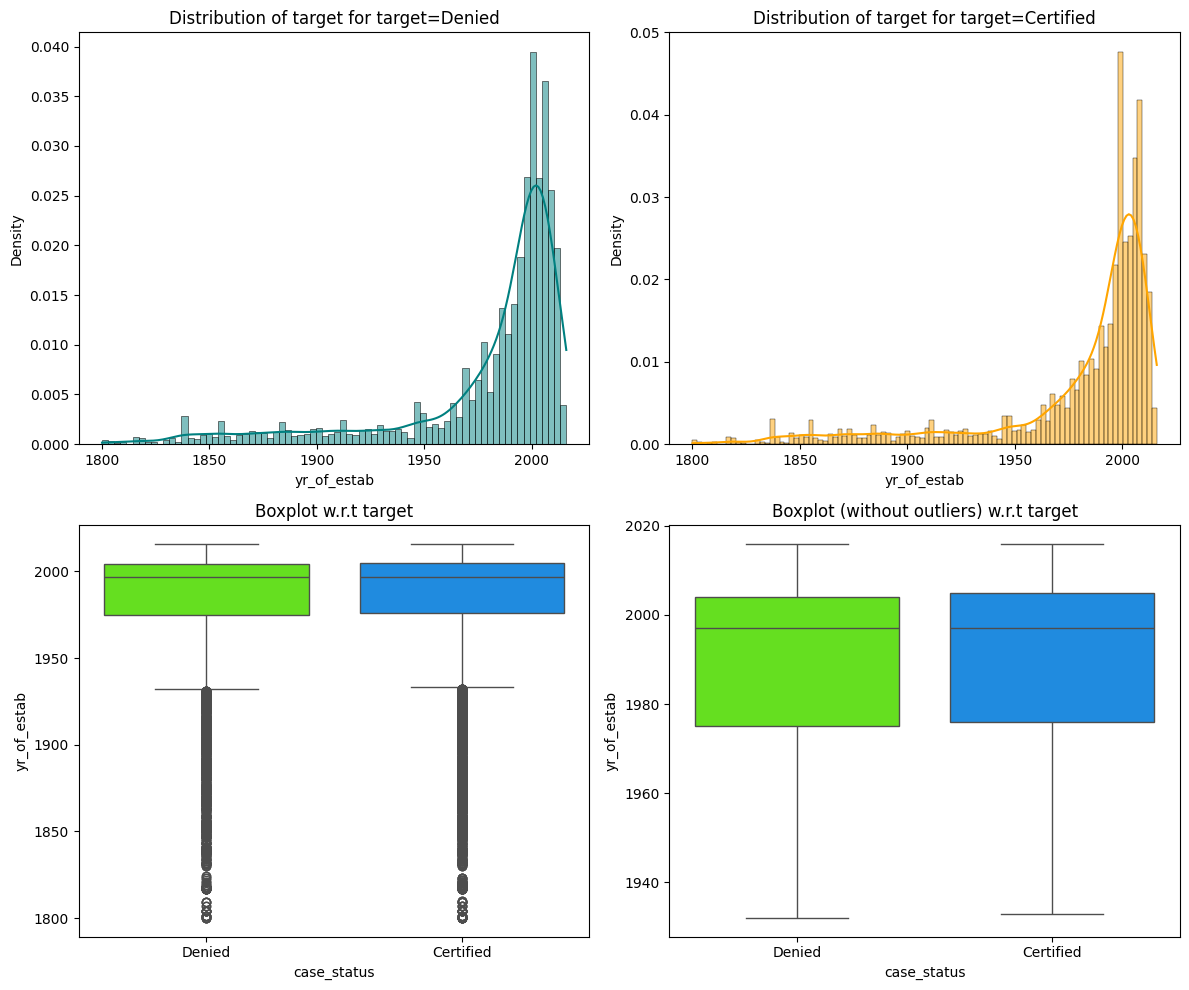

In [34]:
distribution_plot_wrt_target(df, 'yr_of_estab', 'case_status')


#### Observations
* yr_of_estab has a left skewed distribution with outliers for both denied and certified/approved applications.
* Companies of the majority of the certified/denied visa applications are establisted in between 1976 and 2005.
* We can't discard the outerliers as they are the information for visa approval classification.

### prevailing_wage vs case_status

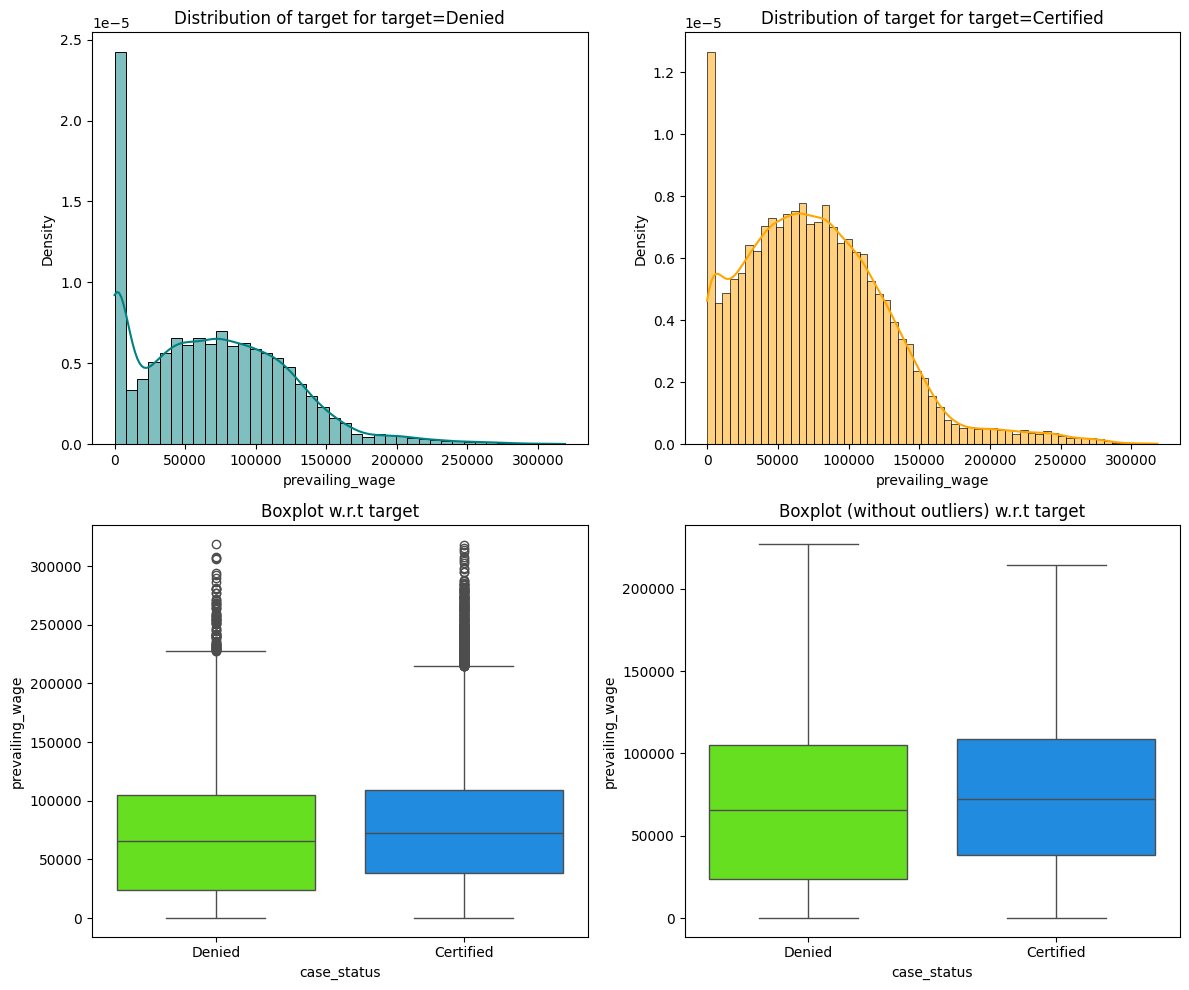

In [35]:
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')

In [36]:
df[df['case_status'] == 'Certified']['prevailing_wage'].describe().T

count     17018.000000
mean      77293.619243
std       52042.715576
min           2.136700
25%       38375.330000
50%       72486.270000
75%      108879.107500
max      318446.050000
Name: prevailing_wage, dtype: float64

In [37]:
df[df['case_status'] == 'Denied']['prevailing_wage'].describe().T

count      8462.000000
mean      68748.681580
std       53890.166031
min           2.956100
25%       23497.295000
50%       65431.460000
75%      105097.640000
max      319210.270000
Name: prevailing_wage, dtype: float64

#### Observations
* prevailing_wage has a right skewed distribution with outliers for both Certified and Denied applications.
* prevailing_wage has min \\$2.13, max \\$318446, median \\$72486.27, and mean \\$77293.62 among all Certified visa applications.
* prevailing_wage has min \\$2.95, max \\$319210.27, median \\$65431.46, and mean \\$68748.68 among all Denied visa applications.
* Certified visa applications have higher prevailing_wage (mean and IQR) than denied applications.
* We can't normalize the prevailing_wage column into yearly wage from prevailing_wage and its unit_of_wage because we do not know the exact number of working hours in a day or the exact number of working days in a week and so on. Therefore, prevailing_wage has a less impact for classification.

### case_id vs case_status


In [38]:
df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

#### Observations
* Total 25480 unique visa applications have been submitted.
* 17018 are certified and 8462 are denied.

### continent vs case_status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


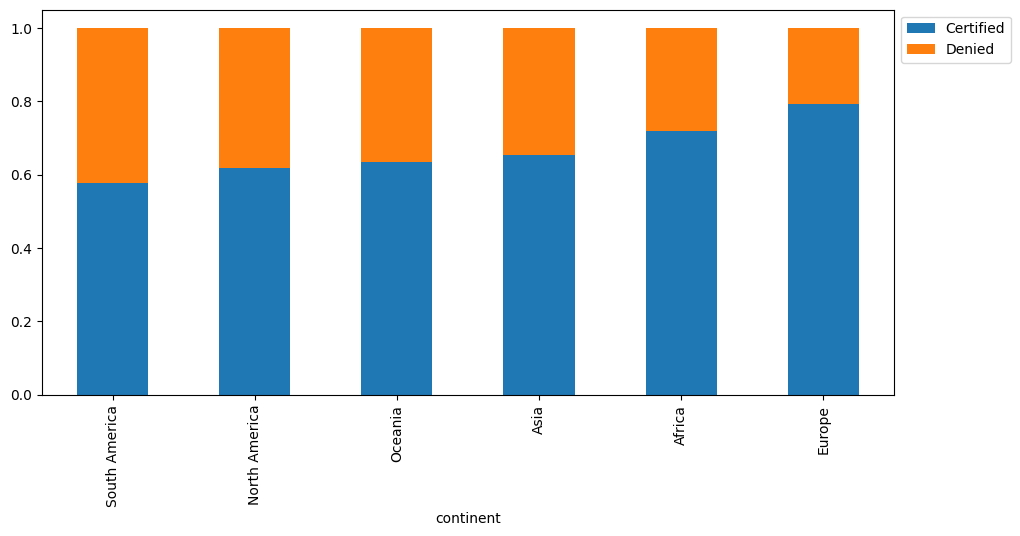

In [39]:
stacked_barplot(df, 'continent', 'case_status')


#### Observations
* Highest number of total visa applications were certified from Asia, followed by Europe, North America, South America, Africa, and Oceania.
* Highest number of total visa applications were denied from Asia, followed by North America, Europe, South America, Africa, and Oceania.
* Europe has the highest percentage/chance of getting their visa application certified, followed by Africa, Asia, Oceania, North America and South America (has the lowest percentage/ration).


### education_of_employee vs case_status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


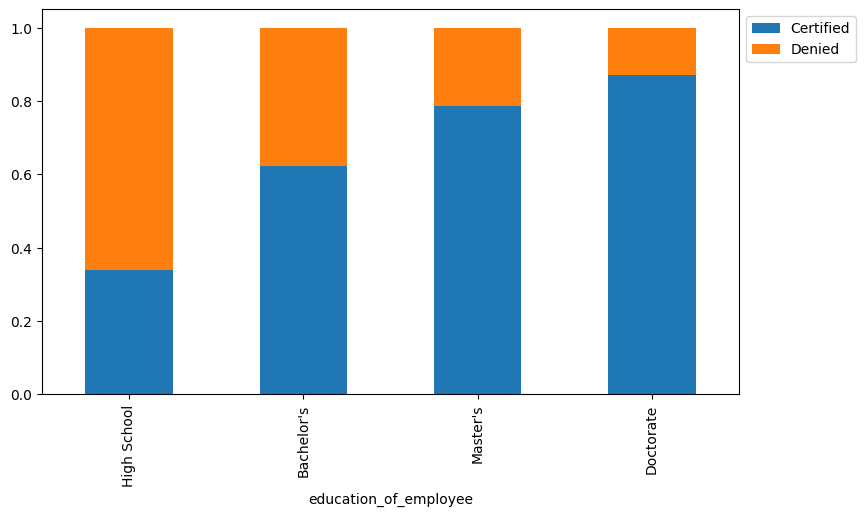

In [40]:
stacked_barplot(df, 'education_of_employee', 'case_status')

#### Observations
* Most doctorate applicants visa applications were certified/accepted.
* Most high school applicants visa applications were denied.
* It seems that education_of_employee has a strong correlation with certified visa application.

#### has_job_experience vs case_status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


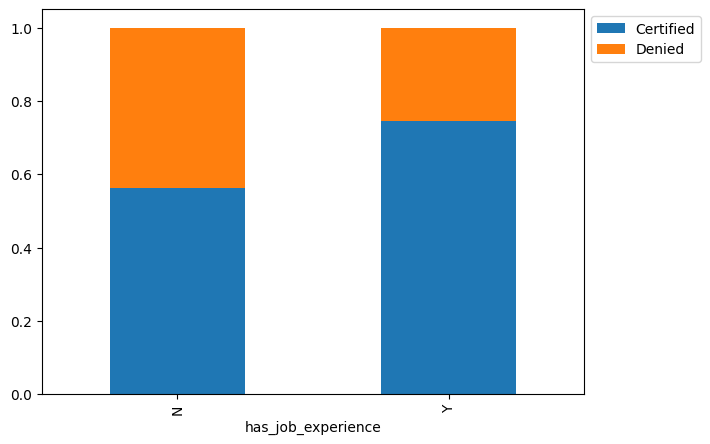

In [41]:
stacked_barplot(df, 'has_job_experience', 'case_status')

#### Observations 
* Applicants with job experience have higher chance (74%) to get their visa applications certfied.
* Applicants without job experience have almost 56% chance to accept their visa applications.

#### requires_job_training vs case_status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


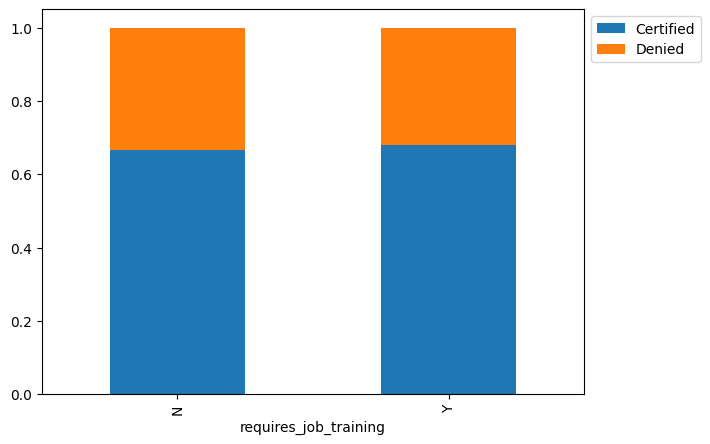

In [42]:
stacked_barplot(df, 'requires_job_training', 'case_status')

#### Observations
* 67% applications that require job training are certified.
* 65% applications that don't require job training are certified.
* 11.7% certified visa applications require job training.

### region_of_employment vs case_status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


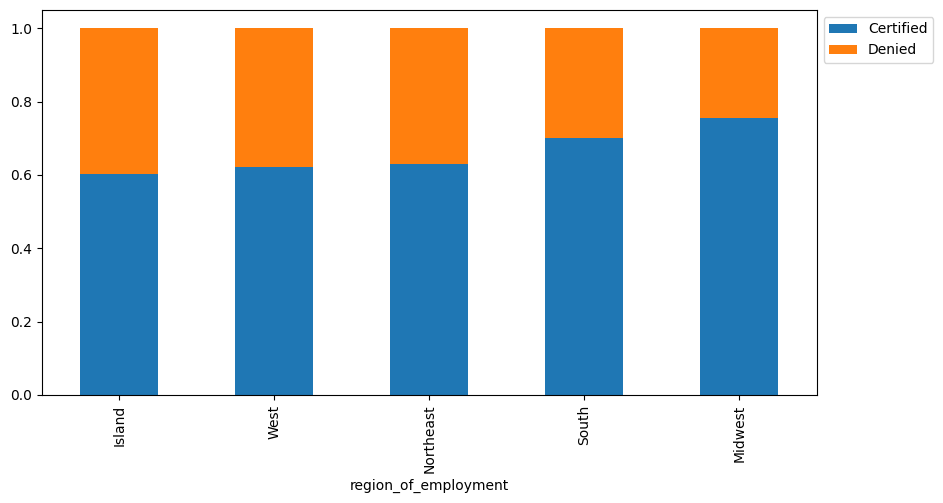

In [43]:
stacked_barplot(df, 'region_of_employment', 'case_status')

#### Observations on region of employment
* Highest visa applications are submitted for Northeast (28.2%) region followed by South (27.5%), West (25.8%), Midwest (16.9%), and Island (1.5%).
* Midwest has the highest certified visa application ratio followed by South, Northeast, West, and Island.


#### unit_of_wage vs case_status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


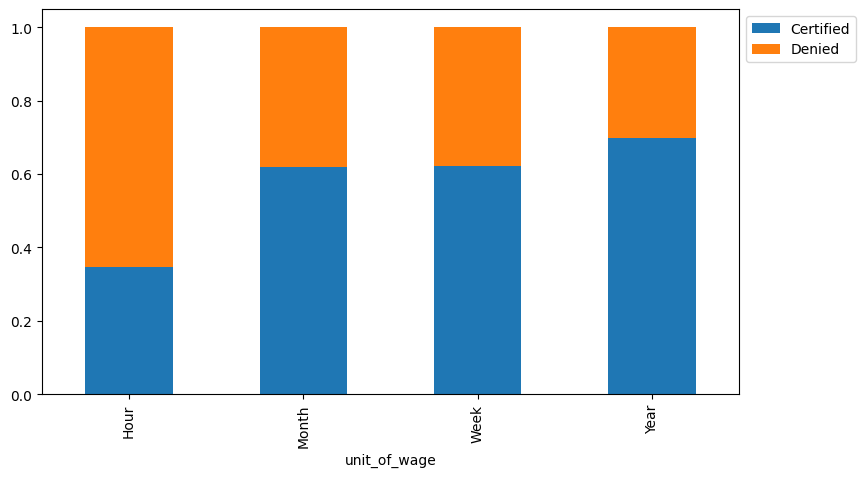

In [44]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

#### Observations
* Visa applications with yearly salary contract (unit of wage) have higher chance/probability to get certified followed by weekly, monthly, and hourly.
* Visa applications with hourly salary contract (unit of wage) has lowest chance/probability to get certified than others.
* Yearly salary contract (unit of wage) has the highest total 22962 visa applications with 16047 are certified.
* Monthly salary contract (unit of wage) has the lowest total 89 visa applications with 55 are certified.

#### full_time_position vs case_status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


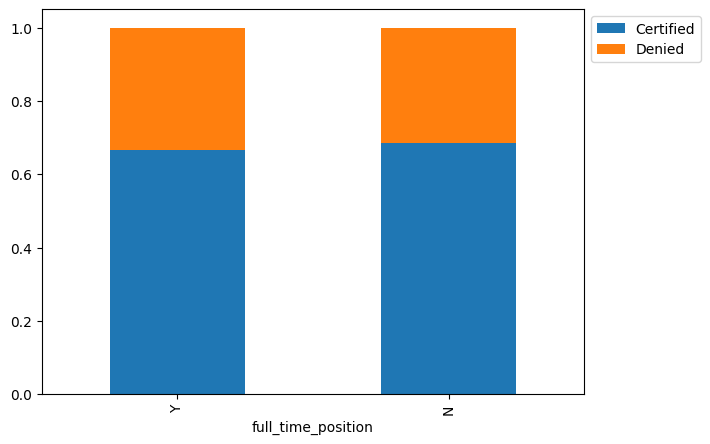

In [45]:
stacked_barplot(df, 'full_time_position', 'case_status')

#### Observations
* Most visa applications are for full time position (89.4%) and the remaining (10.6%) for temporary/part time position.
* 66% of visa application with full time position has been certified.
* 68% of visa application with part time/temporay position has been certified.

### region_of_employment region vs education_of_employee

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
region_of_employment                                                      
All                         10234       2192         3420      9634  25480
West                         2925        714          785      2162   6586
Northeast                    2874        656          905      2760   7195
South                        2991        541          934      2551   7017
Midwest                      1315        256          736      2000   4307
Island                        129         25           60       161    375
------------------------------------------------------------------------------------------------------------------------


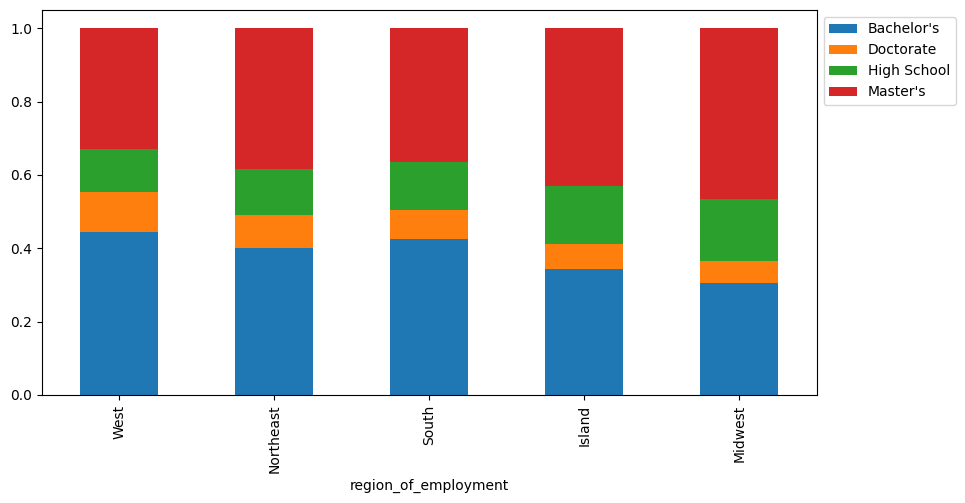

In [46]:
stacked_barplot(df, 'region_of_employment', 'education_of_employee')

#### Observations
* Midwest has highest percentage of applicants with Master's degree followed by Island, Northeast, South, and West.
* West has highest percentage of applicants with Bachelor's degree followed by South, Northeast, Island, Midwest.
* West has highest percentage of applicants with Doctorate degree followed by Northeast, South, Island, Midwest.
* Midwest has highest percentage of applicants with High School degree followed by Island, South, Northeast, and West.

#### prevailing_wage vs education_of_employee

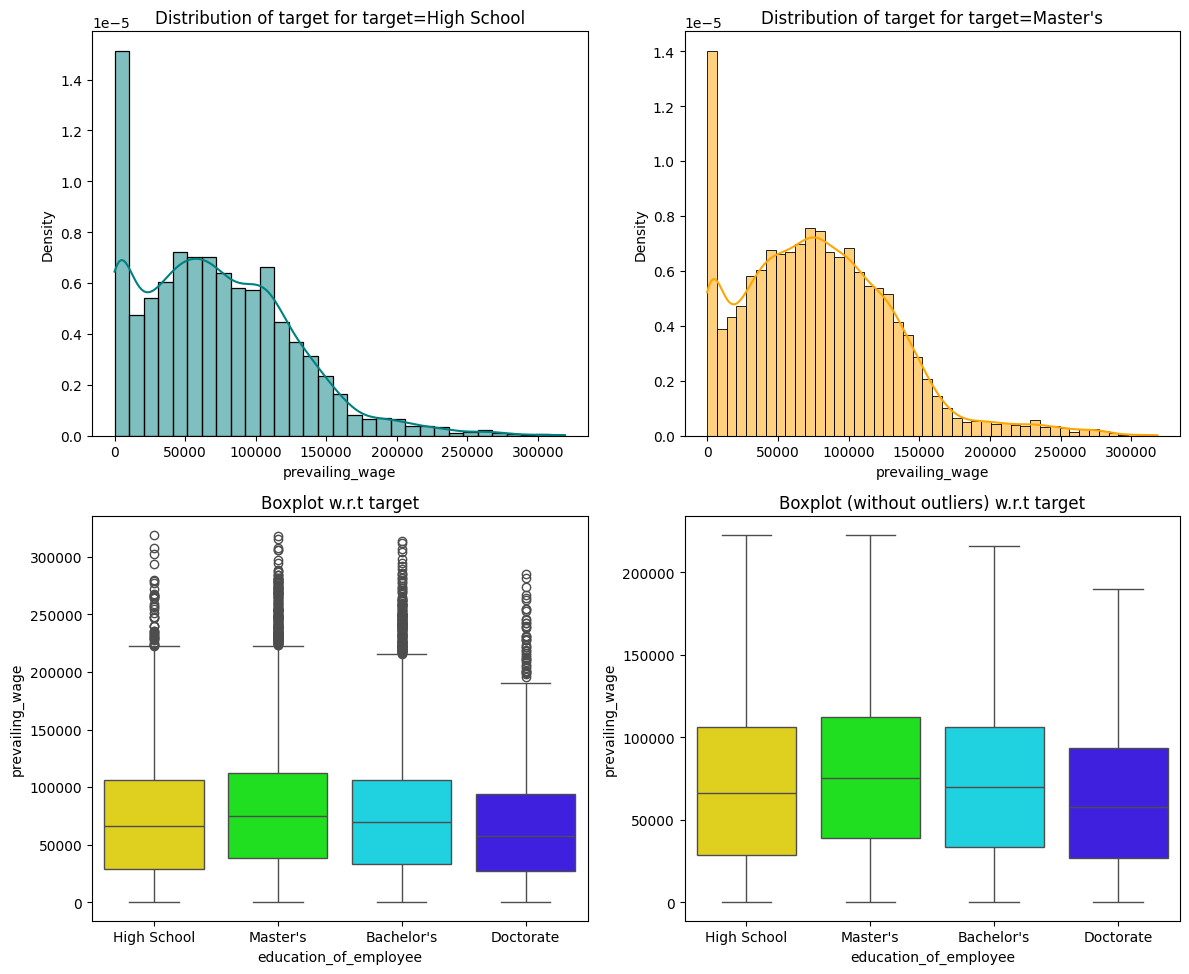

In [47]:
distribution_plot_wrt_target(df, 'prevailing_wage', 'education_of_employee')

#### Observations
* Applicants with Master's degree has highest prevailing_wage followed by Bachelor's, High School, and Doctorate. 

#### prevailing_wage vs has_job_experience 

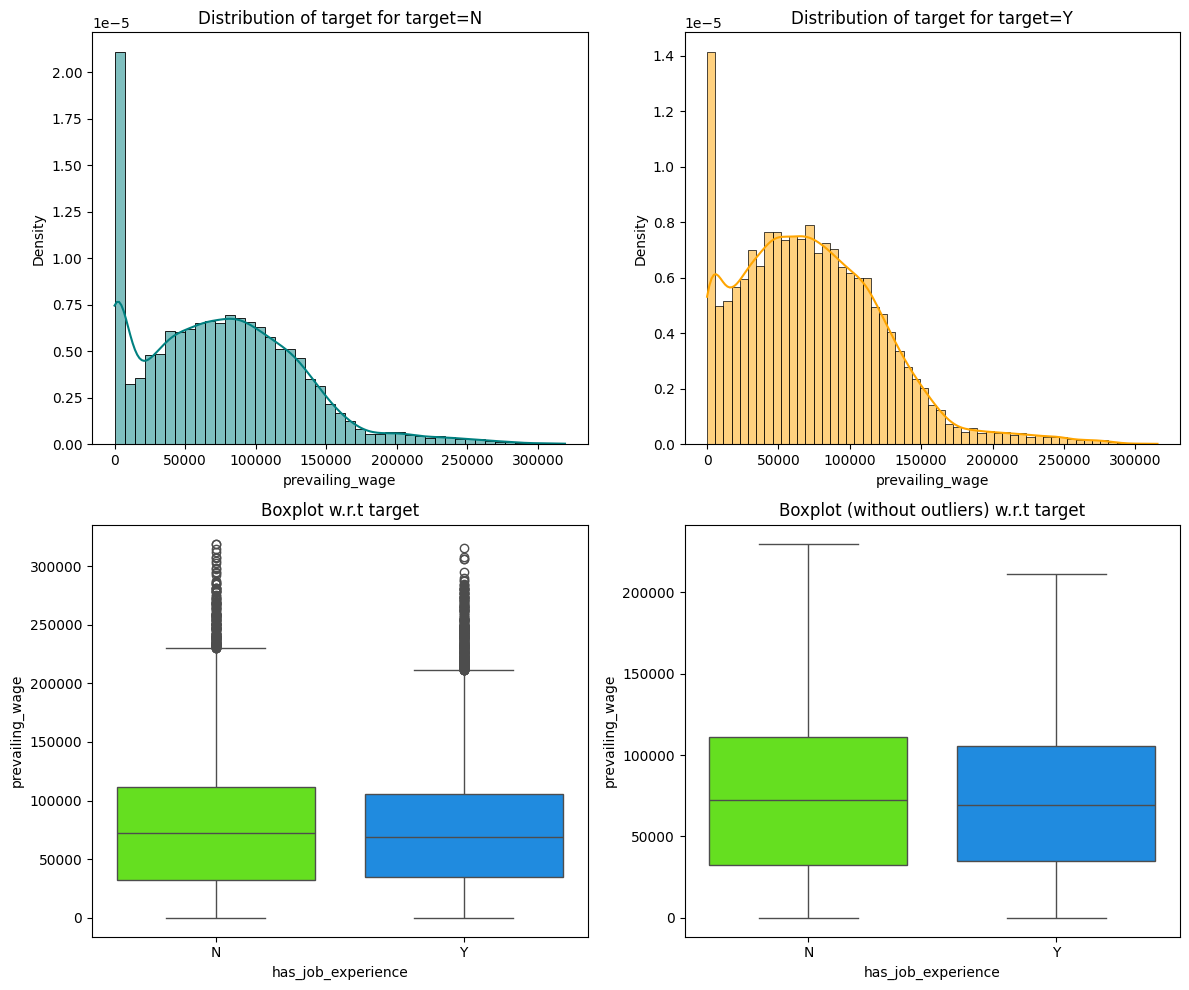

In [48]:
distribution_plot_wrt_target(df, 'prevailing_wage', 'has_job_experience')

#### Observations
* Applicants with no job experience has higher prevailing_wage than applicants with job experience.

#### prevailing_wage vs requires_job_training

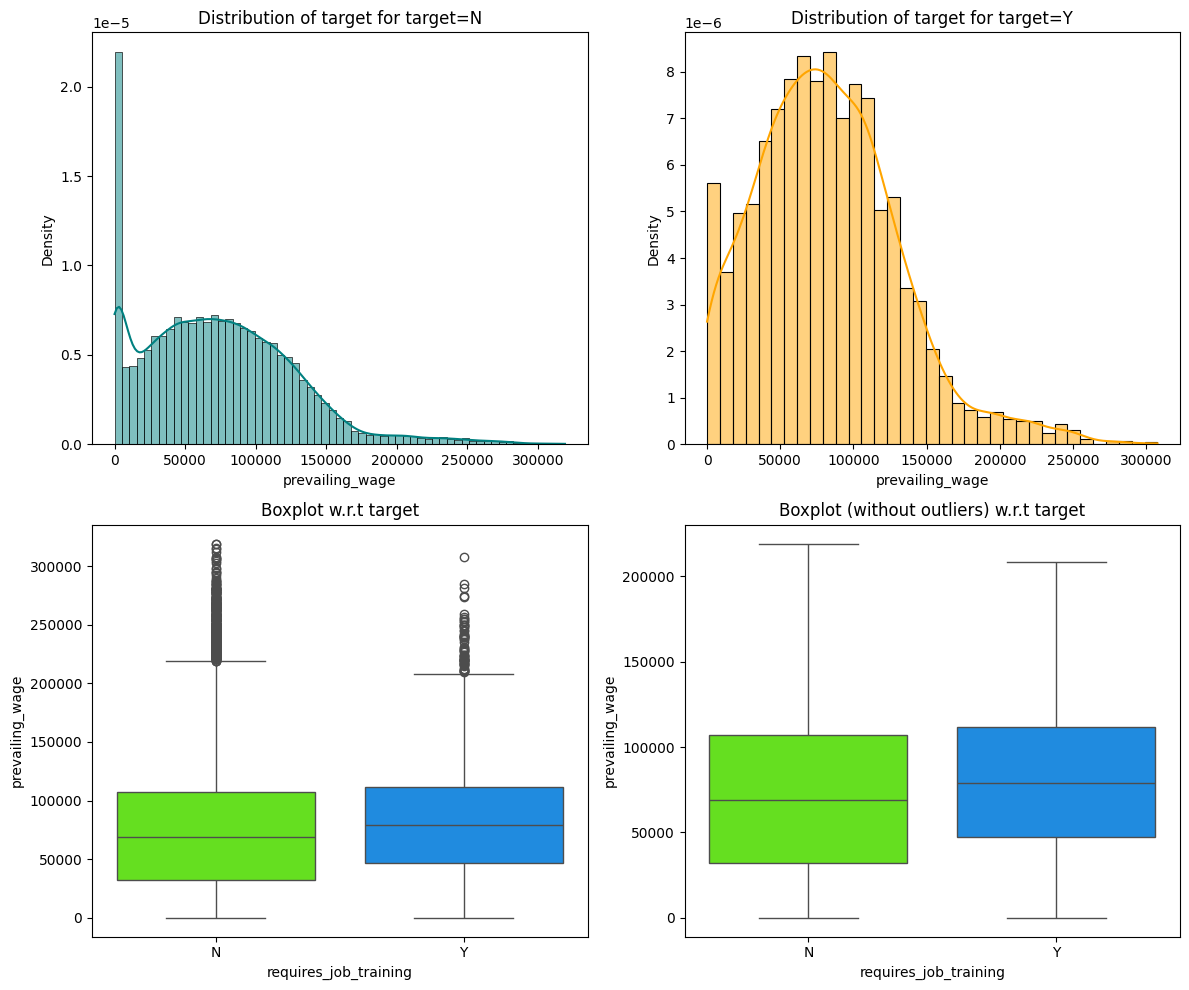

In [49]:
distribution_plot_wrt_target(df, 'prevailing_wage', 'requires_job_training')

#### Observations
* Applicants who require job training has higher prevailing_wage than applicants who don't.

#### prevailing_wage vs unit_of_wage

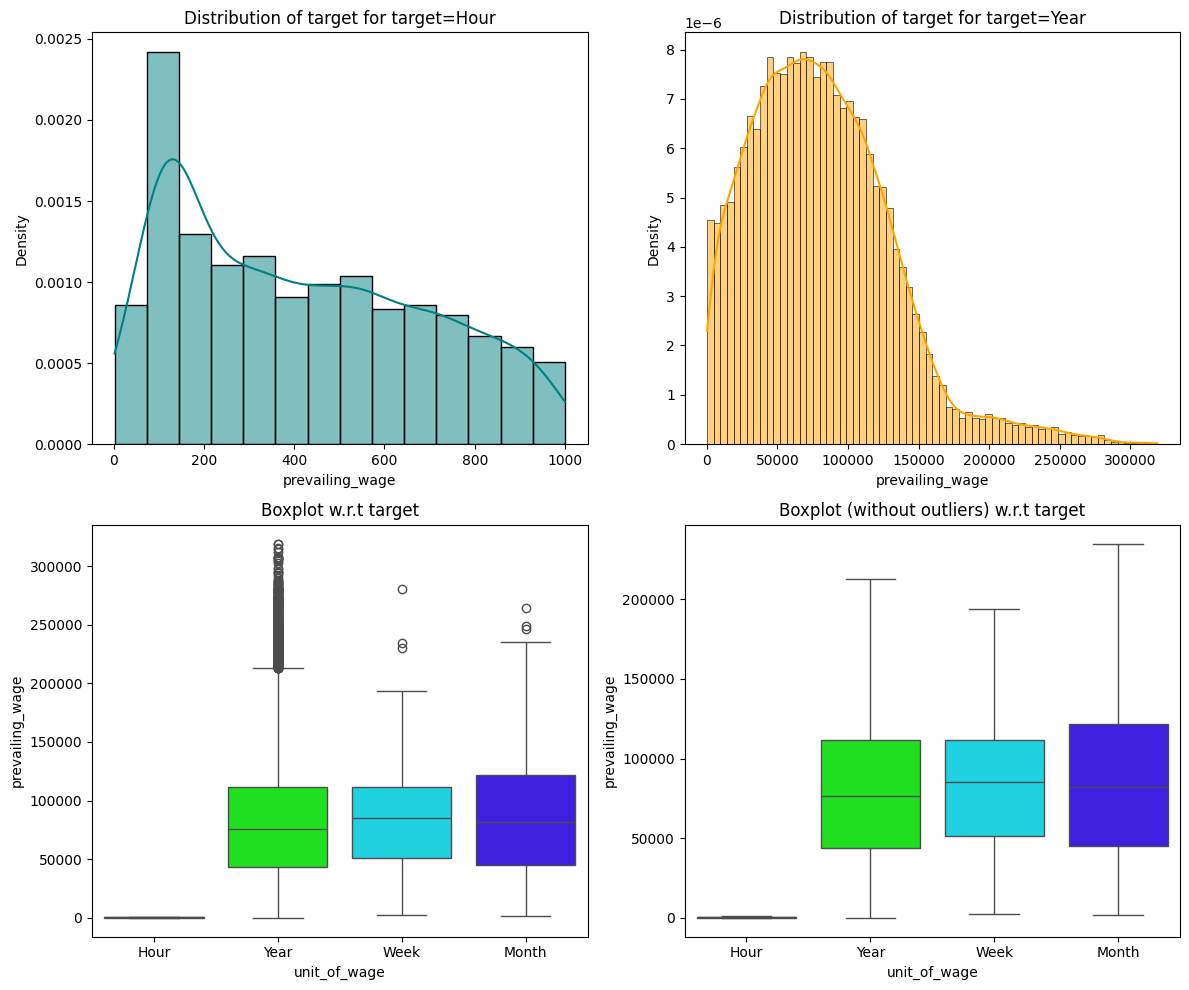

In [50]:
distribution_plot_wrt_target(df,'prevailing_wage', 'unit_of_wage')

#### Observations
* Applicants who has contract with Monthly unit of wage has higher prevailing_wage, followed by Weekly, Yearly, and Hourly unit of wage contracts.

### education_of_employee vs  prevailing_wage vs has_job_experience

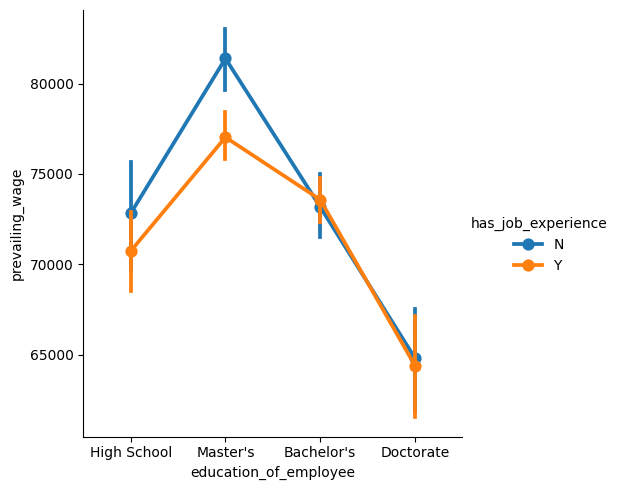

In [51]:
sns.catplot(data=df, x='education_of_employee', y='prevailing_wage', hue='has_job_experience', kind='point')
plt.show()

#### Observations
* Applicants with no job experience have higher prevailing_wage in general.
* Applicants with a Doctorate degree have the lowest prevailing_wage.
* Applicants with a Master's degree have the highest prevailing_wage with/without job experience.

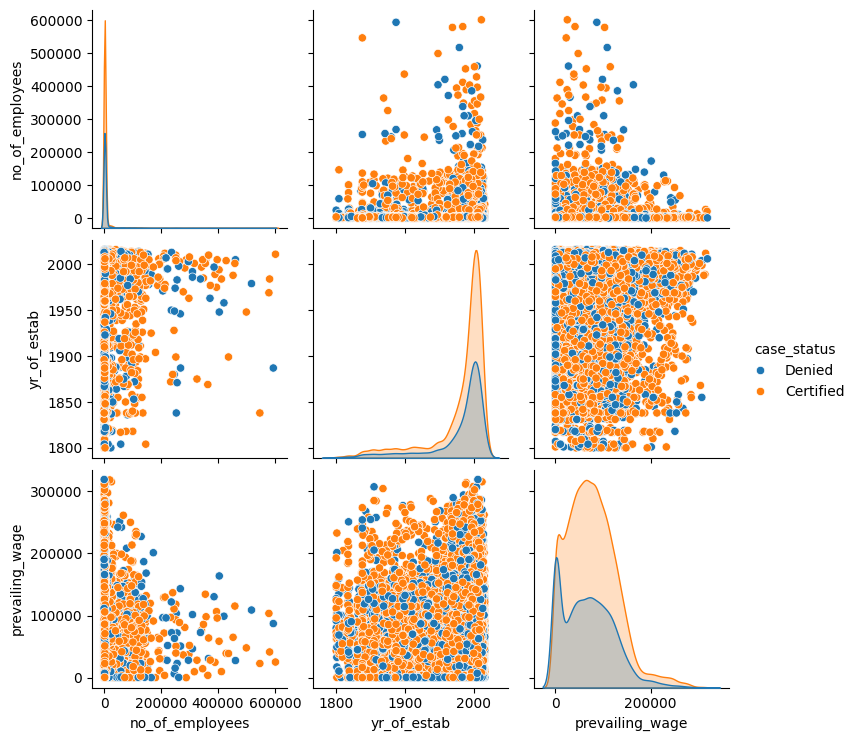

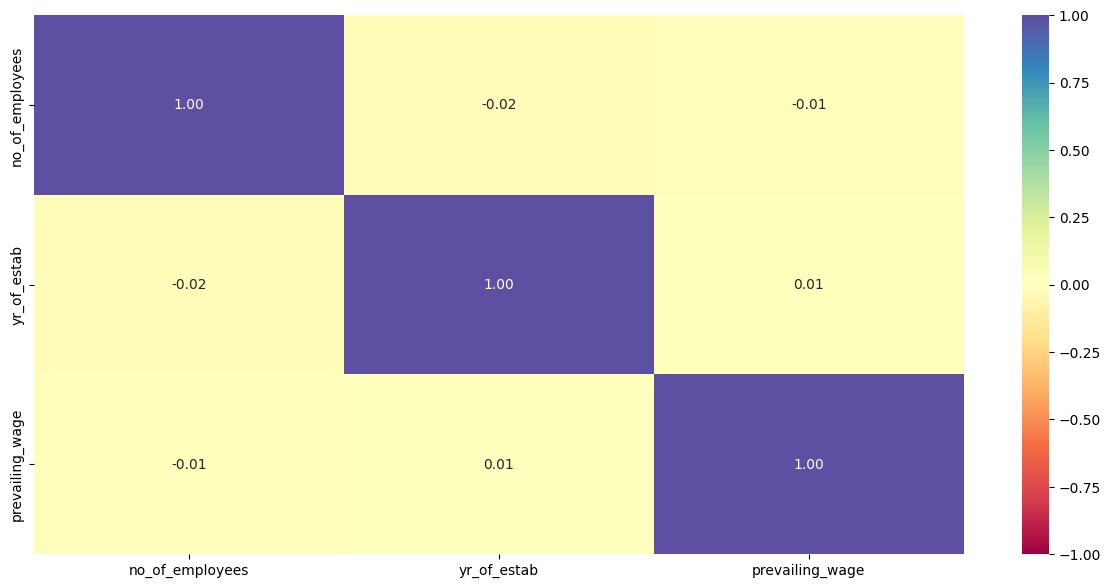

In [52]:
# Pari plot
sns.pairplot(df, hue="case_status")
plt.show()

# Correlation Matrix
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


#### Observations
* pair plot or correlation doesn't have show any significance relationship between numerical columns/attributes.

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

* Most doctorate applicants' (87.2%) visa applications were certified/accepted.
* Most high school applicants' visa applications were denied.
* It seems that education_of_employee has a strong correlation with certified visa application. 
* Visa applicants with higher edudcation have a high chance/probability to get their application certified/accepted.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

* Highest number of total visa applications were certified from Asia, followed by Europe, North America, South America, Africa, and Oceania.
* Highest number of total visa applications were denied from Asia, followed by North America, Europe, South America, Africa, and Oceania.
* Europe has the highest percentage/chance (79%) of getting their visa application certified, followed by Africa, Asia, Oceania, North America and South America (57.8%) has the lowest..


#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

* Applicants with job experience have higher chance (74%) to get their visa applications certfied.
* Applicants without job experience have almost 56% chance to get their visa applications certfied.

#### Checking if the prevailing wage is similar across all the regions of the US

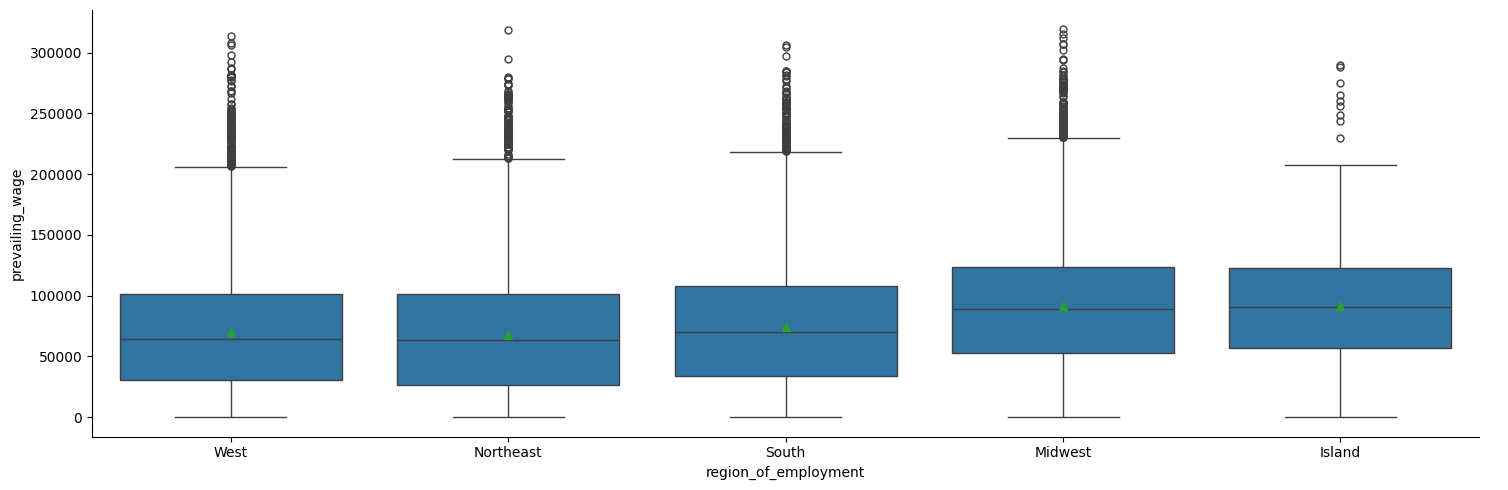

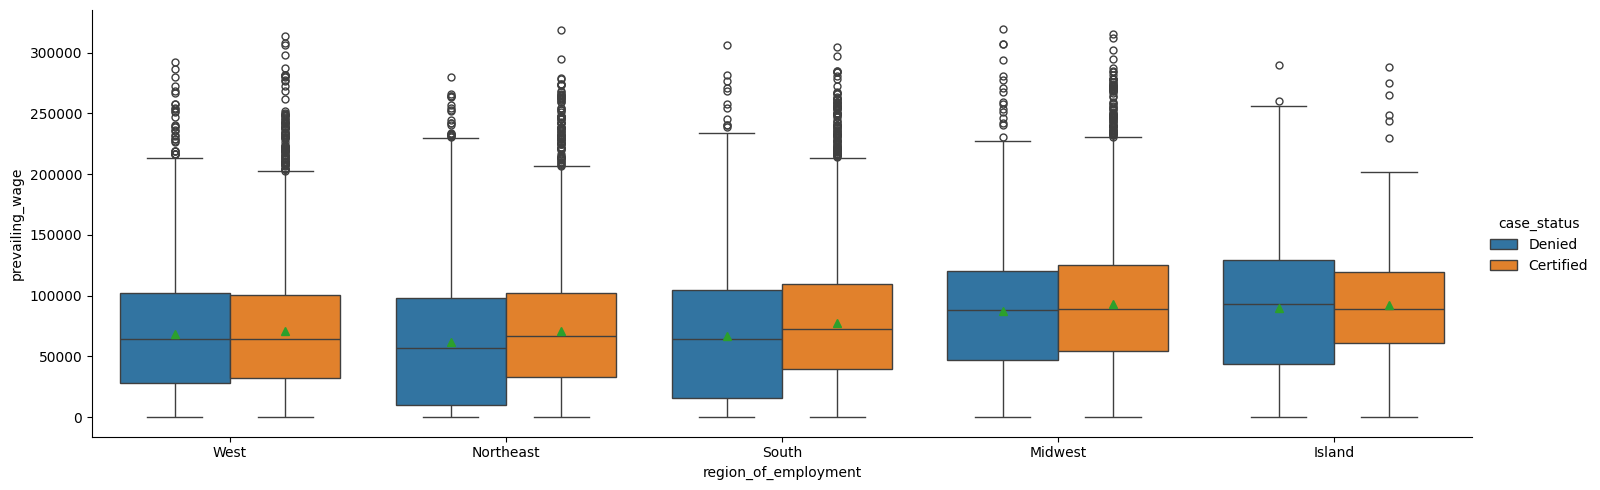

In [53]:
sns.catplot(data=df, x="region_of_employment", y="prevailing_wage",  kind="box", height=5, aspect=3,showmeans=True)
sns.catplot(data=df, x="region_of_employment", y="prevailing_wage", hue="case_status", kind="box", height=5, aspect=3, showmeans=True)
plt.show()

* prevailing_wage has higher mean in Midwest/Island, followed by South, West, and Northeast. This means that visa applications for Midwest and Island have high prevailing wage.
* Among certified visa applications, prevailing_wage is high in Midwest followed by Island, South, Northeast, and West. 

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

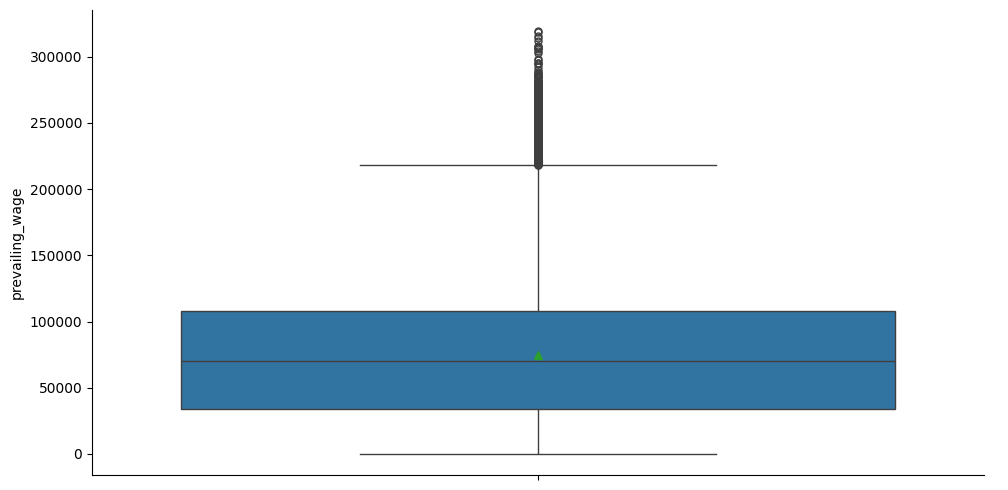

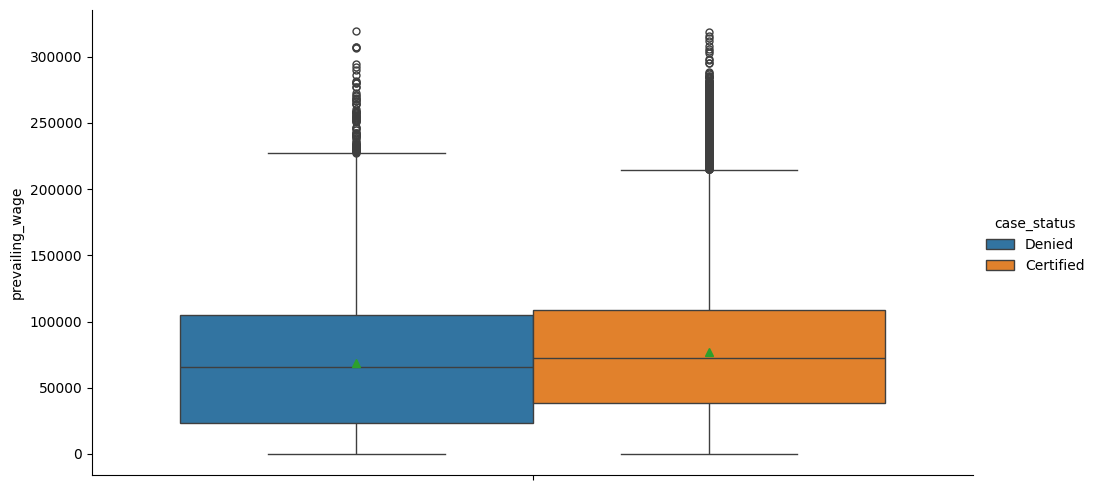

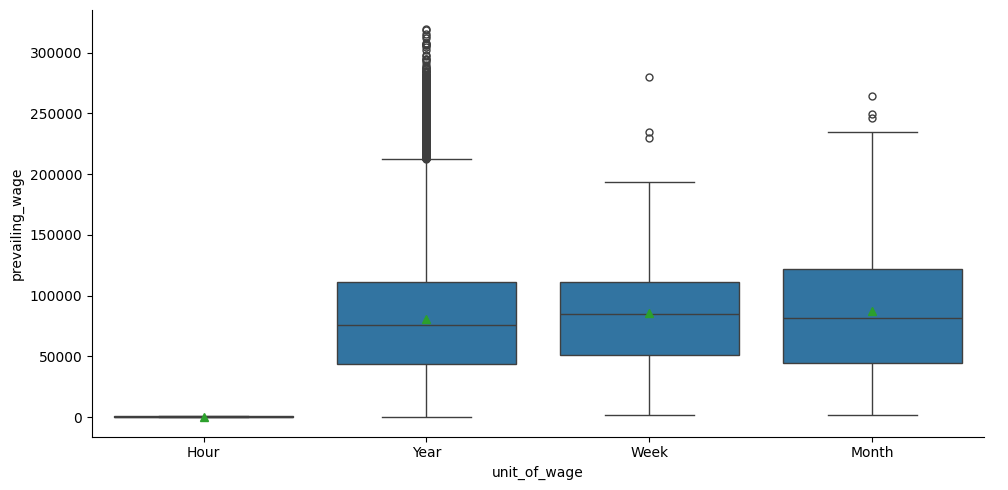

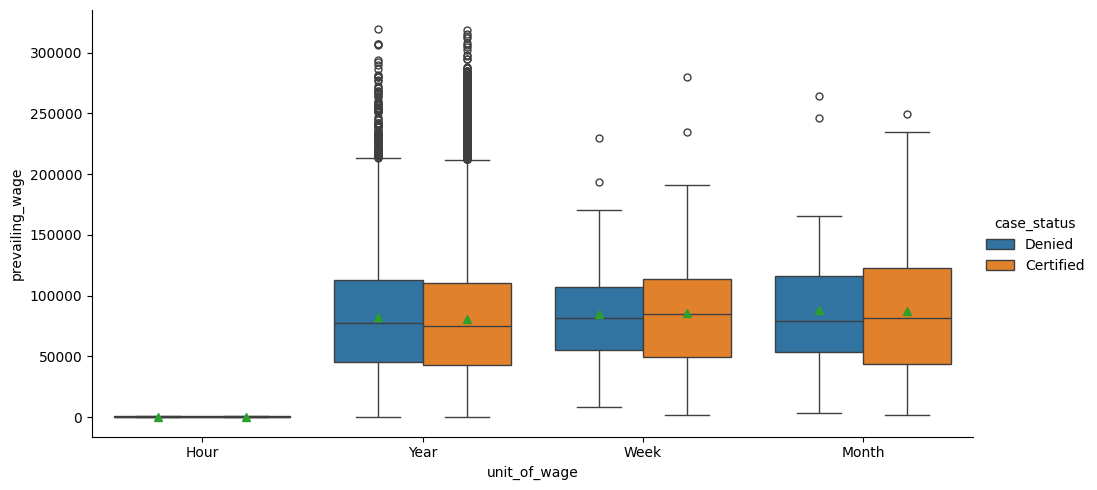

In [54]:
sns.catplot(data=df, y="prevailing_wage",  kind="box", height=5, aspect=2,showmeans=True)
sns.catplot(data=df, y="prevailing_wage", hue="case_status", kind="box", height=5, aspect=2, showmeans=True)
sns.catplot(data=df, x="unit_of_wage", y="prevailing_wage",  kind="box", height=5, aspect=2,showmeans=True)
sns.catplot(data=df, x="unit_of_wage", y="prevailing_wage", hue="case_status", kind="box", height=5, aspect=2, showmeans=True)
plt.show()

In [55]:
df[df['unit_of_wage'] == 'Hour']['prevailing_wage'].describe().T

count    2157.000000
mean      414.570513
std       275.015000
min         2.136700
25%       152.700300
50%       372.652300
75%       637.311100
max       999.919500
Name: prevailing_wage, dtype: float64

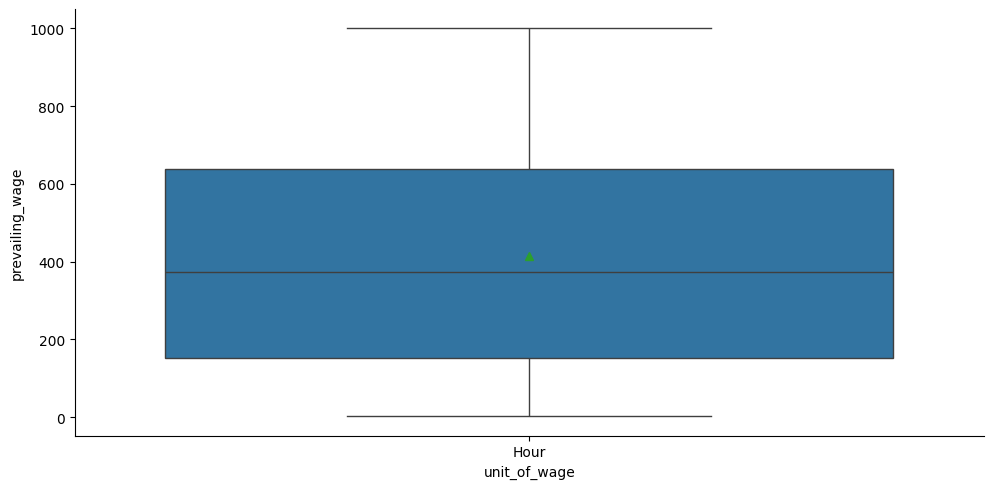

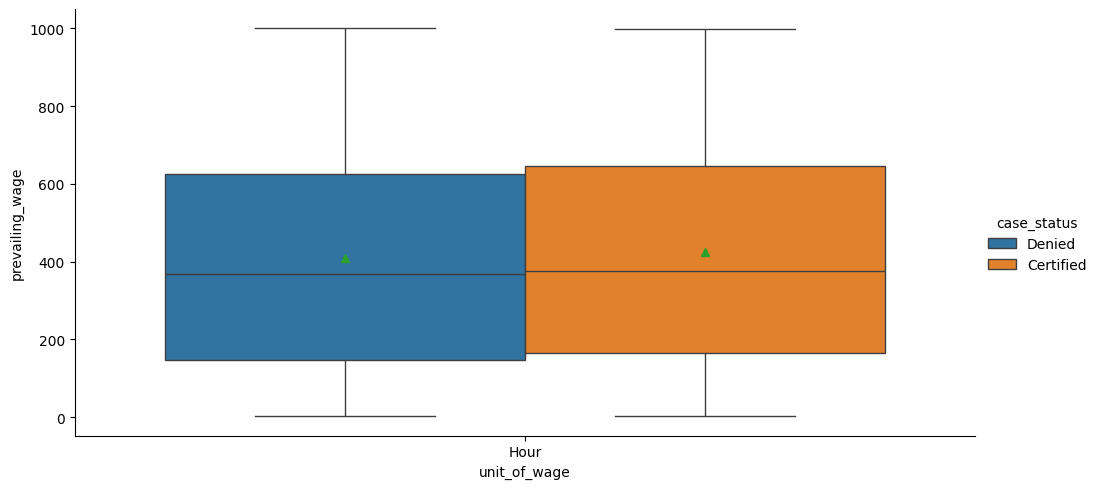

In [56]:
sns.catplot(data=df[df['unit_of_wage'] == 'Hour'], x="unit_of_wage", y="prevailing_wage", kind="box", height=5, aspect=2, showmeans=True)
plt.show()
sns.catplot(data=df[df['unit_of_wage'] == 'Hour'], x="unit_of_wage", y="prevailing_wage", hue="case_status", kind="box", height=5, aspect=2, showmeans=True)
plt.show()

* prevailing_wage has a right skewed distribution with outliers for both Certified and Denied applications.
* Certified visa applications have slightly higher prevailing_wage (mean and IQR) than denied applications.
* prevailing_wage is associated with unit_of_wage. Therefore, Monthly and Weekly unit_of_wage have higher prevailing_wage than Yearly unit_of_wage. It is lowest in Hourly unit_of_wage.
* Prevailing_wage is higher in certified visa applications than denied in Monthly, Weekly, and Hourly unit_of_wage.
* prevailing_wage is higher in denied visa applications than certified in Yearly unit_of_wage.
* Finally, We can't normalize the prevailing_wage column into yearly wage from prevailing_wage and its unit_of_wage because we do not know the exact number of working hours in a day or the exact number of working days in a week and so on. Therefore, prevailing_wage has a less impact for classification/visa status changing in the dataset. 

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

* Visa applications with yearly salary contract (unit of wage) have higher chance/probability to get certified followed by weekly, monthly, and hourly.
* Visa applications with hourly salary contract (unit of wage) has lowest chance/probability to get certified than others.
* Yearly salary contract (unit of wage) has the highest total 22962 visa applications with 16047 are certified.
* Monthly salary contract (unit of wage) has the lowest total 89 visa applications with 55 are certified.
* prevailing_wage is associated with unit_of_wage. Therefore, Monthly and Weekly unit_of_wage have higher prevailing_wage than Yearly unit_of_wage. It is lowest in Hourly unit_of_wage.
* Prevailing_wage is higher in certified visa applications than denied in Monthly, Weekly, and Hourly unit_of_wage.
* prevailing_wage is higher in denied visa applications than certified in Yearly unit_of_wage.
* Finally, We can't normalize the prevailing_wage column into yearly wage from prevailing_wage and its unit_of_wage because we do not know the exact number of working hours in a day or the exact number of working days in a week and so on. Therefore, prevailing_wage has a less impact for classification/visa status changing in the dataset. 

## Data Pre-processing

### Outlier Check

* Attribute/Column ***no_of_employees*** in dataset has outliers that represent companies with very big corporation/company. As such big companies exists, therefore, we will not handle the outliers and consider them as information.
* Attribute/Column ***yr_of_estab*** in dataset has outliers that represent old companies established almost few centuries ago. As such old companies exists, therefore, we will not handle the outliers and consider them as information.
* We can't normalize the ***prevailing_wage*** column into yearly wage from prevailing_wage and its unit_of_wage because we do not know the exact number of working hours in a day or the exact number of working days in a week and so on. Therefore, prevailing_wage has a less impact for classification/visa status changing in the dataset. 

### Data Preparation for modeling

In [57]:
# Applying hot encoding
def hot_encoding(X):
    return pd.get_dummies(
    X, X.select_dtypes(include=['object', 'category']).columns,
    drop_first=True,
    ).astype(float) 

# Splitting Training, Testing, and Validation dataset.
#Input:
# df -> dataframe to split
# test_size -> test size ratio.
# validation_size -> validation size ratio.
#1 - (test_size + validation_size) will be for training
# random_state -> radom state/seed
# is_stratify -> whether is stratified data or not
def get_train_validation_test_split(df, target, test_size=.15, validation_size=.15, random_state=42, is_stratify=True):
    # Step 1: Dropping target attribute/Column
    print("Original data set Shape {}".format(df.shape))
   
    X = df.drop(columns=[target], axis=1)
    y = df[target].map(lambda x: classes.index(str(x)))
    
    # Step 2: Splitting test, validation and training data as per ration, random state, and stratification 
    if is_stratify == True:
        X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, test_size=(test_size + validation_size), random_state=random_state, stratify=y)
        X_validation, X_test, y_validation, y_test = train_test_split(X_test_validation, y_test_validation, test_size=(test_size /(test_size + validation_size)), random_state=random_state, stratify=y_test_validation)
    
    else:
        X_validation, X_test, y_validation, y_test = train_test_split(X_test_validation, y_test_validation, test_size=(test_size /(test_size + validation_size)), random_state=random_state)
    
    # Step 3: Hot encoding on Train, Validation, and Test data set separately to avoid data leakage
    X_train = hot_encoding(X_train)
    X_validation = hot_encoding(X_validation)
    X_test = hot_encoding(X_test)
    
    print("Training Shape {}, validation Shape {}, testing Shape {}".format(X_train.shape, X_validation.shape, X_test.shape))
    
    def get_label_stat(y_label, ds_type):
        for i in range (len(classes)):
            total = sum(y_label == i)
            print("After Splitting, {} data set has counts of label {}: {} with probability {:.2f}%".format(ds_type, classes[i], total, total/len(y_label) * 100))
            
            
    get_label_stat(y_train, "Training")
    get_label_stat(y_validation, "Validation")
    get_label_stat(y_test, "Testing")
    
    
    return X_train, X_validation, X_test, y_train, y_validation, y_test


In [58]:
# Column case_id has unique value and doen't impact on classification. So, dropping it.
df.drop('case_id', axis=1, inplace=True)
# prevailing_wage has a less impact for classification/visa status changing in the dataset. We will drop this column/attribute.
#df.drop('prevailing_wage', axis=1, inplace=True)

In [59]:
# Converting all object attribute to categorical.

cat_columns = df.select_dtypes(include=['object']).columns
for col in cat_columns:
    df[col] = df[col].astype('category') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


In [60]:
random_state = 1
# Splitting pertage of entire data set
test_split = .15
validation_split = .15 
is_stratify = True
y_colmn = "case_status"
classes = ['Denied', 'Certified']
#X_train, X_test, y_train, y_test = get_train_test_split(df, y_colmn, test_split,  random_state, is_stratify)
X_train, X_validation, X_test, y_train, y_validation, y_test = get_train_validation_test_split(df, y_colmn, test_split, validation_split, random_state, is_stratify)

Original data set Shape (25480, 11)
Training Shape (17836, 21), validation Shape (3822, 21), testing Shape (3822, 21)
After Splitting, Training data set has counts of label Denied: 5923 with probability 33.21%
After Splitting, Training data set has counts of label Certified: 11913 with probability 66.79%
After Splitting, Validation data set has counts of label Denied: 1270 with probability 33.23%
After Splitting, Validation data set has counts of label Certified: 2552 with probability 66.77%
After Splitting, Testing data set has counts of label Denied: 1269 with probability 33.20%
After Splitting, Testing data set has counts of label Certified: 2553 with probability 66.80%


### Any other preprocessing steps (if needed)
* Hot encoding was performed in all categorical object variables in dataset after splitting to tranining, validation and test to avoid data leak. Therefore, no other preprocessing steps are needed.
  

### Observations - After splitting training and testing
* 70% of dataset has been assigned to training and 15% to validation, and 15% testing with random state 1 and with stratification
* Distribution of positive labels (Visa application status as certified) are almost same percentage in both training and testing dataset. 
  

## Model Building

### Model Evaluation Criterion

In [61]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    tag: type of performance metric. Training/Testing
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    
    #fpr, tpr, thresholds = roc_curve(target, pred)
    #tn, fp, fn, tp = confusion_matrix(target, pred).ravel()
    
    #print("TN={},FP={},FN={},TP={}".format(tn, fp, fn, tp))
    #fpr = (fp/(fp + tn))
    #print(fpr)
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy" :  acc, "Recall" : recall, "Precision" : precision, "F1" : f1},
        index=[0],
    )

    return df_perf

In [62]:
# show_feature_importance plots the features with importance
# Input:
# clf -> decision tree instance
# feature_names -> list of the feature
# x_scale and y_scale for x and y scale to draw feature importance graph
def show_feature_importance(clf, model_name, feature_names, x_scale=8, y_scale=8, is_feature_tree_available = True):
    importances = None
    try:
        importances = clf.feature_importances_
    except:
        # Bagging doesn't have feature_importances_ attributes. So, calculating it as Random Forest.
        importances = np.mean([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    
    #print("Features {}".format(importances))
    if importances is not None:
        indices = np.argsort(importances)
        
        df_feature = pd.DataFrame({'feature':feature_names[indices], 'importance': importances[indices]})
        df_feature_filtering_non_zero_importance = df_feature.sort_values(by='importance', ascending=False)
        df_feature_filtering_non_zero_importance = df_feature_filtering_non_zero_importance[df_feature_filtering_non_zero_importance['importance'] > 0]
        plt.figure(figsize=(x_scale, y_scale))
        plt.title("Feature Importances : " + model_name)
        sns.barplot(data=df_feature_filtering_non_zero_importance, y='feature', x='importance', orient='h', color="green")
        plt.xlabel("Relative Importance (Normalized)")
        plt.show()      

In [89]:
# Function to calculate confusion matrices
def confusion_matrix_sklearn(model_name, y_tr_true, y_tr_pred, y_tst_true, y_tst_pred, is_testing=False):
    
    cm1 = confusion_matrix(y_tr_true, y_tr_pred)
    labels1 = np.asarray(
            [
                ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm1.flatten().sum())]
                for item in cm1.flatten()
            ]
        ).reshape(2, 2)
    
    cm2 = confusion_matrix(y_tst_true, y_tst_pred)
    labels2 = np.asarray(
            [
                ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm2.flatten().sum())]
                for item in cm2.flatten()
            ]
        ).reshape(2, 2)

    
    fig, ax =plt.subplots(1,2, figsize=(15, 5))
    sns.heatmap(cm1, xticklabels=classes, yticklabels=classes, annot=labels1, fmt="", ax=ax[0], cmap="coolwarm")
    ax[0].set_ylabel("True label")
    ax[0].set_xlabel("Predicted label")
    ax[0].set_title("Training")
    
    sns.heatmap(cm2, xticklabels=classes, yticklabels=classes, annot=labels2, fmt="", ax=ax[1], cmap="winter")
    ax[1].set_ylabel("True label")
    ax[1].set_xlabel("Predicted label")
    if (is_testing == False):
        ax[1].set_title("Validation")
    else:
        ax[1].set_title("Testing")
        
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    fig.suptitle('Confusion Matrix for {}'.format(model_name))
    plt.show()

#### Defining scorer to be used for cross-validation and hyperparameter tuning

### Model evaluation criterion

**The model successful predictions as:**

Predicting a visa application is of certified when it is of certified. This is known as **True Positive (TP)**.
Predicting a visa application is of denied when it is of denied. This is known as **True Negative (TN)**.


**The model can make wrong predictions as:**

Predicting a visa application is of certified when it is of denied. This is known as **False Positive (FP)**
Predicting a visa application is is of denied when it is of certified. This is known as **False Positive (TN)**

**Which case is more important?**

Office of Foreign Labor Certification (**OFLC**) aims to accurately approve visa for foreign skill workers to US. 

If the model predicts a visa application is of certified but it is actually denied (**FP**) then OFLC grants unskilled worker migration to US. This will cause US citizen loosing the jobs which impacts US and its economy.

On the other hand, if the model predicts a visa application is of denied but it is actually certified (**FN**) then the potential candidate will loose the opportunity.

Therefore, both cases are important to build a model.


**Model evaluation metrics definition:** 

Popular machine learning performance evaluation metrics are: Accuracy, Precision, Recall, and F1-score (harmonic mean of precision and recall).
  
\begin{equation*}
Accuracy =
{\frac{TP + TN} {TP + TN + FP + FN}}
\end{equation*}
\begin{equation*}
Recall =
{\frac{TP} {TP + FN}}
\end{equation*}
     \begin{equation*}
Precission =
{\frac{TP} {TP + FP}}
\end{equation*}
   \begin{equation*}
F_{1}-Score =
{2 . \frac{Precission . Recall} {Precission + Recall}}
\end{equation*}

  


**Which metric to optimize?**

As both FP and FN are important. Therefore, we will build a model that minimizes (trades off) both. Having said that, we will use **F1-score** to evaluate model performance and select the best model.

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

### Model building and evaluation criteria
* We will use 7 classifiers to build models.
  -  Bagging
  -  Random Forest
  -  Gradient Boosing
  -  Ada Boosting
  -  Decision Tree
  -  Logistic Regression
* We build models on original training dataset  
* As we have imbalance dataset (33% denied), we will use oversample and undersample techniques on training data and build models
* We will tune the above models on original, oversampled, and undersampled training data.
* We will predict the validation dataset and evaluate performance for each of the models, and select the best model for that has the highest F1-Score.
* Finally, we predict the test dataset with the best model (highest F1-Score) and show the performance. 


In [96]:
# TOTAL MODEL = 2 X 3 X 7 = 42
# Tuned & Non Tuned
# Function to generate model name by categories
# DEF = Default/Not tuned, TUN = Tuned Moded
# ORG = Original Data (without any sampling), OVR = Over Sampling of training data, UND = Under Sampling of Training Data

DEF = 'Default'
TUN = 'Tuned '
#Data categroy
ORG = 'Original'
UND = 'Under Sampling'
OVR = 'Over Sampling'

# We list all the models here
# The following variables will be used for respective base classifier name
BAG = 'Bagging Classifier'
RF = 'Random Forest Classifier'
GBM = 'Gradient Boosting Classifier'
ADA = 'AdaBoost Classifier'
DCT = 'Decision Tree Classifier'
LR = 'Logistic Regression'
XGB = 'XGB Classifier'

#########Model DataStructure Dictionary Keys ############
MODEL_BUILT_TYPE = 'type'
MODEL_NAME = 'name'
MODEL = 'model'
MODEL_TRAIN_PERF = 'Train Performance'
MODEL_TEST_PERF = 'Test Performance'

# all_trained_model will host all trained models, and its performance metrics.
all_trained_model = {}


models = []  # Empty list to store all the models
# Appending models into the list
models.append((BAG, BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append((RF, RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append((GBM, GradientBoostingClassifier(random_state=1)))
models.append((ADA, AdaBoostClassifier(random_state=1)))
models.append((DCT, DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append((LR, LogisticRegression(random_state=1, class_weight='balanced')))
models.append((XGB, XGBClassifier(random_state=1, eval_metric='logloss')))






In [90]:
# This function is used to set dataframe cell style, and color
def set_common_df_style(s, title=''):
    #s.format("{:.2f}")
    s.set_caption("Performance evaluation metrics of different classification models " + title)\
     .set_table_styles([{
         'selector': 'caption',
         'props': 'caption-side: bottom; font-size:1.25em;'
     }], overwrite=False)
    
    cell_hover = {  # for row hover use <tr> instead of <td>
        'selector': 'td:hover',
        'props': [('background-color', '#ffffb3')]
    }
    index_names = {
        'selector': '.index_name',
        'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
    }
    headers = {
        'selector': 'th:not(.index_name)',
        'props': 'background-color: #000066; color: white;'
    }
    s.set_table_styles([cell_hover, index_names, headers], overwrite=False)
    
    s.set_table_styles([
        {'selector': 'th.col_heading', 'props': 'text-align: center;'},
        {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
        {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
    ], overwrite=False)
    return s

# THis function is used to highligh max and minimum of a column in data frame
def highlight_min_max(column, color_min='yellow', color_max='lightblue'):
    """Highlights the minimum and maximum values in a Pandas Series (column)."""
    min_value = column.min()
    max_value = column.max()
    
    return ['background-color: {}'.format(color_min) if value == min_value 
            else 'background-color: {}'.format(color_max) if value == max_value 
            else '' 
            for value in column]

# This function is creating the performance evaluation metrics table with coloring, header, etc.
def get_stylish_dataframe_for_model_evaluation(model_perf_df_for_style, show_diff=False, title=''):
    model_perf_df_style = set_common_df_style(model_perf_df_for_style.style, title=title)
    model_perf_df_style.set_table_styles({
        ('Validation', 'Accuracy'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                                   {'selector': 'td', 'props': 'border-left: 1px solid #000066'}],
      }, overwrite=False, axis=0)

    if show_diff == True:
        model_perf_df_style.set_table_styles({
        ('Diff(Training - Validation)', 'Accuracy'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                                   {'selector': 'td', 'props': 'border-left: 1px solid #000066'}],
      }, overwrite=False, axis=0)
      
    if show_diff == True:
        model_perf_df_style.apply(highlight_min_max, color_min='', color_max='yellow', subset=[('Training', 'F1'), ('Validation', 'F1')], axis=0)
        model_perf_df_style.apply(highlight_min_max, color_max='', color_min='cyan', subset=[('Diff(Training - Validation)', 'F1')], axis=0)
    else:
        model_perf_df_style.apply(highlight_min_max, color_min='', color_max='yellow', subset=[('Training', 'F1'), ('Validation', 'F1')], axis=0)
        
    return model_perf_df_style



In [91]:
# This function builds a model on training data and predict on validation/test data and generate confusion matrix and important features.

def get_model_train_and_prediction(model, model_name, X_trn, y_trn, X_tst, y_tst, show_conf_matx=True, is_feature_tree_available = True):
    # Fitting the model
    print(model.fit(X_trn, y_trn))
    
    #Calculating different metrics
    model_train_perf = model_performance_classification_sklearn(model, X_trn, y_trn)
    model_test_perf = model_performance_classification_sklearn(model, X_tst, y_tst)
    
    #Creating confusion matrix
    if show_conf_matx == True:
        print("Training dataset shape={} ({}:{}, {}:{})".format(X_trn.shape, classes[0], sum(y_trn == 0), classes[1], sum(y_trn == 1)))
        print("Testing/Validation  dataset shape={} ({}:{}, {}:{})".format(X_tst.shape, classes[0], sum(y_tst == 0), classes[1], sum(y_tst == 1)))
        y_trn_pred = model.predict(X_trn)
        y_tst_pred = model.predict(X_tst)
        confusion_matrix_sklearn(model_name, y_trn, y_trn_pred, y_tst, y_tst_pred)

    if is_feature_tree_available == True:
        feature_names = X_trn.columns
        show_feature_importance(model, model_name, feature_names)
    
    return model_train_perf, model_test_perf, model

# Anciliary function to draw diff column in performance evaluation metrics.
def extract_train_and_test_accuracy_add_diff(train_df, test_df, get_diff=False):
    train_df_list = train_df.values.tolist()[0]
    test_df_list = test_df.values.tolist()[0]
    
    eval_metrics_df_columns = train_df.columns.tolist()
    if get_diff == True:
        diff_list = [float(x) - float(y) for x, y in zip(train_df_list, test_df_list)]

    if get_diff == True:
        combined_list = train_df_list + test_df_list + diff_list
    else:
        combined_list = train_df_list + test_df_list
    #print(combined_list, eval_metrics_df_columns) 
    return  combined_list, eval_metrics_df_columns

# Function to build model from for each base classifier and generates performance metrics in a table.
def build_models_with_pipeline_of_multiple_classifier(models, X_tr, y_tr, X_tst, y_tst, show_conf_matx = False, show_diff = False, title=''):
    model_perf_record_list = []
    schema = None
    model_name = []
    trained_model_dict = {}
    for name, model in models:
        print("Building Model for Classifier: {}".format(get_bold_text(name)))
        is_feature_tree_available = True
        if name == LR:
            #print(get_bold_text("MATCH" + LR))
            is_feature_tree_available = False
        model_train_perf, model_test_perf, trained_model = get_model_train_and_prediction(model, name, X_tr, y_tr, X_tst, y_tst, show_conf_matx=show_conf_matx, is_feature_tree_available=is_feature_tree_available)
        trained_model_dict[name] = {MODEL:trained_model, MODEL_TRAIN_PERF:model_train_perf, MODEL_TEST_PERF:model_test_perf}
        
        record, schema = extract_train_and_test_accuracy_add_diff(model_train_perf, model_test_perf, get_diff=show_diff)
        model_perf_record_list.append(record)
        model_name.append(name)
    
    if show_diff == True:
        return get_stylish_dataframe_for_model_evaluation(pd.DataFrame(model_perf_record_list,
                      index=pd.Index(model_name, name='Classifiers'),
                      columns=pd.MultiIndex.from_product([['Training', 'Validation', 'Diff(Training - Validation)'], schema], names=['Data set:', 'Metric:'])), show_diff, title), trained_model_dict
    else:
        return get_stylish_dataframe_for_model_evaluation(pd.DataFrame(model_perf_record_list,
                      index=pd.Index(model_name, name='Classifiers'),
                      columns=pd.MultiIndex.from_product([['Training', 'Validation'], schema], names=['Data set:', 'Metric:'])), show_diff, title), trained_model_dict

        

Building model & performance analysis for Original Train and Validation data
Building Model for Classifier: Bagging Classifier
BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=1),
                  random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


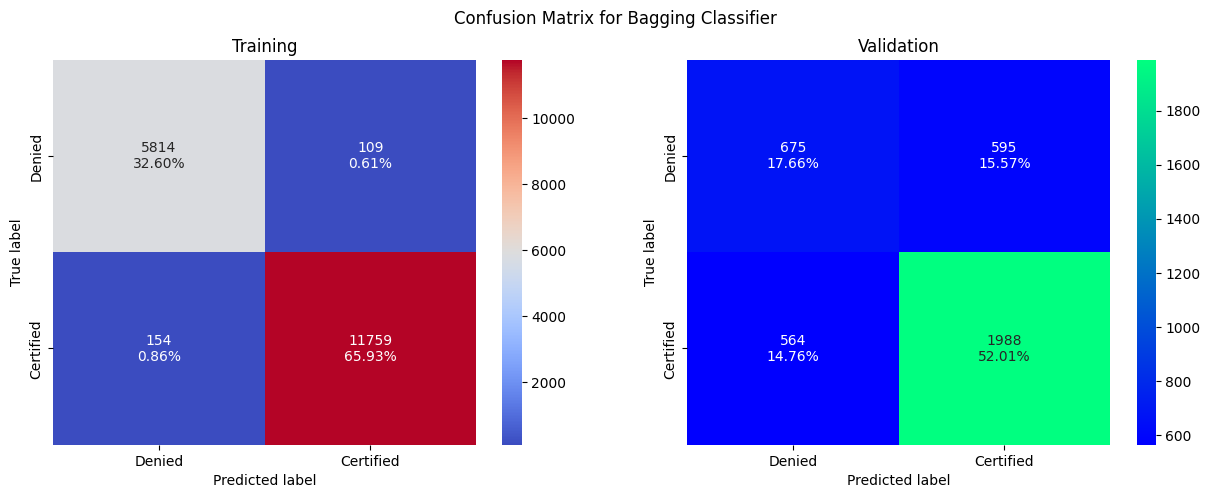

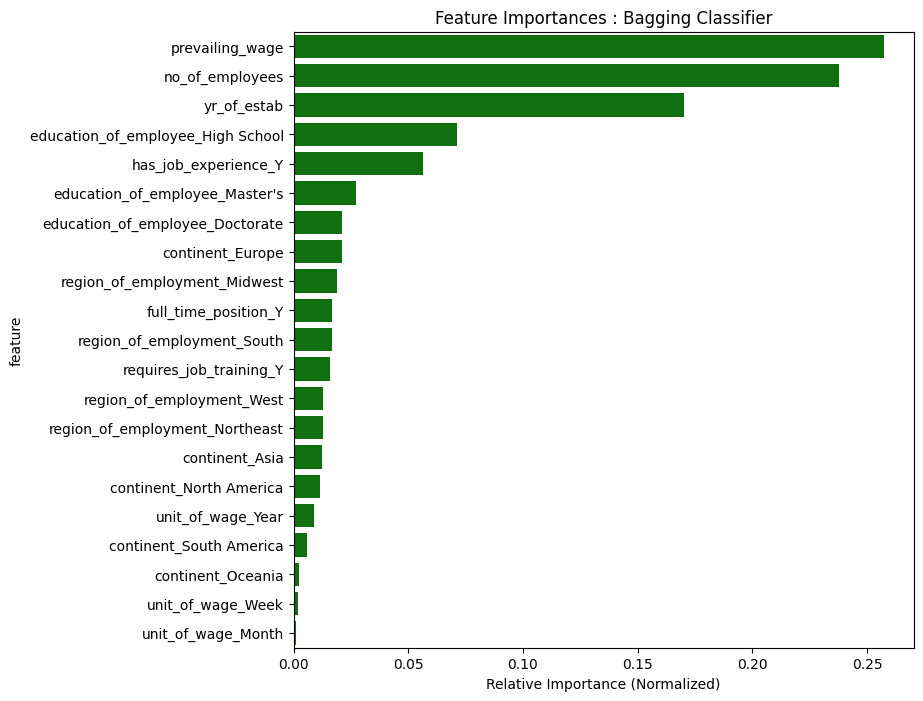

Building Model for Classifier: Random Forest Classifier
RandomForestClassifier(class_weight='balanced', random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


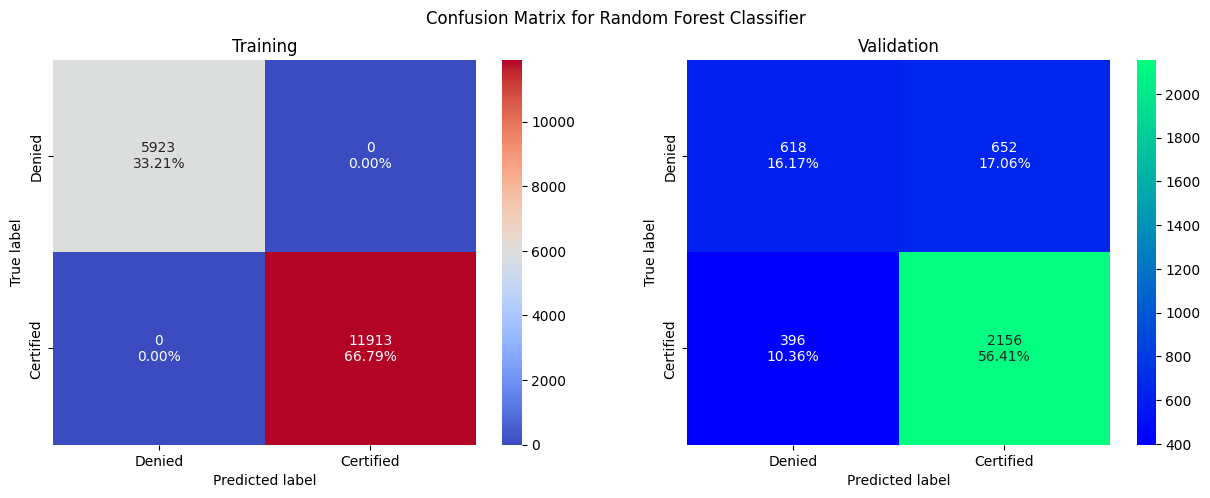

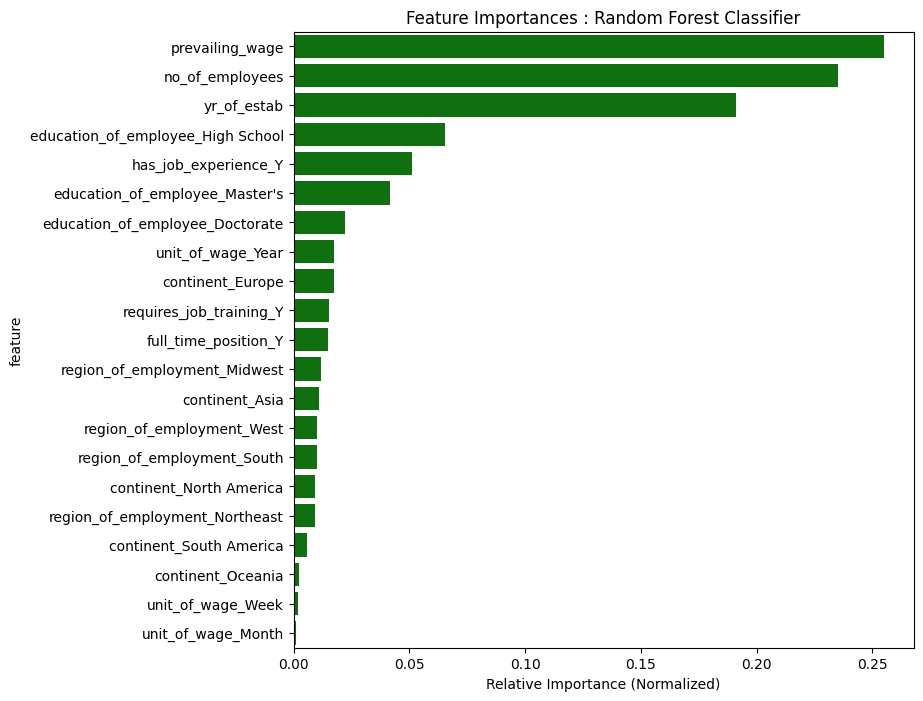

Building Model for Classifier: Gradient Boosting Classifier
GradientBoostingClassifier(random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


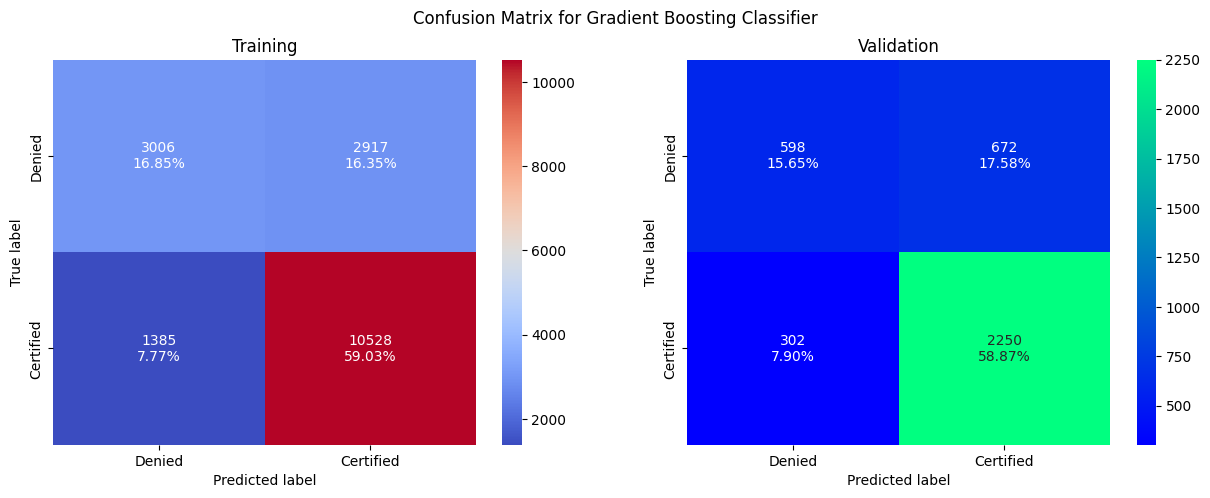

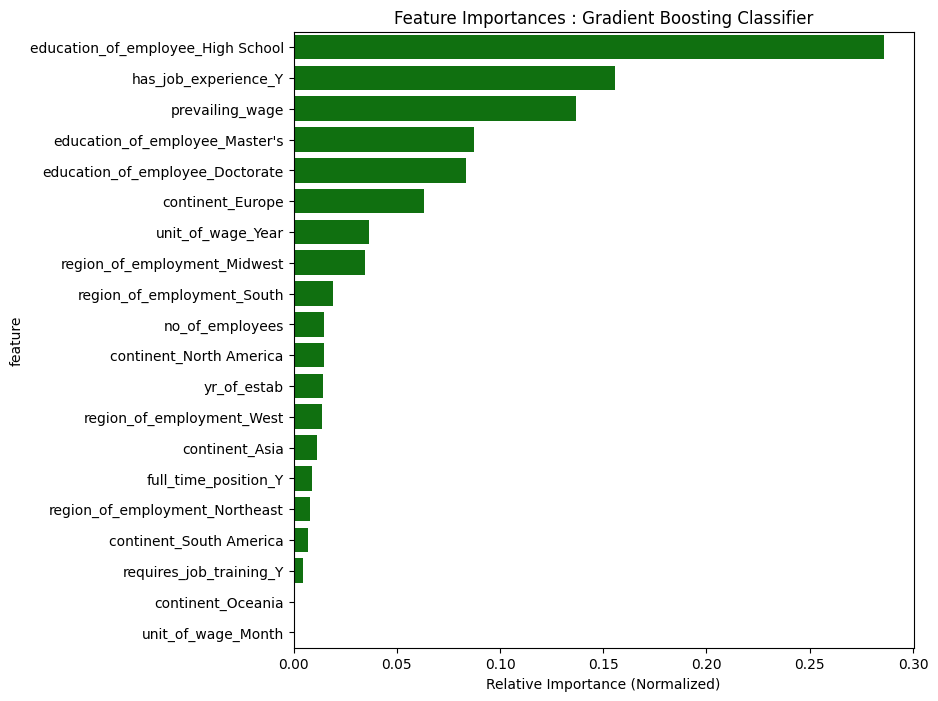

Building Model for Classifier: AdaBoost Classifier
AdaBoostClassifier(random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


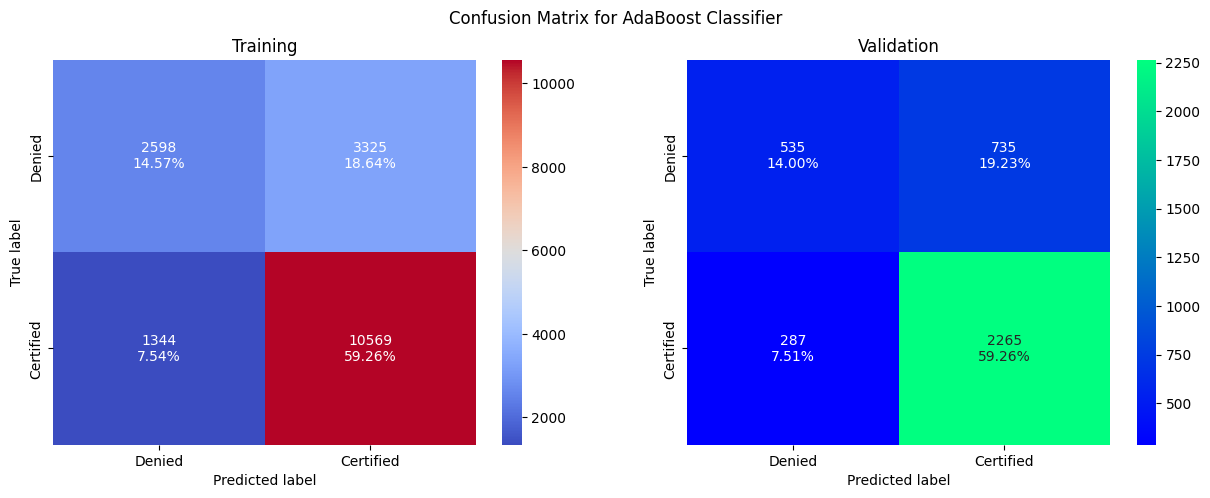

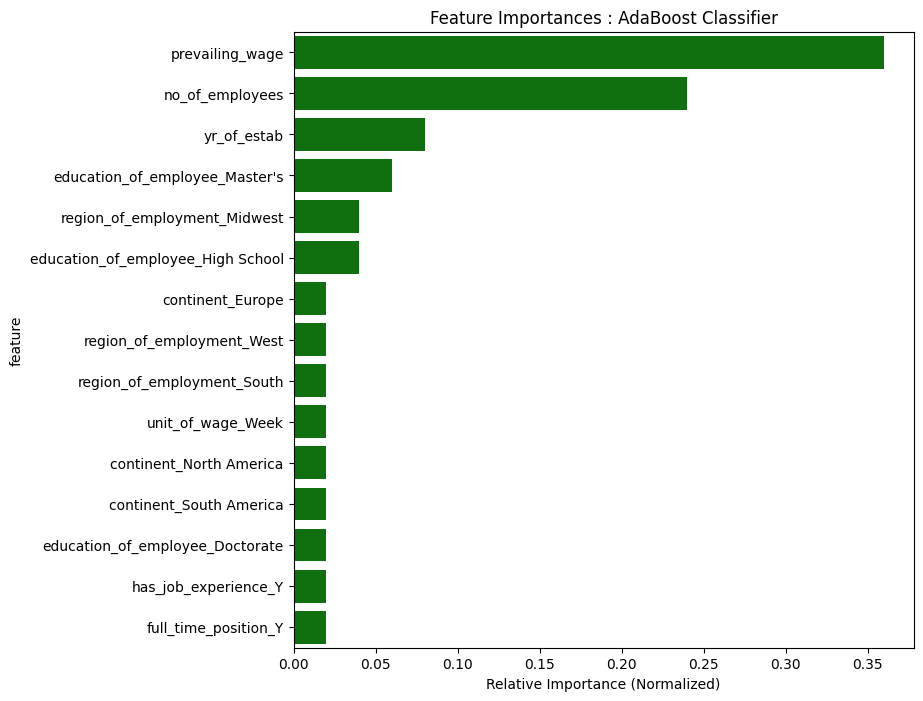

Building Model for Classifier: Decision Tree Classifier
DecisionTreeClassifier(class_weight='balanced', random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


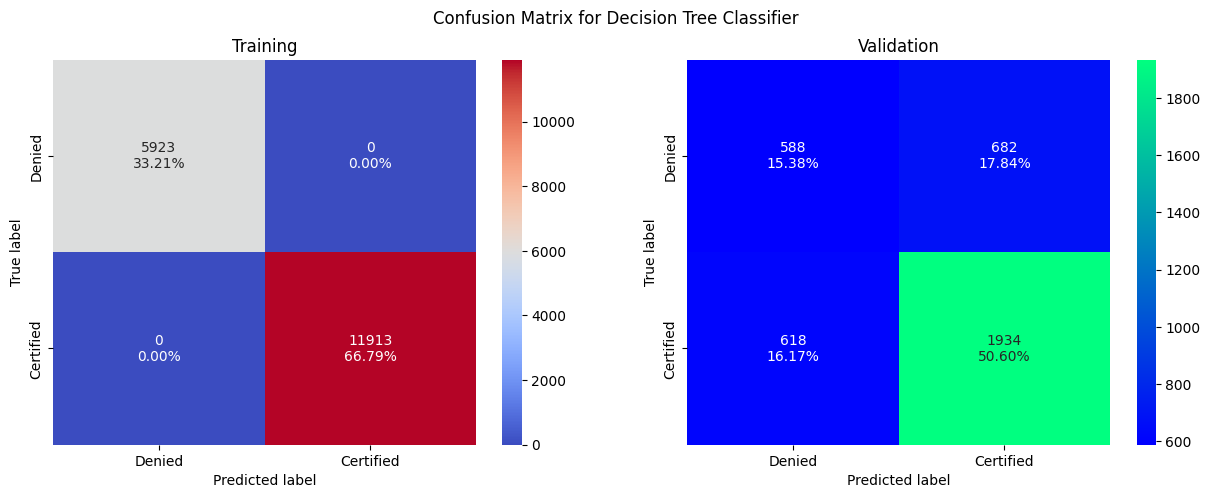

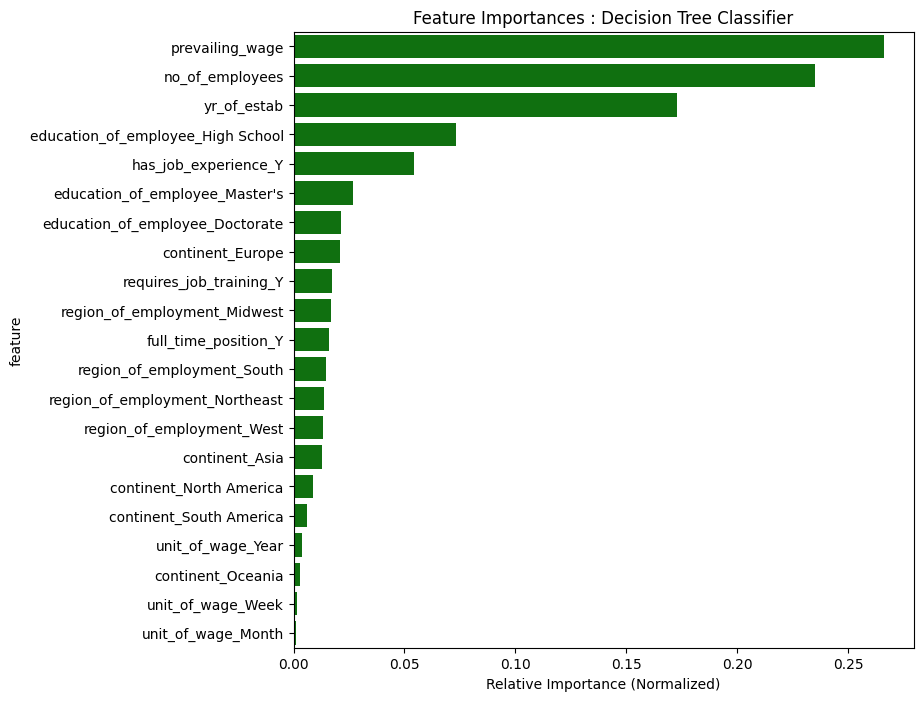

Building Model for Classifier: Logistic Regression
LogisticRegression(class_weight='balanced', random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


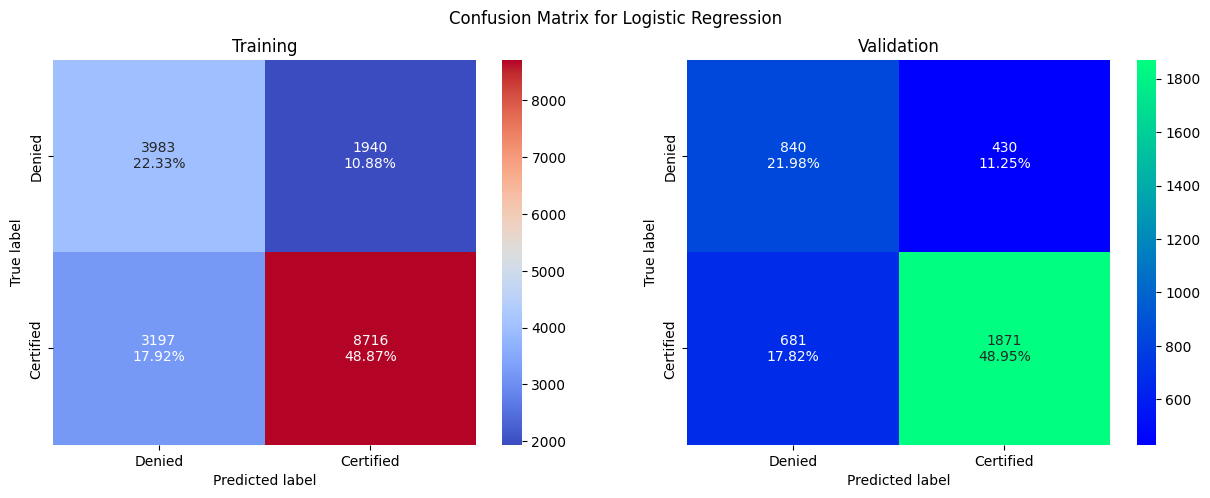

Building Model for Classifier: XGB Classifier
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


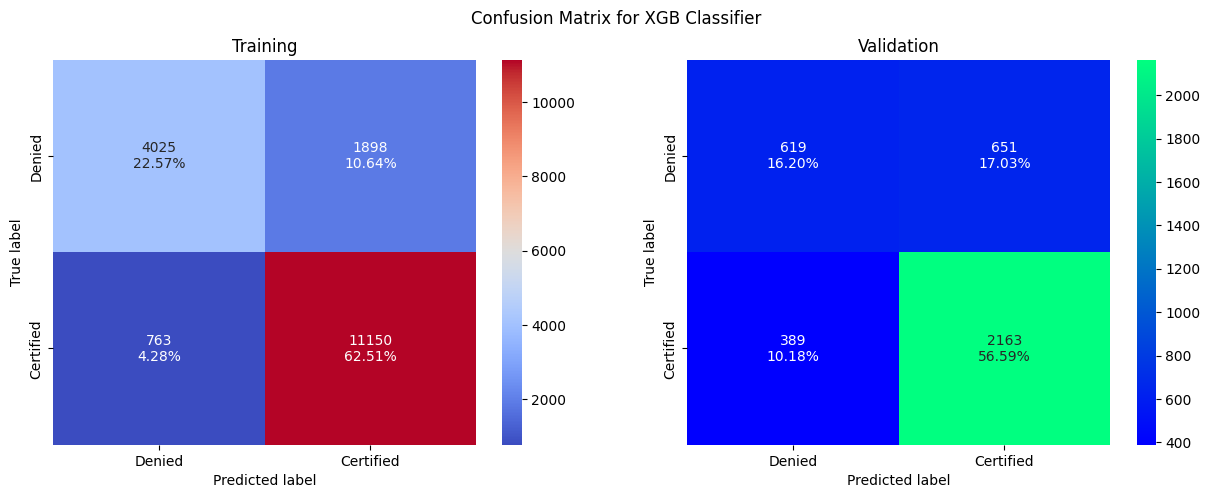

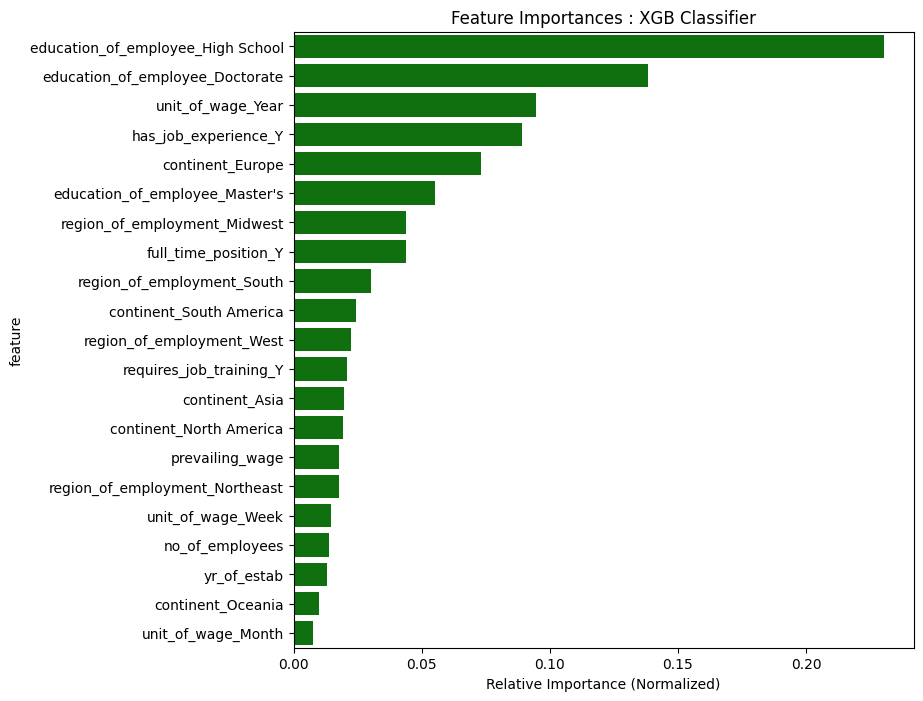

CPU times: total: 9.91 s
Wall time: 15.7 s


In [67]:
%%time
# Building, Training and validating models on original Train and Validation data
print("Building model & performance analysis for " +  get_bold_text("Original Train and Validation data"))
df_style, trained_models = build_models_with_pipeline_of_multiple_classifier(models, X_train, y_train, X_validation, y_validation, show_conf_matx=True, show_diff=True, title='for Original Train and Validation data')
tmp_dict = {}
tmp_dict[ORG] = trained_models
all_trained_model[DEF]=tmp_dict
df_style



#### Observation
* Performance evaluation metrics on Training and Validation data set have yellow colored cells showing highest F1.
* Differnce of evaluation metrics (F1) on training and validation data set have cyan colored cells showing the minimum.  
* Bagging, Random forest, Decission Tree models are overfitting as they have very high (almost 100%) Recall, Precission, and F1 on training but low on Validation set.
* Logistic Regression has low Recall but high Precission.   
* Adaboost has the best Recall (.887) on Validation dataset.
* **Gradient Boosing model** has the highest F1-Score (.822).
* education_of_employee_High Schoot, has_job_exprerience_Y, prevailing_wage are the top important features for Gradient Boosing.

### Model Building with oversampled data

In [68]:
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Before Oversampling, counts of label {}: {}".format(classes[1], sum(y_train == 1)))
print("Before Oversampling, counts of label {}: {} \n".format(classes[0], sum(y_train == 0)))
print("After Oversampling, counts of label {}: {}".format(classes[1], sum(y_train_over == 1)))
print("After Oversampling, counts of label {}: {} \n".format(classes[0], sum(y_train_over == 0)))
print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label Certified: 11913
Before Oversampling, counts of label Denied: 5923 

After Oversampling, counts of label Certified: 11913
After Oversampling, counts of label Denied: 11913 

After Oversampling, the shape of train_X: (23826, 21)
After Oversampling, the shape of train_y: (23826,) 



Building model & performance analysis for Over Sample Train and Validation data
Building Model for Classifier: Bagging Classifier
BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=1),
                  random_state=1)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


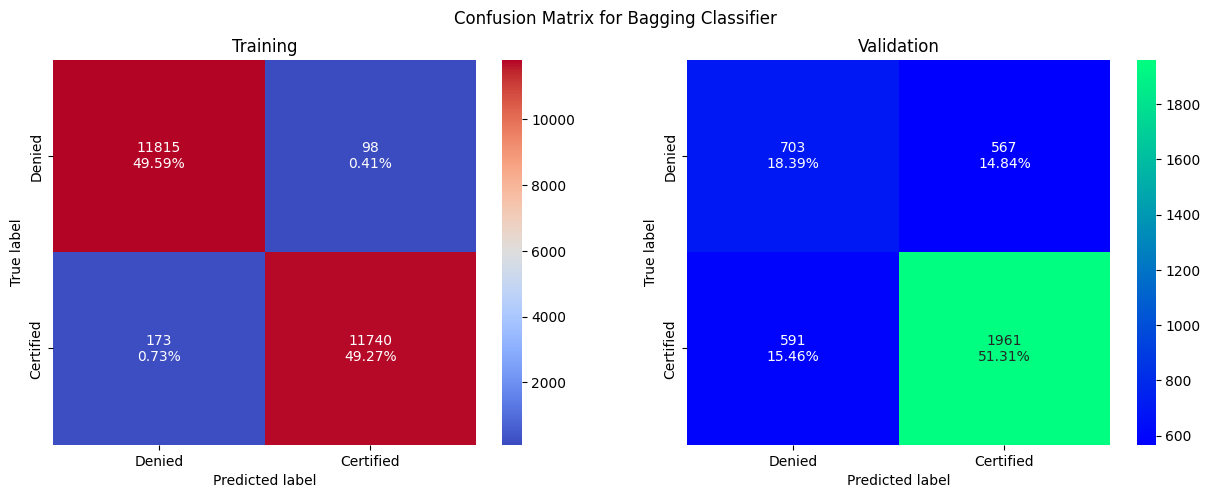

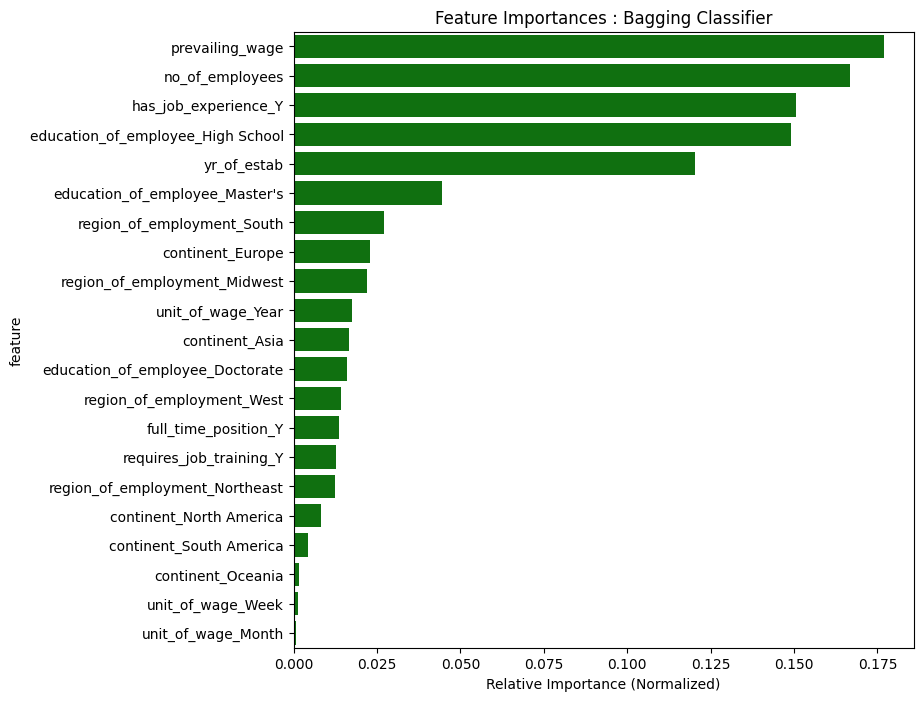

Building Model for Classifier: Random Forest Classifier
RandomForestClassifier(class_weight='balanced', random_state=1)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


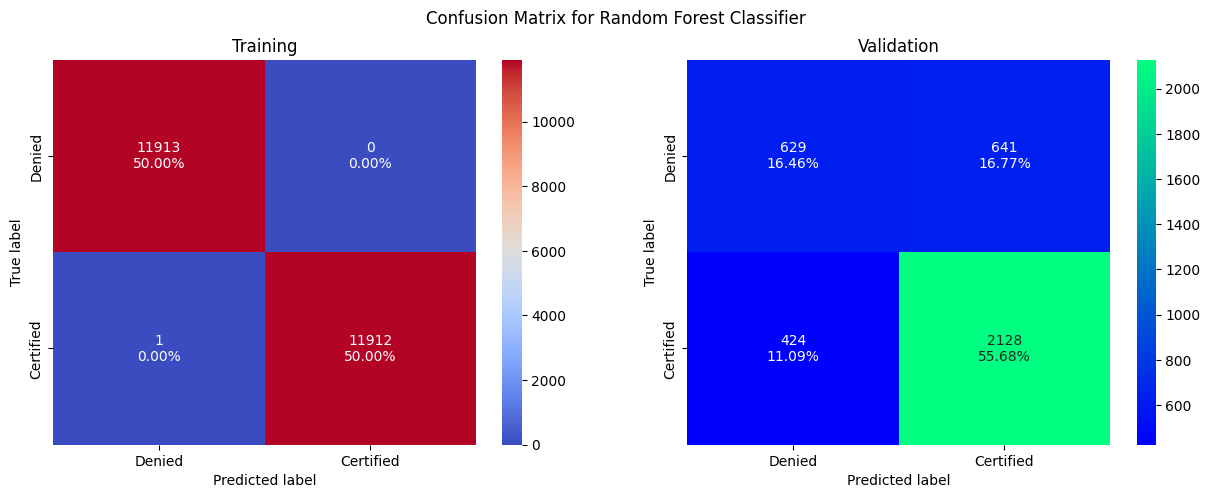

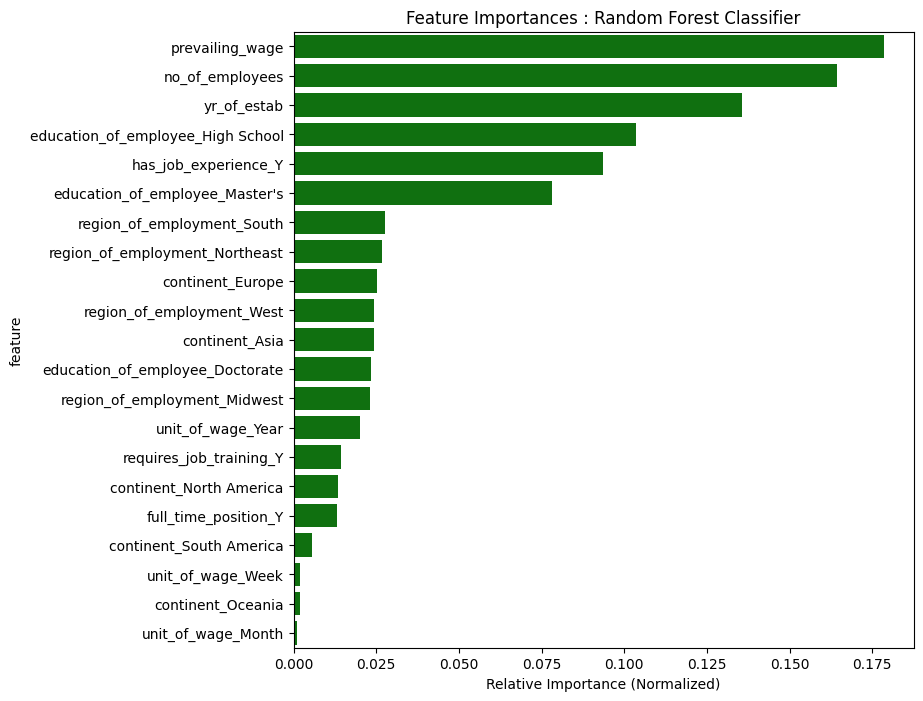

Building Model for Classifier: Gradient Boosting Classifier
GradientBoostingClassifier(random_state=1)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


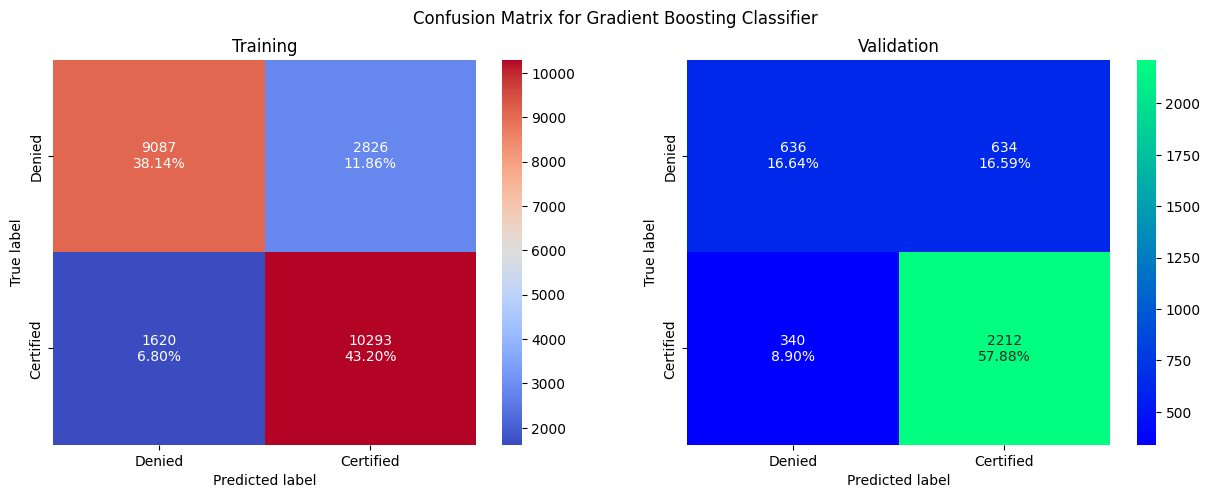

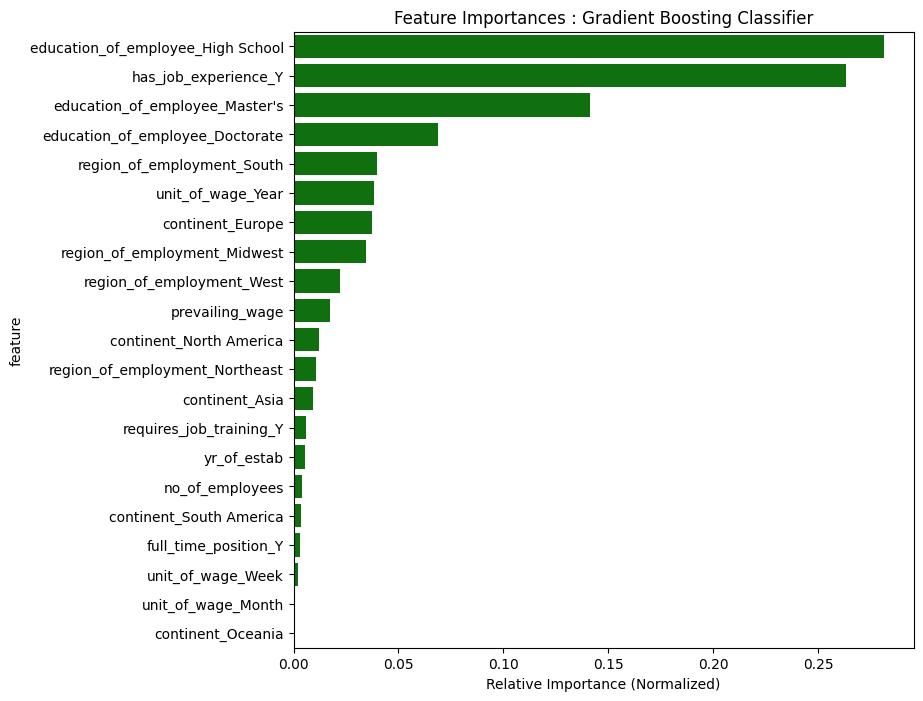

Building Model for Classifier: AdaBoost Classifier
AdaBoostClassifier(random_state=1)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


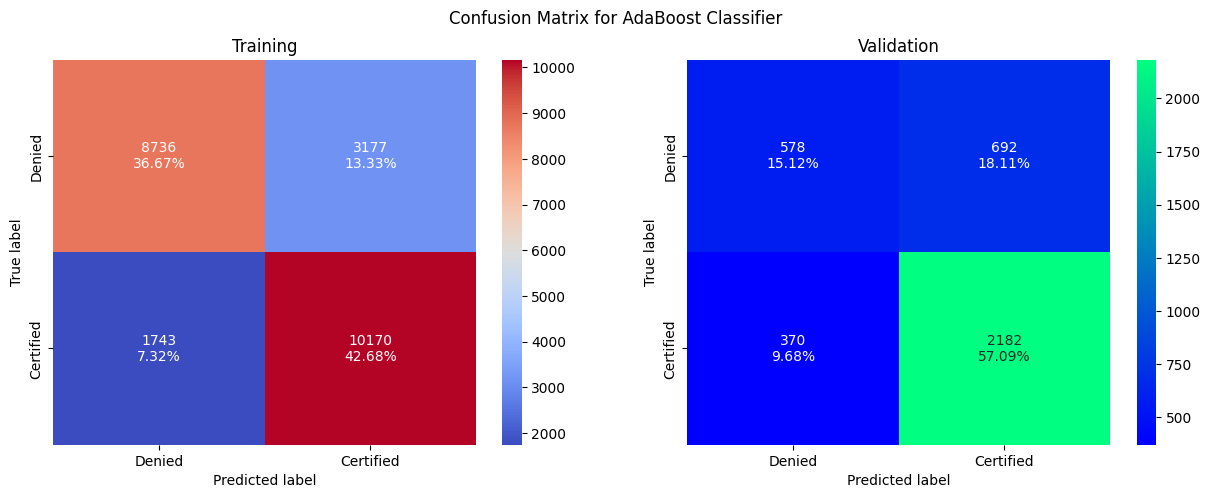

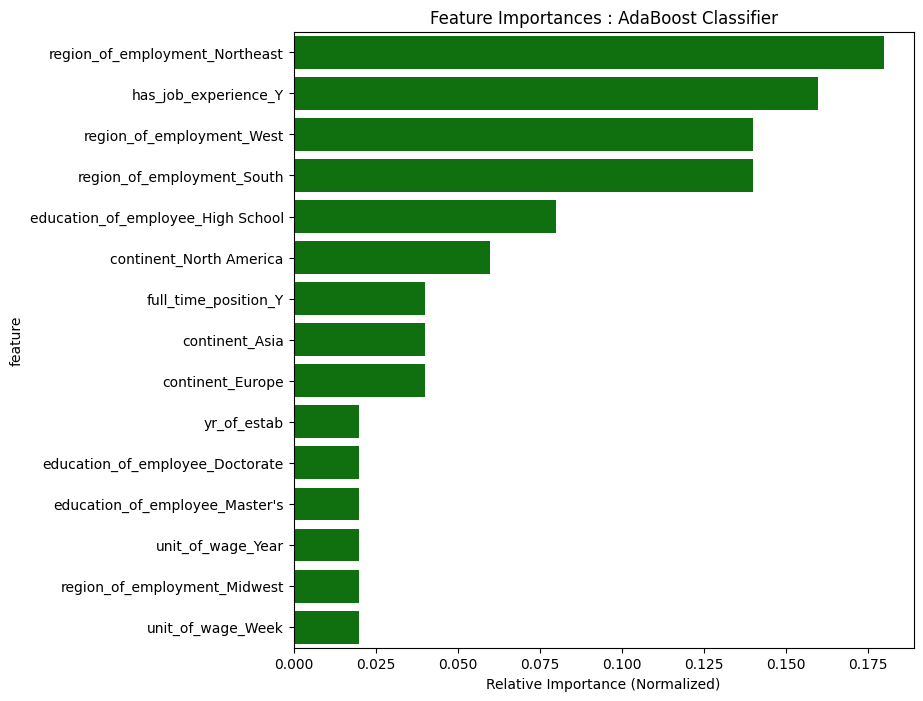

Building Model for Classifier: Decision Tree Classifier
DecisionTreeClassifier(class_weight='balanced', random_state=1)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


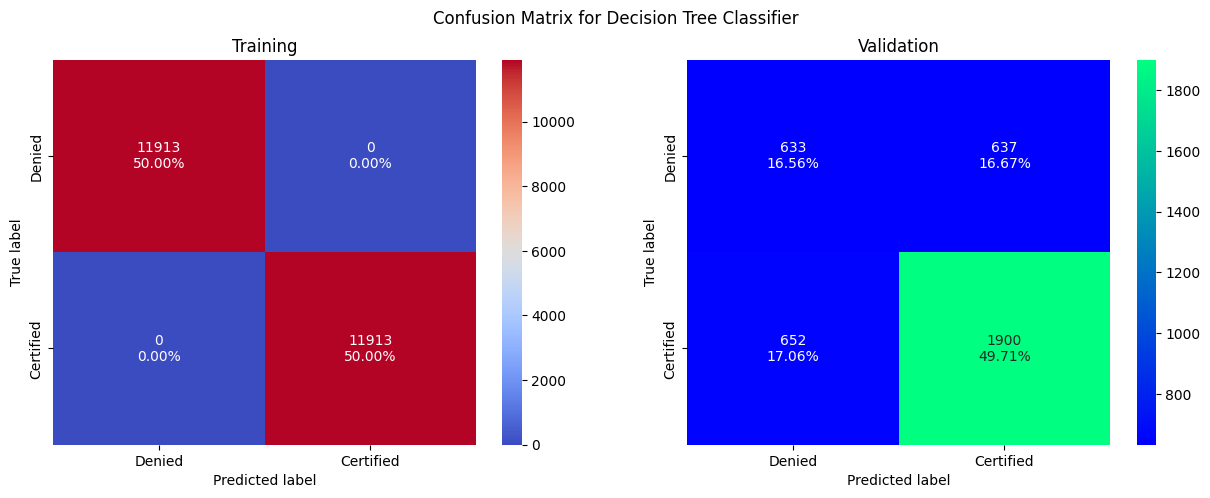

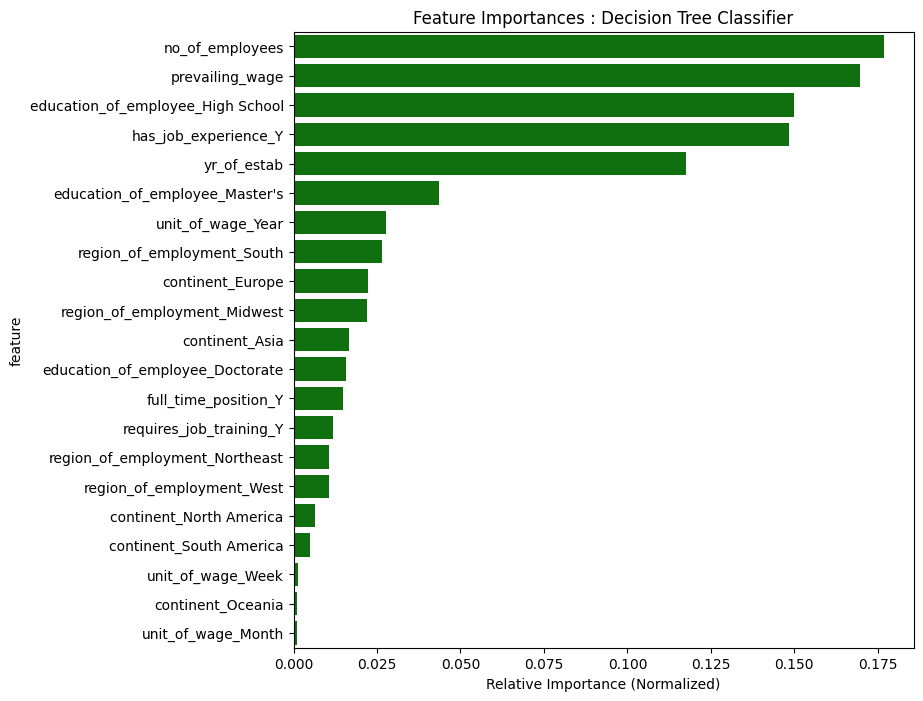

Building Model for Classifier: Logistic Regression
LogisticRegression(class_weight='balanced', random_state=1)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


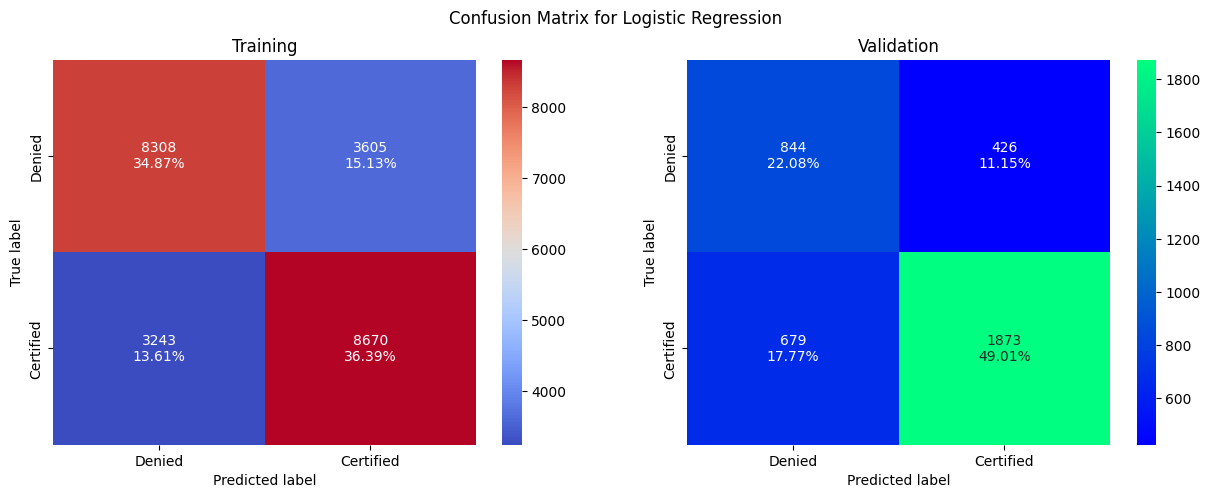

Building Model for Classifier: XGB Classifier
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


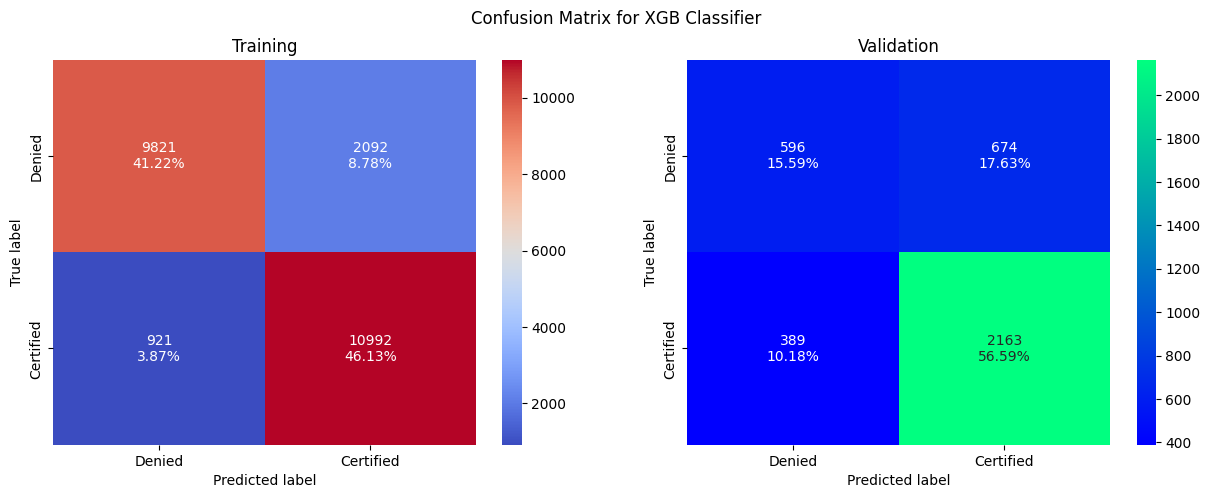

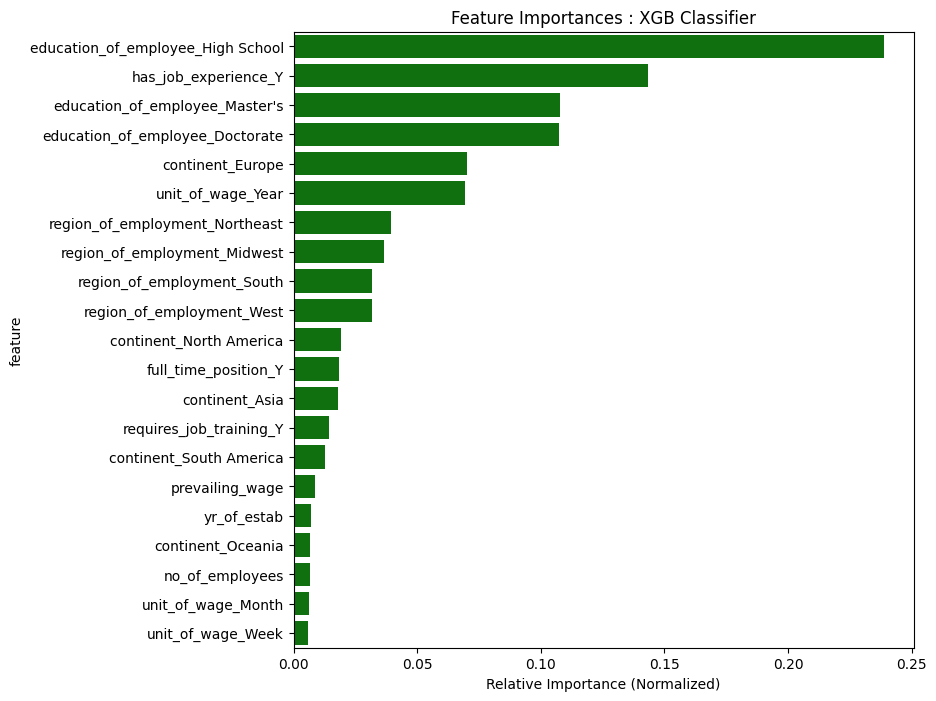

CPU times: total: 14.5 s
Wall time: 21.5 s


In [69]:
%%time
print("Building model & performance analysis for " +  get_bold_text("Over Sample Train and Validation data"))
df_style, trained_models = build_models_with_pipeline_of_multiple_classifier(models, X_train_over, y_train_over, X_validation, y_validation, show_conf_matx=True, show_diff=True, title="for Over Sample Train and Validation data")
all_trained_model[DEF][OVR] = trained_models
df_style

#### Observation

* Performance evaluation metrics on Training and Validation data set have yellow colored cells showing highest F1.
* Differnce of evaluation metrics (F1) on training and validation data set have cyan colored cells showing the minimum.  
* Bagging, Random forest, Decission Tree models are overfitting as they have very high (almost 100%) Recall, Precission, and F1 on training but low on Validation set.
* XGBoost has high recall in Training but low Recall on Validation. Therefore, it has overfitting.
* Logistic Regression has low Recall but high Precission.  
* **Gradient Boosting** has the highest F1-Score (.82) and Recall (.86) on Validation data followed by Adaboost model with Recal .85 and F1 .80.
* education_of_employee_High School, has_job_experience_Y, education_of_employee_Master's are the top important features in Gradient Boosting.

### Model Building with undersampled data

In [70]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label {}: {}".format(classes[1], sum(y_train == 1)))
print("Before Under Sampling, counts of label {}: {} \n".format(classes[0], sum(y_train == 0)))
print("After Under Sampling, counts of label {}: {}".format(classes[1], sum(y_train_un == 1)))
print("After Under Sampling, counts of label {}: {} \n".format(classes[0], sum(y_train_un == 0)))
print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label Certified: 11913
Before Under Sampling, counts of label Denied: 5923 

After Under Sampling, counts of label Certified: 5923
After Under Sampling, counts of label Denied: 5923 

After Under Sampling, the shape of train_X: (11846, 21)
After Under Sampling, the shape of train_y: (11846,) 



Building model & performance analysis for Under Sample Train and Validation data
Building Model for Classifier: Bagging Classifier
BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=1),
                  random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


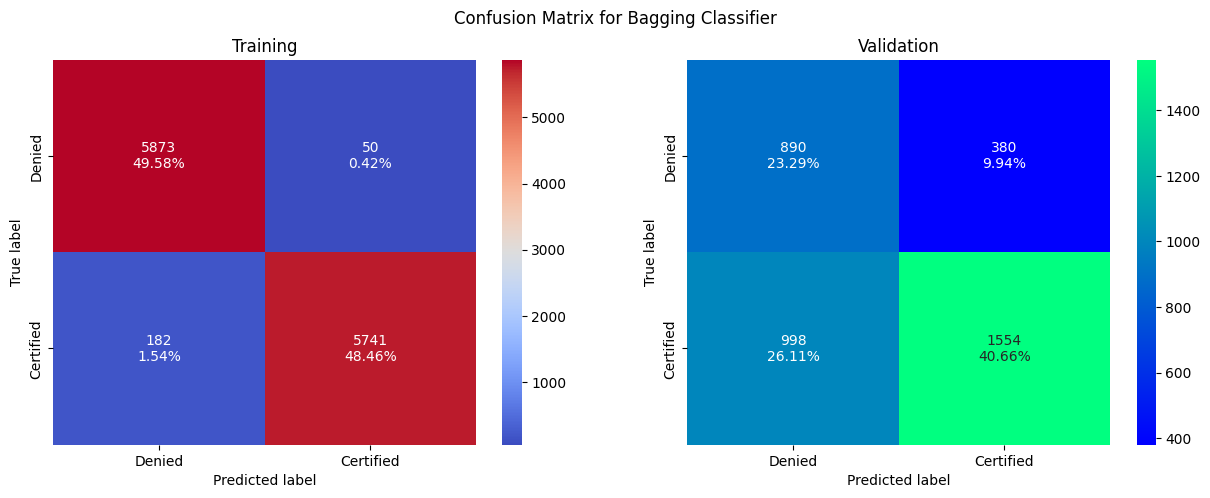

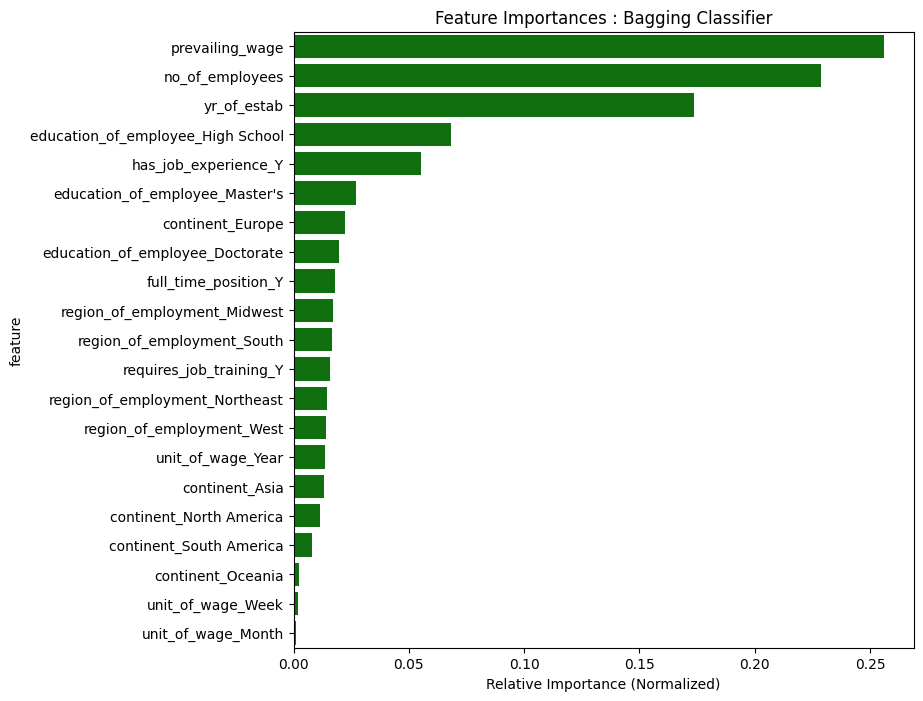

Building Model for Classifier: Random Forest Classifier
RandomForestClassifier(class_weight='balanced', random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


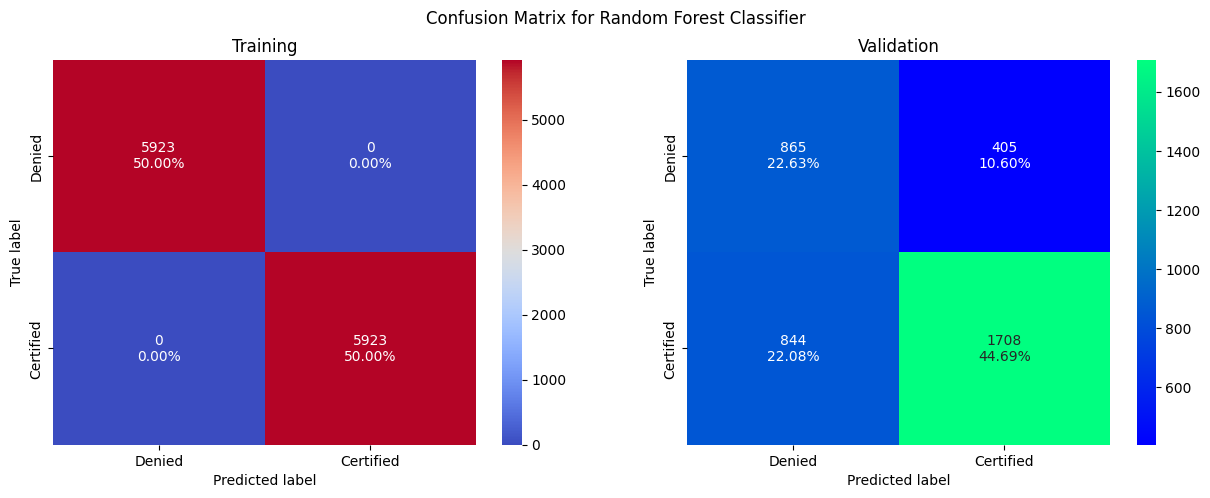

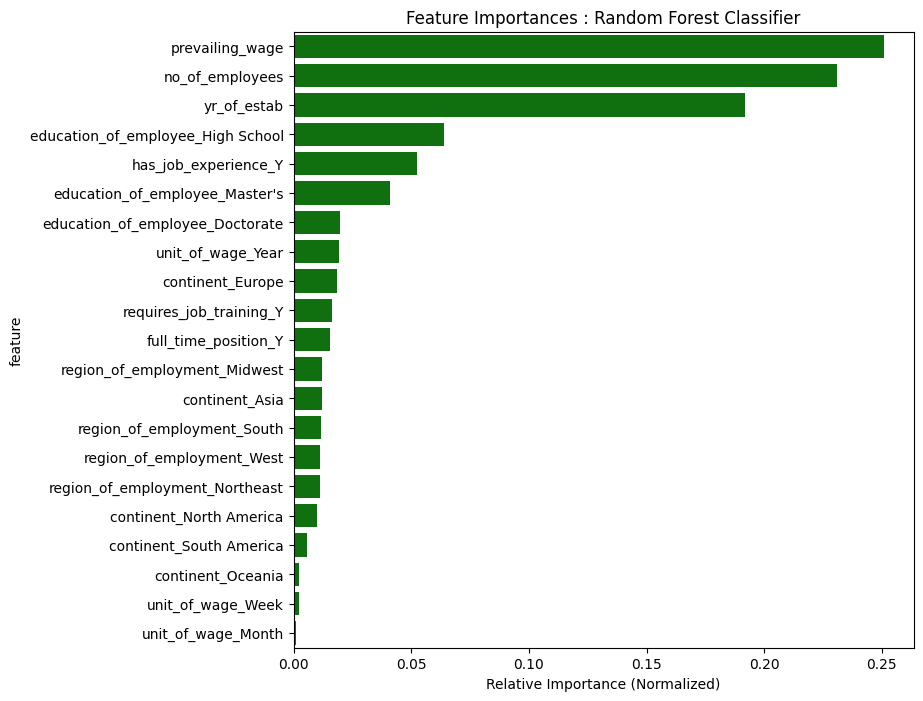

Building Model for Classifier: Gradient Boosting Classifier
GradientBoostingClassifier(random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


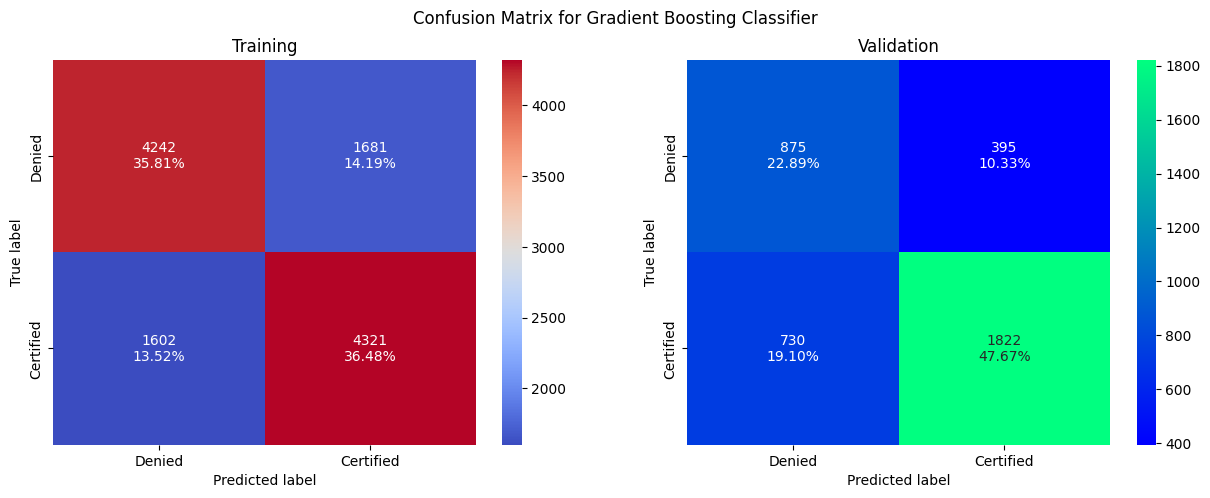

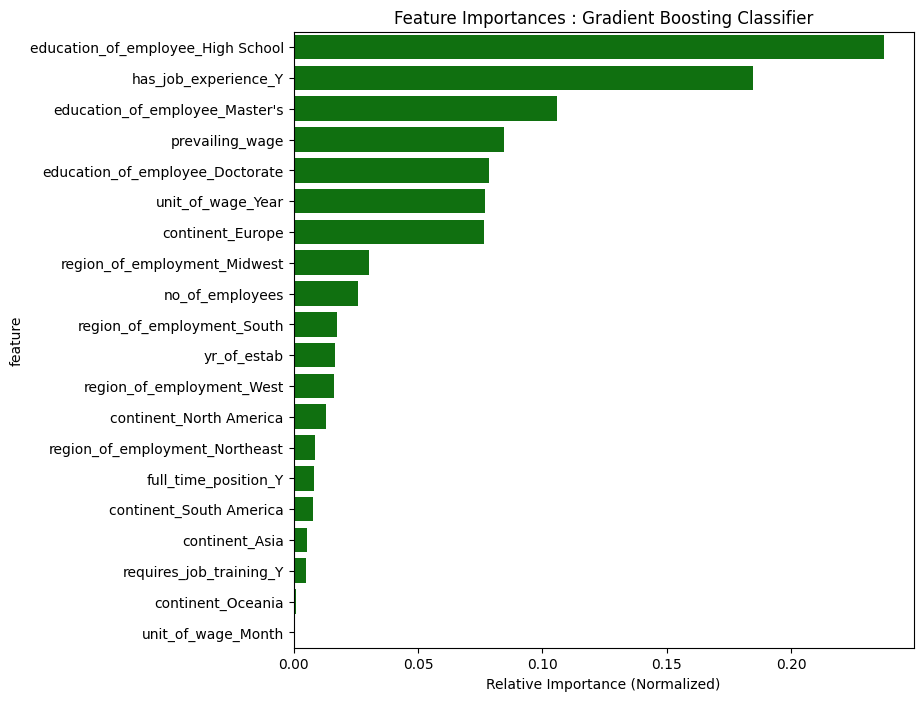

Building Model for Classifier: AdaBoost Classifier
AdaBoostClassifier(random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


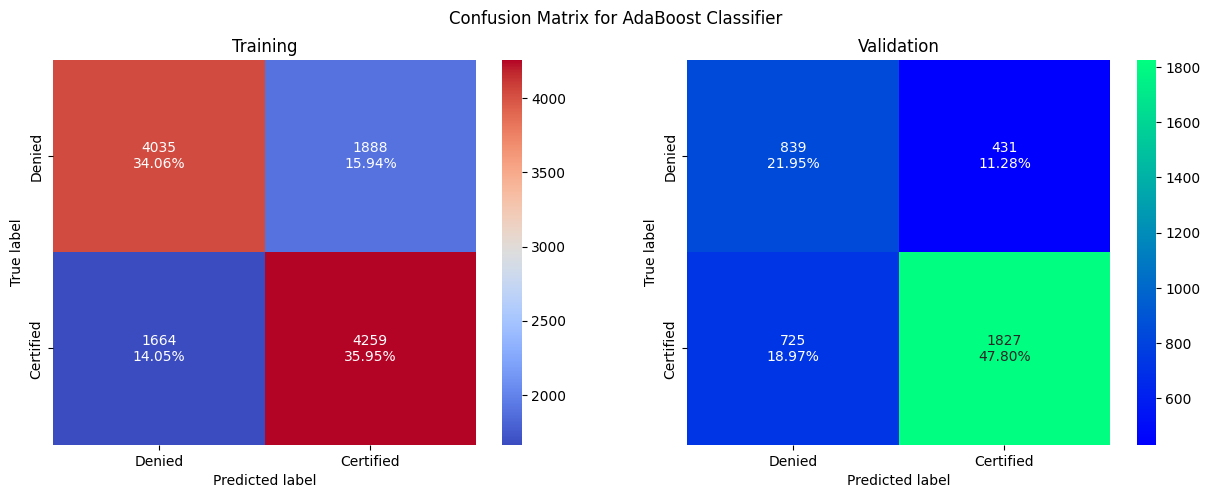

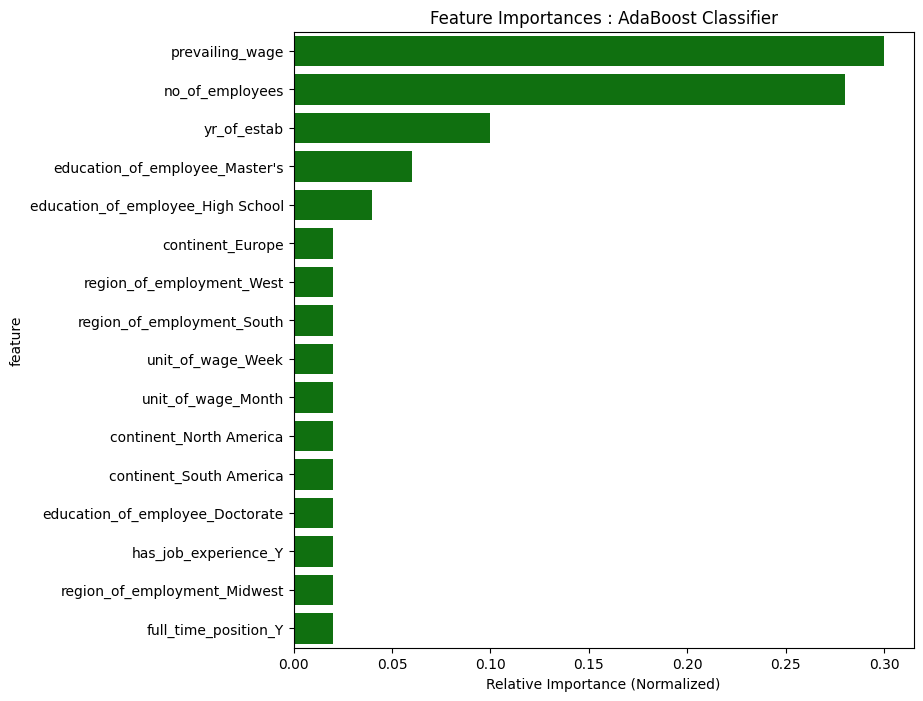

Building Model for Classifier: Decision Tree Classifier
DecisionTreeClassifier(class_weight='balanced', random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


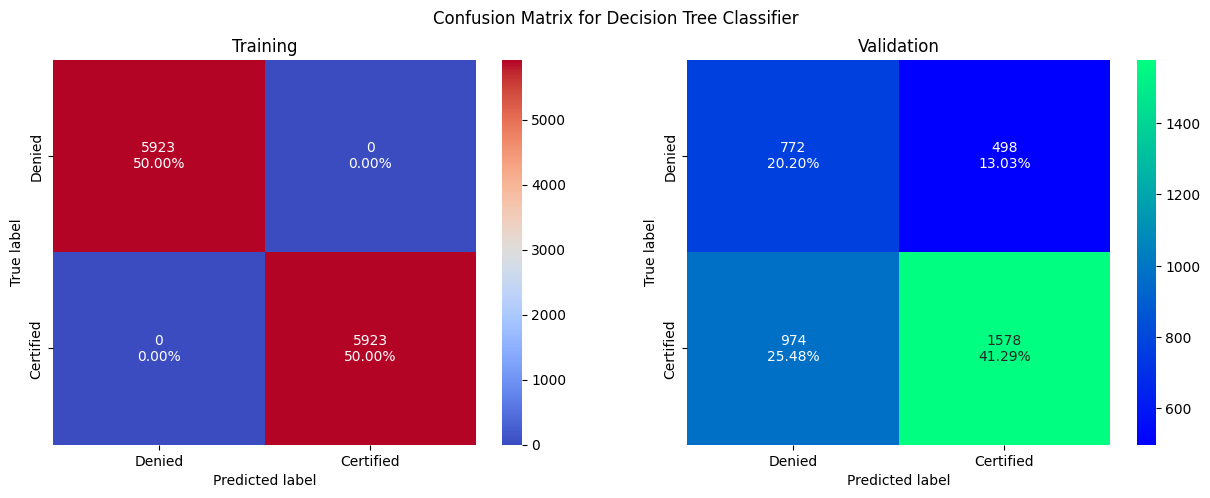

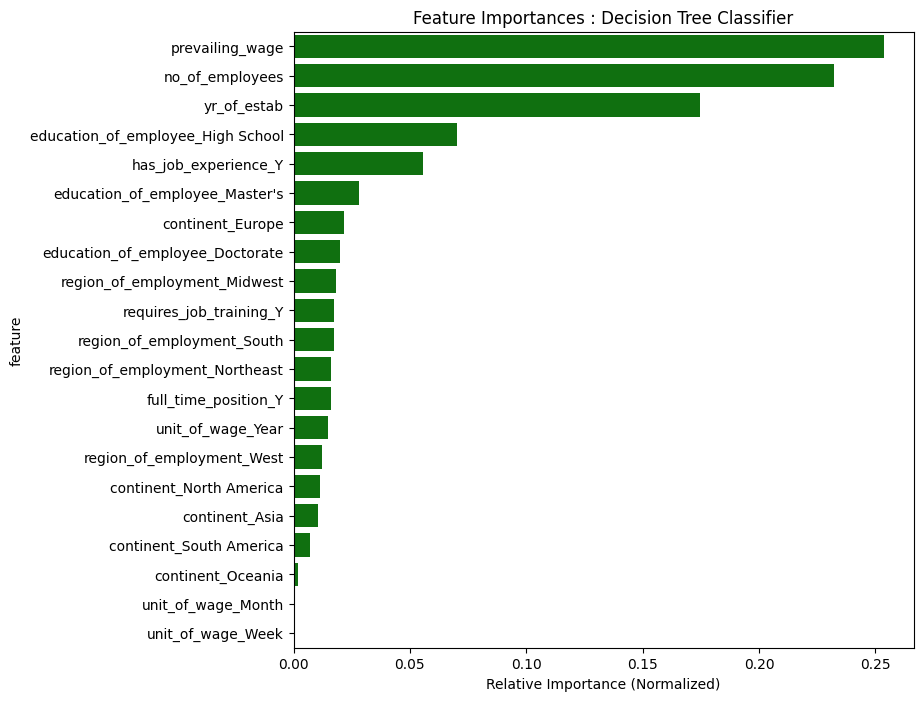

Building Model for Classifier: Logistic Regression
LogisticRegression(class_weight='balanced', random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


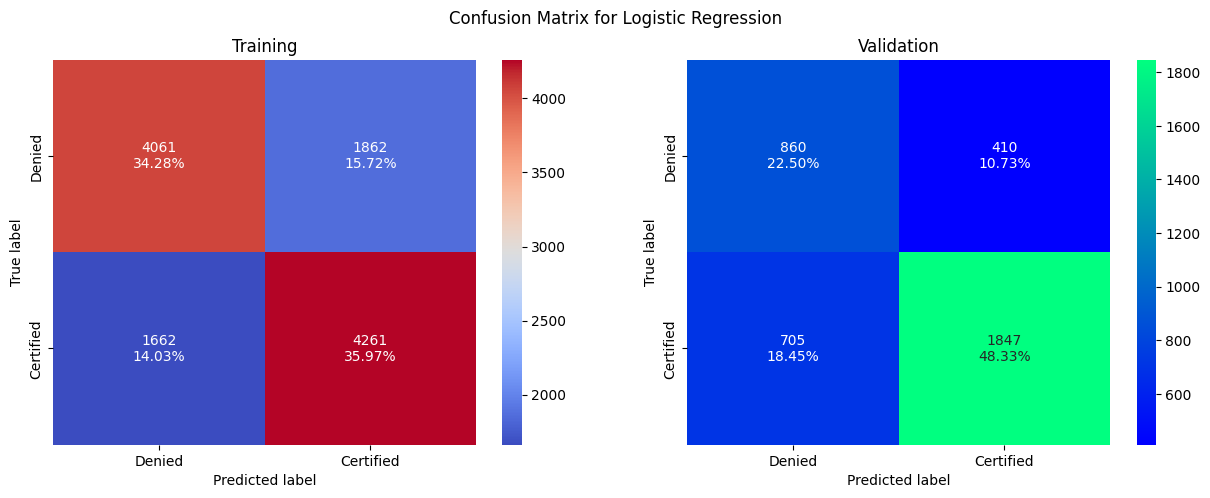

Building Model for Classifier: XGB Classifier
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


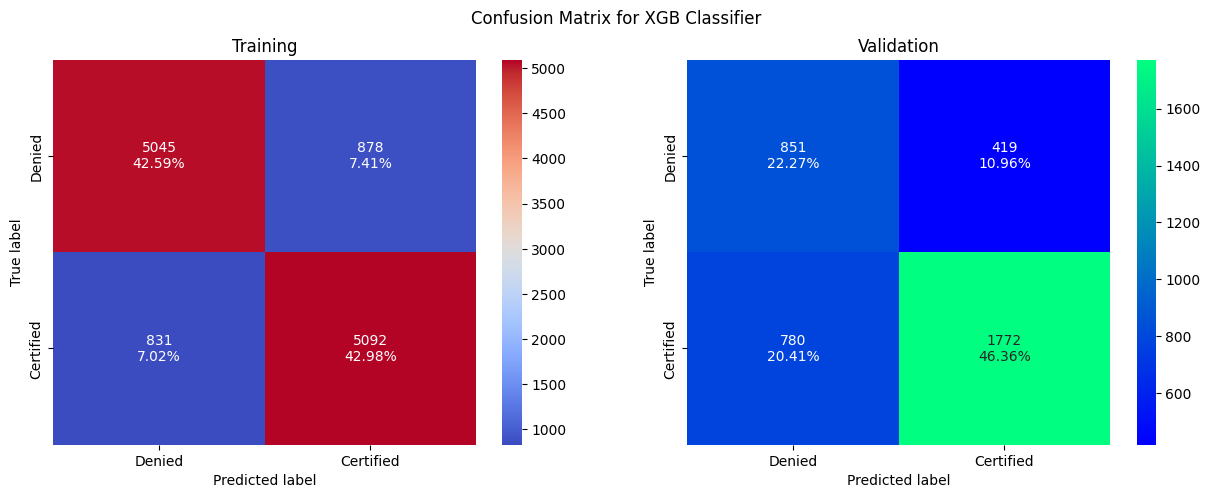

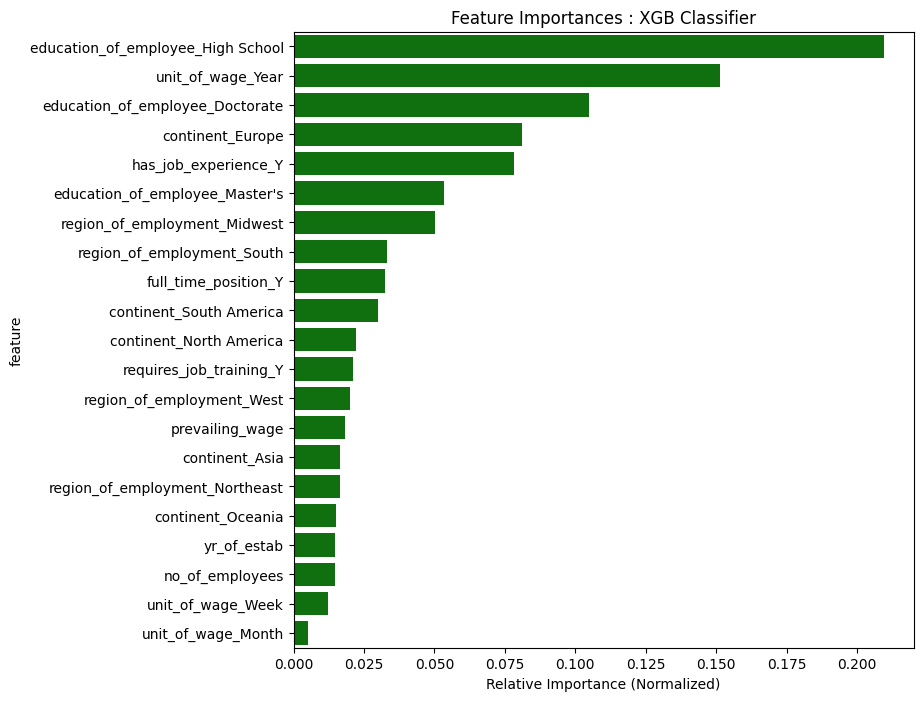

CPU times: total: 7.41 s
Wall time: 12.1 s


In [71]:
%%time
print("Building model & performance analysis for " +  get_bold_text("Under Sample Train and Validation data"))
df_style, trained_models = build_models_with_pipeline_of_multiple_classifier(models, X_train_un, y_train_un, X_validation, y_validation, show_conf_matx=True, show_diff=True, title="for Under Sample Train and Validation data")

all_trained_model[DEF][UND] = trained_models
df_style


* Performance evaluation metrics on Training and Validation data set have yellow colored cells showing highest F1.
* Differnce of evaluation metrics (F1) on training and validation data set have cyan colored cells showing the minimum.  
* Bagging, Random forest, Decission Tree models are overfitting as they have very high (almost 100%) Recall, Precission, and F1 on training but low on Validation set.
* XGBoost has high recall on Training but low Recall on Validation. Therefore, it has overfitting.
* **Logistic Regression** has best Recall (.72), Precision (.81) and F1 (.76) followed by Adaboost and Gradient Boosing models.
* education_of_employee_High School, unit_of_wage_Year, and employee_of_education_Doctorate are the most important features for Logistic Regression.
* **All the models with Under Sampling perform below that models with original data and models with Over Sampling.** 

## Hyperparameter Tuning

In [92]:
BAG = 'Bagging Classifier'
RF = 'Random Forest Classifier'
GBM = 'Gradient Boosting Classifier'
ADA = 'AdaBoost Classifier'
DCT = 'Decision Tree Classifier'
LR = 'Logistic Regression'
XGB = 'XGB Classifier'

tuned_param_dict = {
    BAG: {
    'n_estimators': np.arange(50,200,10),
    'max_features': [0.90, 0.92, 0.95, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
},
    RF : {
                'max_depth': list(np.arange(5,20,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,200,10)},
    GBM : {
    "n_estimators": np.arange(50,200,10),
    "learning_rate": [0.01, .02, .03, .04, 0.05, .1],
    'max_depth': np.arange(5, 20, 5)
    
},
    ADA: {
    "n_estimators": np.arange(50,200,10),
    "learning_rate": [0.01, .02, .03, .04, 0.05, .1],
    "estimator": [
        DecisionTreeClassifier(max_depth=3, random_state=1),
        DecisionTreeClassifier(max_depth=4, random_state=1),
        DecisionTreeClassifier(max_depth=5, random_state=1),
        DecisionTreeClassifier(max_depth=6, random_state=1)
    ],
},
    DCT: {
    "max_depth": np.arange(5, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
},
    LR: {
    'max_iter' : range(100, 500),
    'warm_start' : [True, False],
    'solver' : ['lbfgs', 'newton-cg', 'liblinear'],
    'C' : np.arange(0, 1, 0.01),
},
    XGB: {
    "n_estimators": np.arange(50,200,10),
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.01, .02, .03, .04, 0.05, .1],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}
}

# Functions to tune model based on flag use_grid_search.
# It uses GridSearchCV if use_grid_search = True, else use RandomizedSearchCV.
def get_best_method_by_grid_search(model, model_name, X_tr, y_tr, param, scorer, random_state=1, use_grid_search=False):
    search_cv = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=50, scoring=scorer, cv=5, random_state=random_state, n_jobs = -1)
    search_cv_name = 'RandomizedSearchCV'
    if use_grid_search == True:
        search_cv = GridSearchCV(estimator=model, param_grid=param, scoring=scorer, cv=5)
    
    search_cv.fit(X_tr, y_tr)
    best_model = search_cv.best_estimator_
    
    print("{} \n\nParam of best model by {}: {}".format(get_bold_text(model_name), search_cv_name, best_model.get_params()))
    return best_model

# Function to tune each models and generate performance metrics    
def tune_models_with_pipeline_of_multiple_classifier(models, param_list, X_tr, y_tr, X_tst, y_tst, scorer, use_grid_search = False, show_diff = False, show_conf_matx = False, random_state = 1, title=''):
    model_perf_record_list = []
    schema = None
    model_name = []
    trained_model_dict = {}
    for name, model in models:
        param = param_list[name]
        best_model = get_best_method_by_grid_search(model, name, X_tr, y_tr, param, scorer, random_state=random_state, use_grid_search = use_grid_search)
        
        is_feature_tree_available = False if name == LR else True
        model_train_perf, model_test_perf, trained_model = get_model_train_and_prediction(best_model, name, X_tr, y_tr, X_tst, y_tst, show_conf_matx = show_conf_matx, is_feature_tree_available=is_feature_tree_available)
        trained_model_dict[name] = {MODEL:trained_model, MODEL_TRAIN_PERF:model_train_perf, MODEL_TEST_PERF:model_test_perf}
        
        record, schema = extract_train_and_test_accuracy_add_diff(model_train_perf, model_test_perf, get_diff=show_diff)
        model_perf_record_list.append(record)
        model_name.append(name)
    
    if show_diff == True:
        return get_stylish_dataframe_for_model_evaluation(pd.DataFrame(model_perf_record_list,
                      index=pd.Index(model_name, name='Classifiers'),
                      columns=pd.MultiIndex.from_product([['Training', 'Validation', 'Diff(Training - Validation)'], schema], names=['Data set:', 'Metric:'])), show_diff, title=title), trained_model_dict
    else:
        return get_stylish_dataframe_for_model_evaluation(pd.DataFrame(model_perf_record_list,
                      index=pd.Index(model_name, name='Classifiers'),
                      columns=pd.MultiIndex.from_product([['Training', 'Validation'], schema], names=['Data set:', 'Metric:'])), show_diff, title=title), trained_model_dict




### F1-Score for tuning model and select best

In [73]:
# Defining F1-Score for evaluating and select best models for tuning.
f1_scorer = metrics.make_scorer(metrics.f1_score)


Tune model & performance analysis for Train and Validation data
Bagging Classifier 

Param of best model by RandomizedSearchCV: {'bootstrap': True, 'bootstrap_features': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': 'balanced', 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(class_weight='balanced', random_state=1), 'max_features': 0.92, 'max_samples': 1.0, 'n_estimators': 170, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
BaggingClassifier(bootstrap_features=True,
                  estimator=DecisionTreeClassifier(class_weight='balanced',
                           

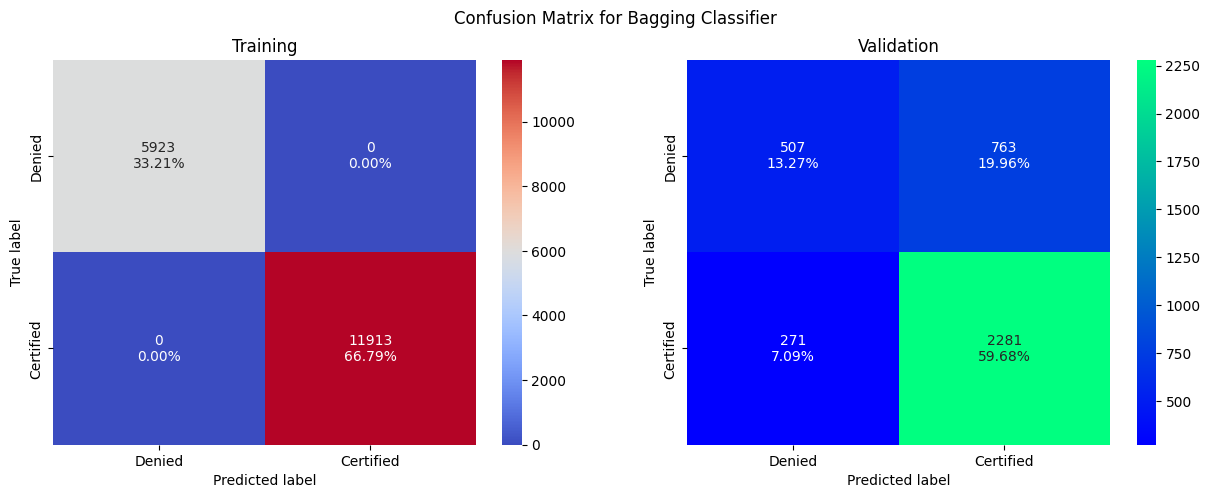

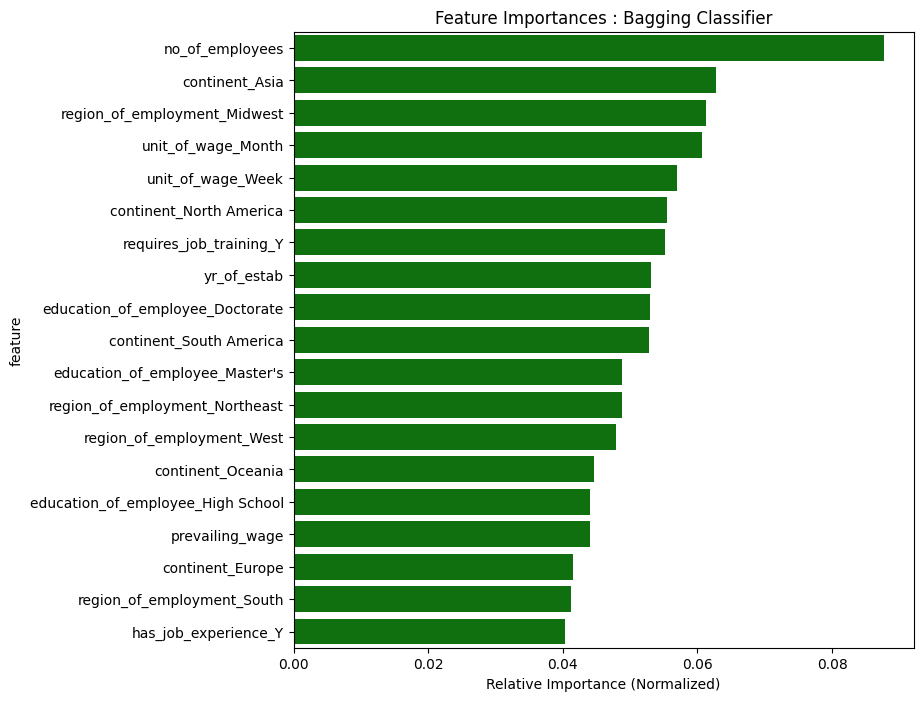

Random Forest Classifier 

Param of best model by RandomizedSearchCV: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=80, random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


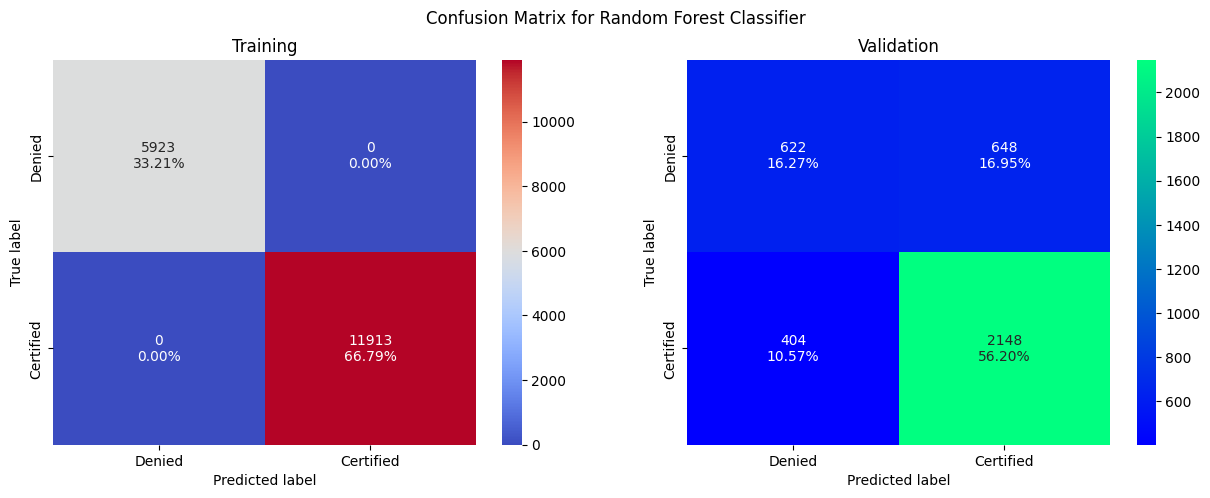

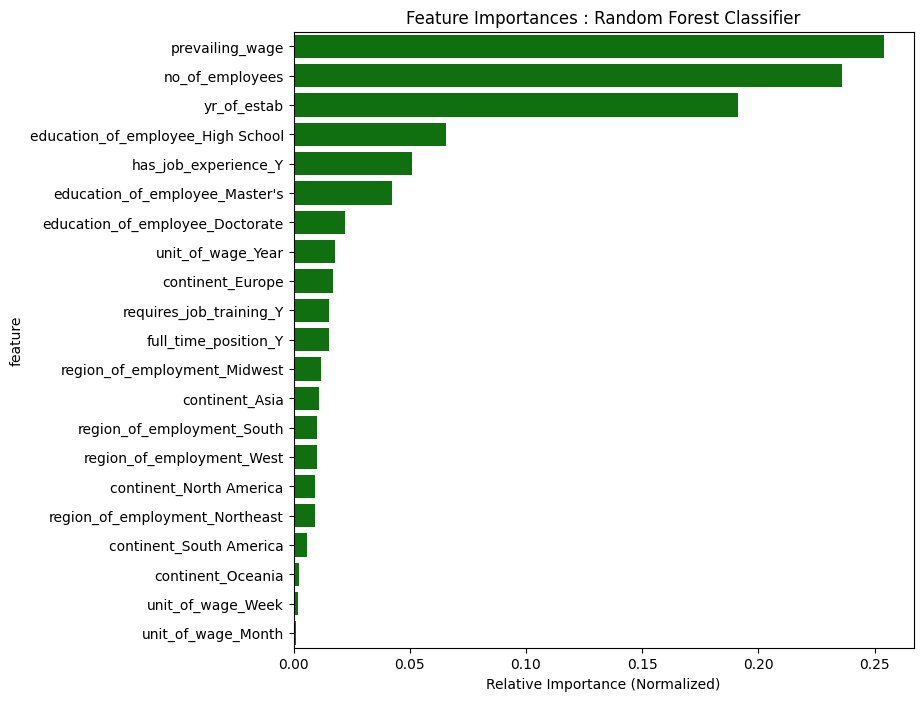

Gradient Boosting Classifier 

Param of best model by RandomizedSearchCV: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.04, 'loss': 'log_loss', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
GradientBoostingClassifier(learning_rate=0.04, max_depth=5, n_estimators=150,
                           random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


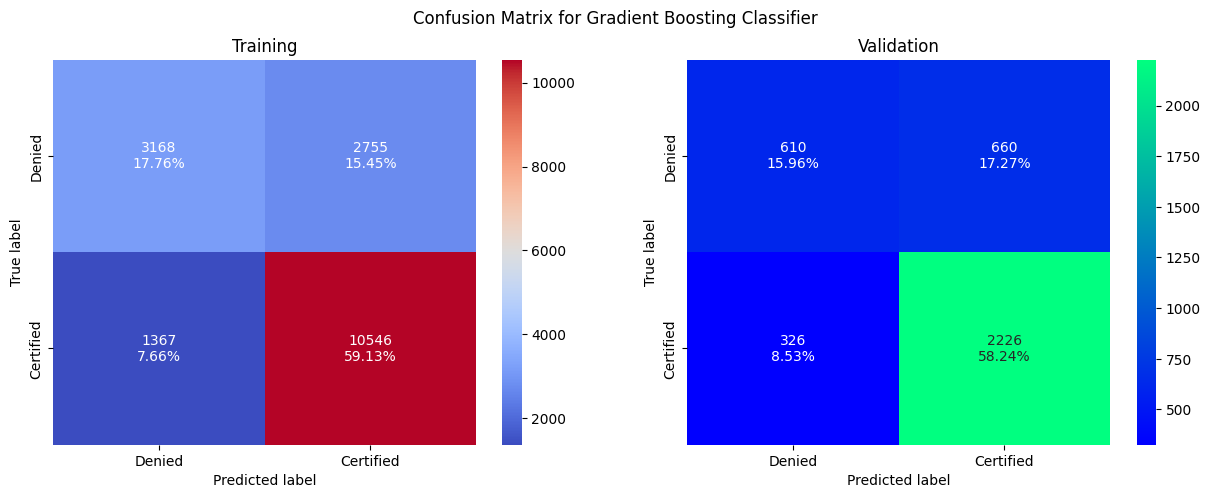

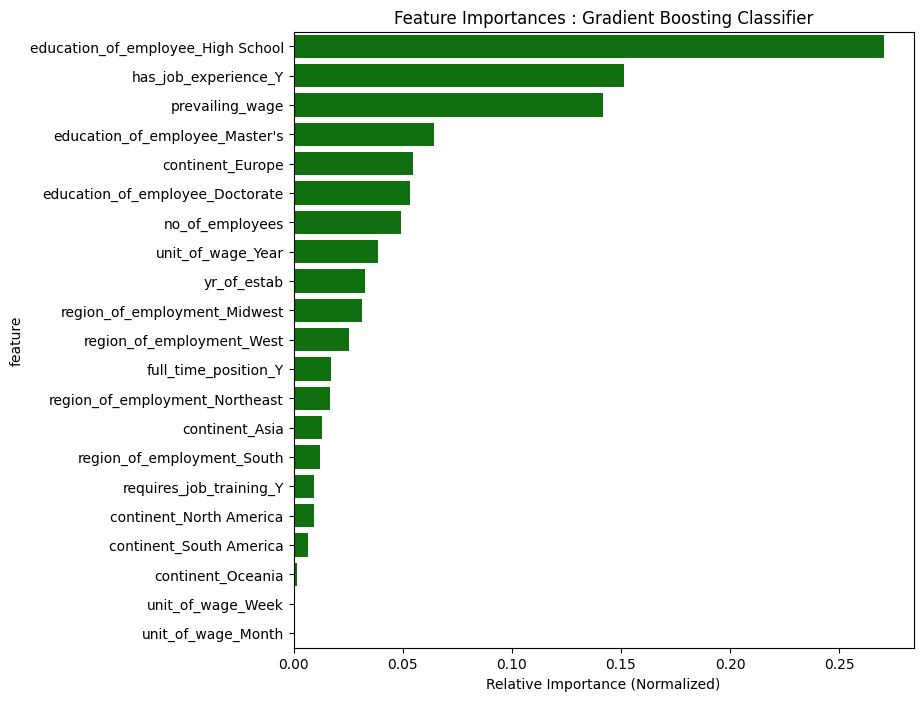

AdaBoost Classifier 

Param of best model by RandomizedSearchCV: {'algorithm': 'SAMME.R', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 4, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=4, random_state=1), 'learning_rate': 0.03, 'n_estimators': 80, 'random_state': 1}
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=1),
                   learning_rate=0.03, n_estimators=80, random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:255

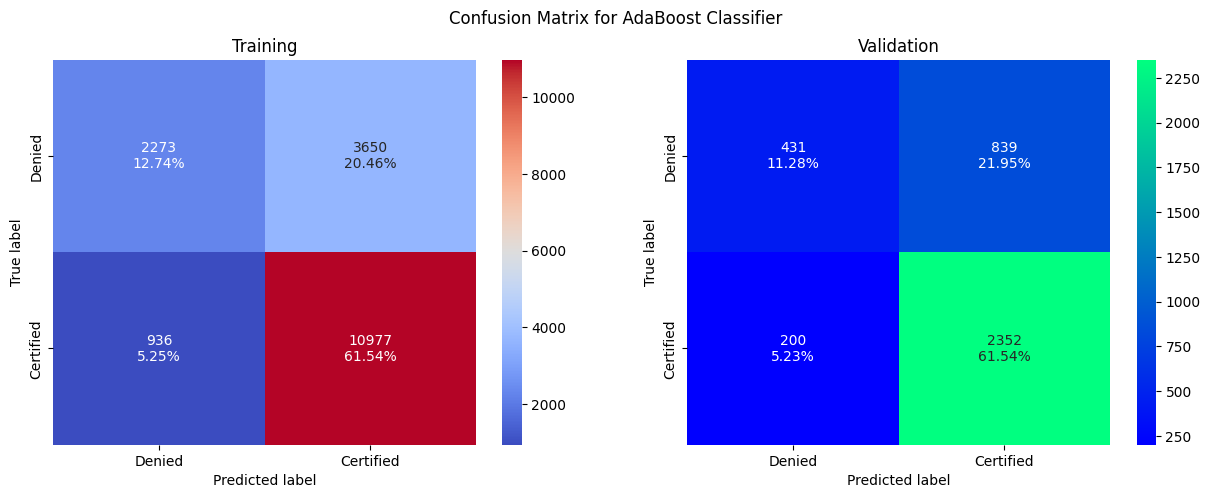

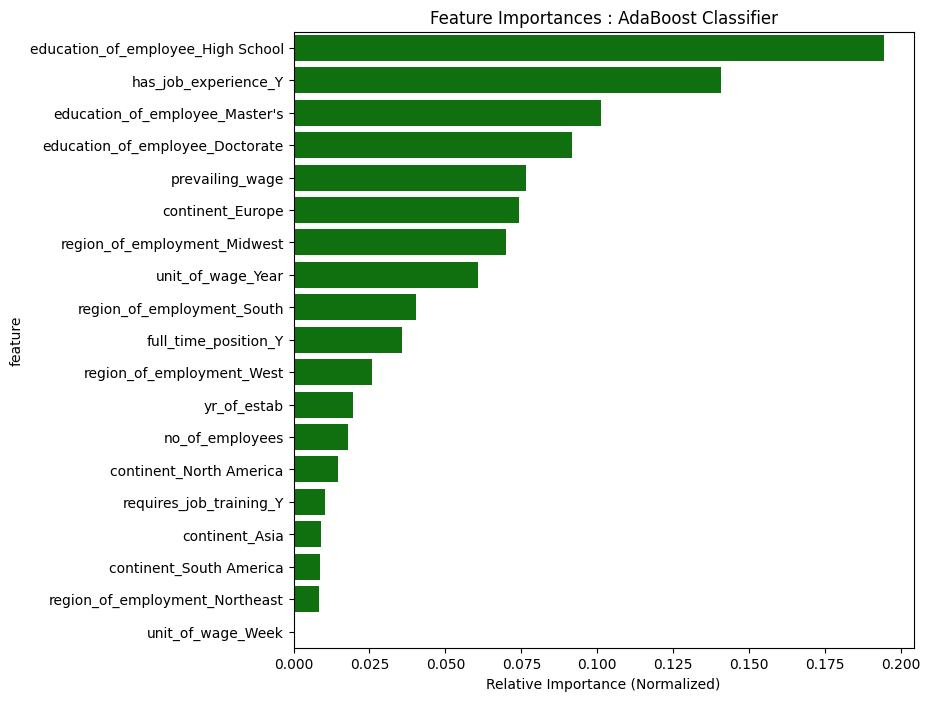

Decision Tree Classifier 

Param of best model by RandomizedSearchCV: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 1, 'splitter': 'best'}
DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_samples_leaf=3, random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


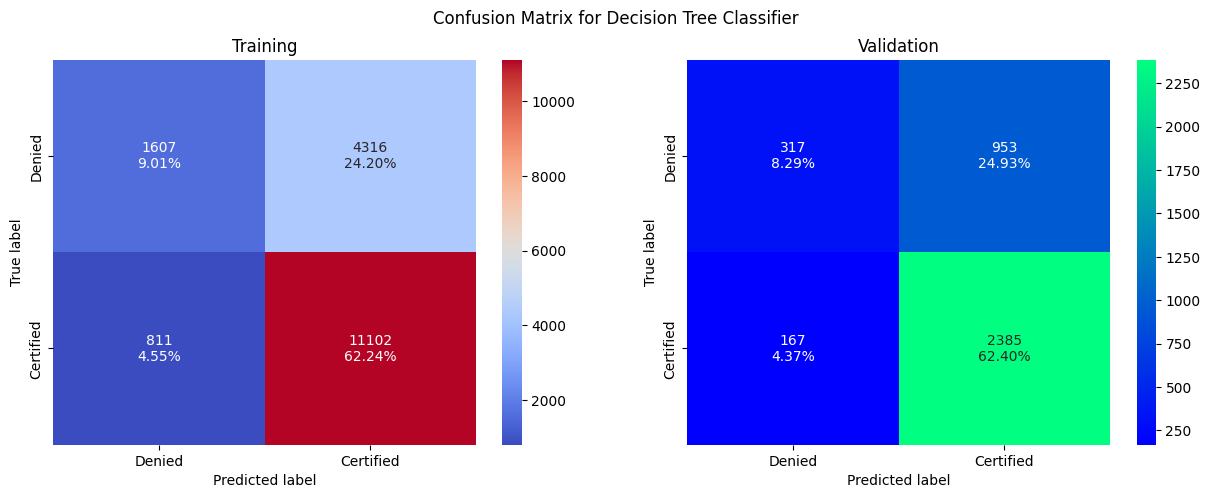

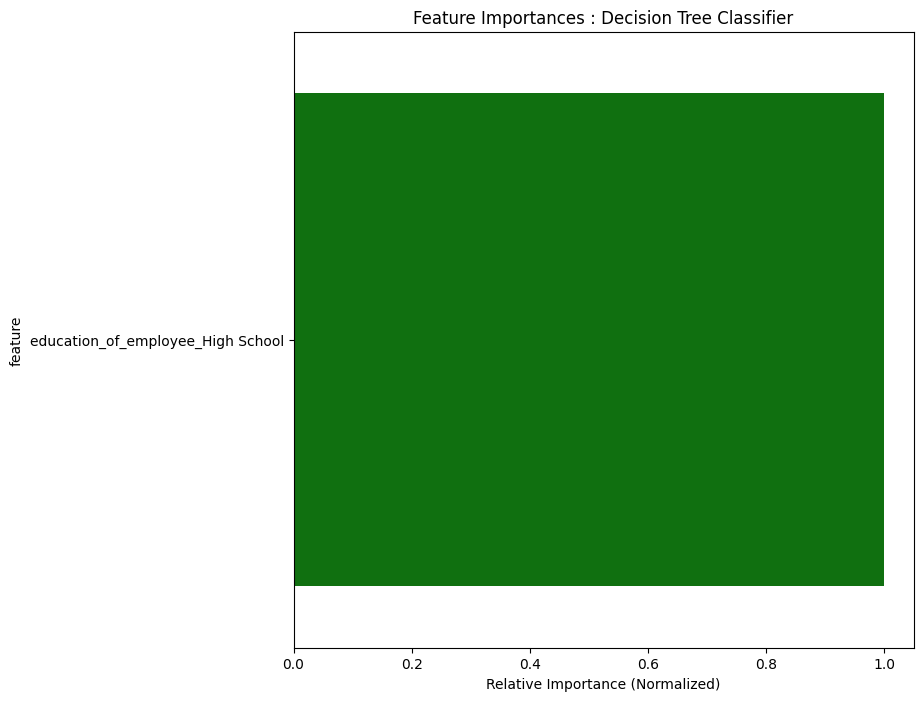

Logistic Regression 

Param of best model by RandomizedSearchCV: {'C': 0.92, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 157, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
LogisticRegression(C=0.92, class_weight='balanced', max_iter=157,
                   random_state=1)
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


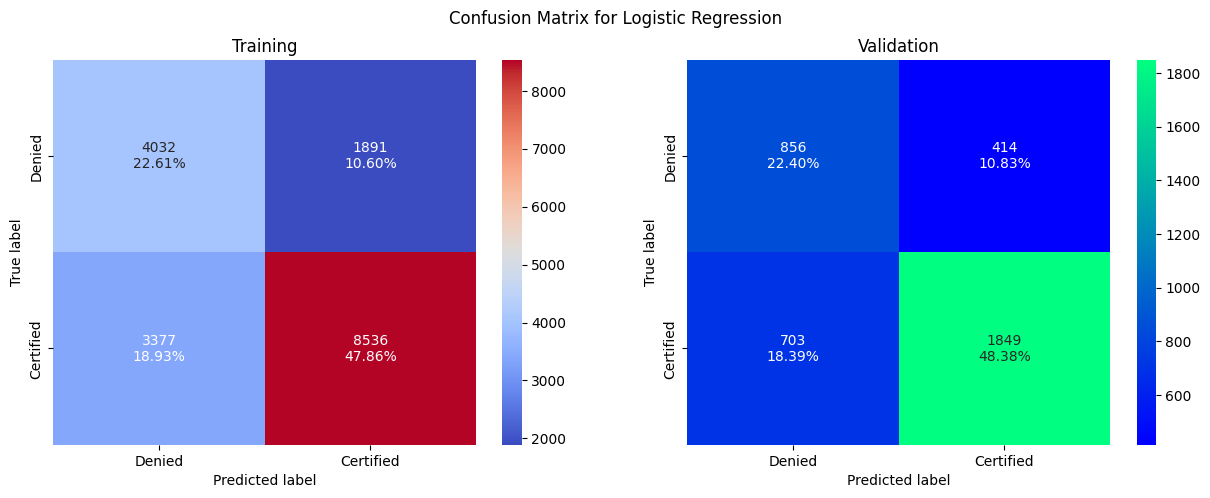

XGB Classifier 

Param of best model by RandomizedSearchCV: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': 0.7, 'colsample_bynode': None, 'colsample_bytree': 0.7, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.02, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 120, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 1, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.7, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
XGBClassifier(base_score=None, booster=None, 

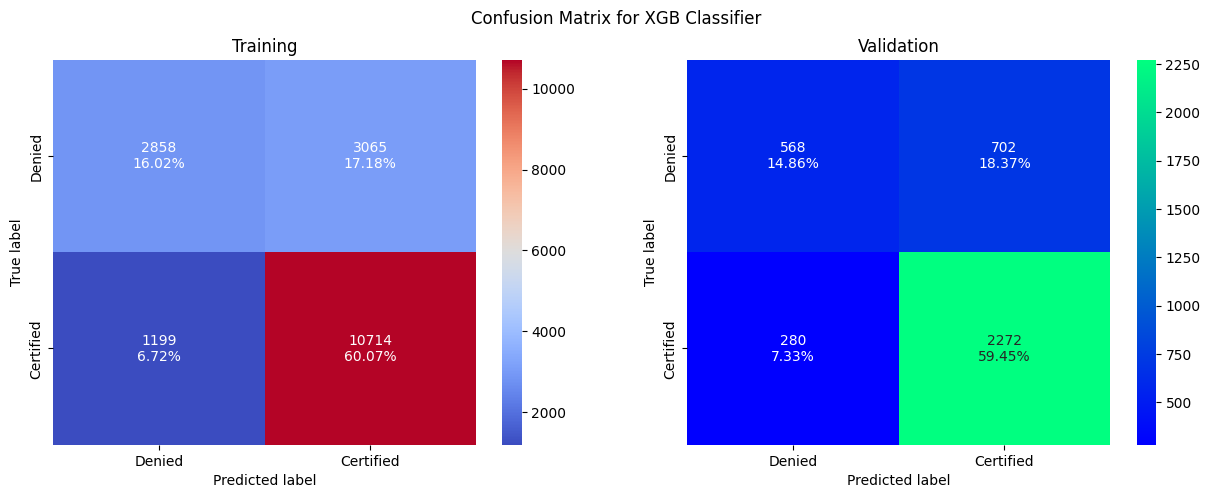

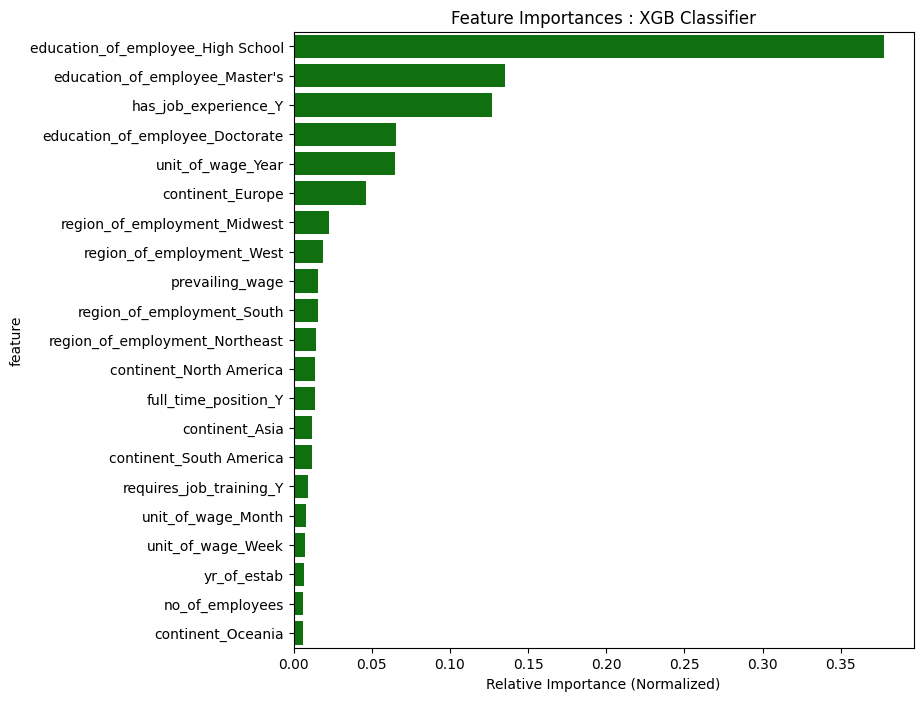

CPU times: total: 59.9 s
Wall time: 55min 29s


In [74]:
%%time
print("Tune model & performance analysis for " +  get_bold_text("Train and Validation data"))
df_style, trained_models = tune_models_with_pipeline_of_multiple_classifier(models, tuned_param_dict, X_train, y_train, X_validation, y_validation, scorer=f1_scorer, use_grid_search = False, show_diff = True, show_conf_matx = True, random_state = 1, title="for original data after model Tuning")

temp_dict = {}
temp_dict[ORG] = trained_models
all_trained_model[TUN] = temp_dict
df_style

#### Observation
* Performance evaluation metrics on Training and Validation data set have yellow colored cells showing highest F1 Score.
* Differnce of evaluation metrics (F1) on training and validation data set have cyan colored cells showing the minimum. 
* Bagging, Random forest models are overfitting as they have very high (almost 100%) Recall, Precission, and F1 on training but low on Validation set.
* Decision Tree has highest Recall.
* Gradient Boosting and Ada Boosting have the high recall and F1. 
* Logistic Regression has a the lowest F1 and Recall.
* **XGB** has the highest F1 Score (.82)
* education_of_employee_High School, employee_of_education_Master's, and has_job_experience_Y are the most important features for XGB.

Tune model & performance analysis for Over Sampled Train and Validation data
Bagging Classifier 

Param of best model by RandomizedSearchCV: {'bootstrap': True, 'bootstrap_features': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': 'balanced', 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(class_weight='balanced', random_state=1), 'max_features': 0.95, 'max_samples': 1.0, 'n_estimators': 140, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
BaggingClassifier(bootstrap_features=True,
                  estimator=DecisionTreeClassifier(class_weight='balanced',
              

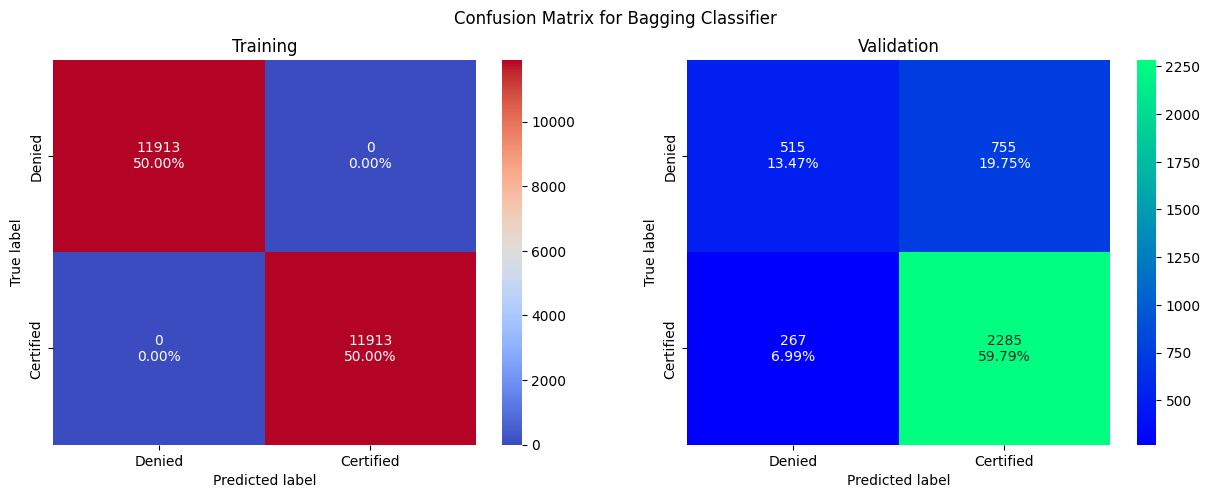

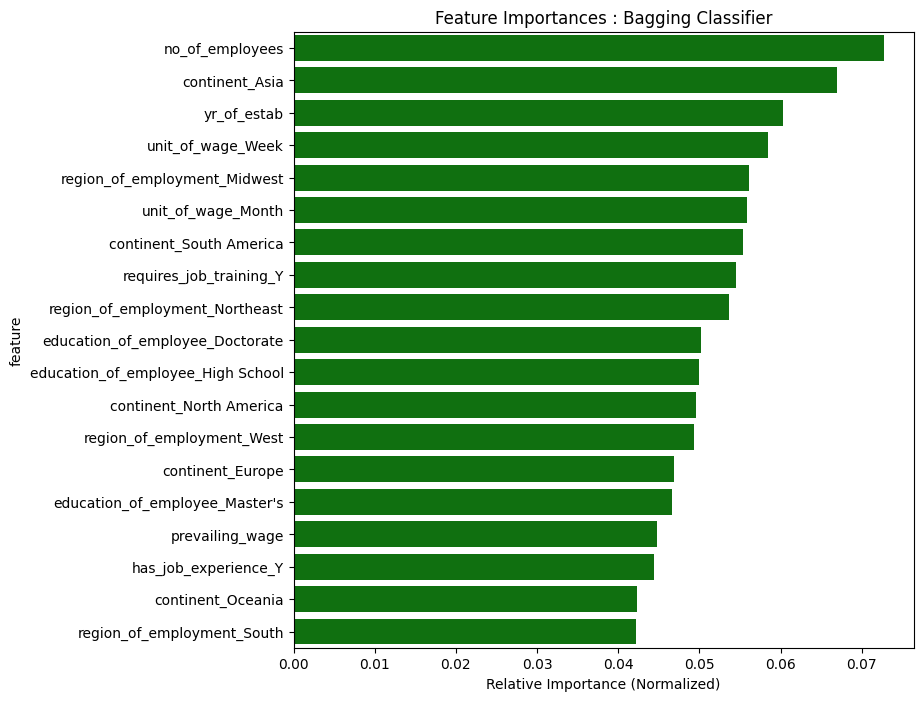

Random Forest Classifier 

Param of best model by RandomizedSearchCV: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 190, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=6, min_samples_split=7,
                       n_estimators=190, random_state=1)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


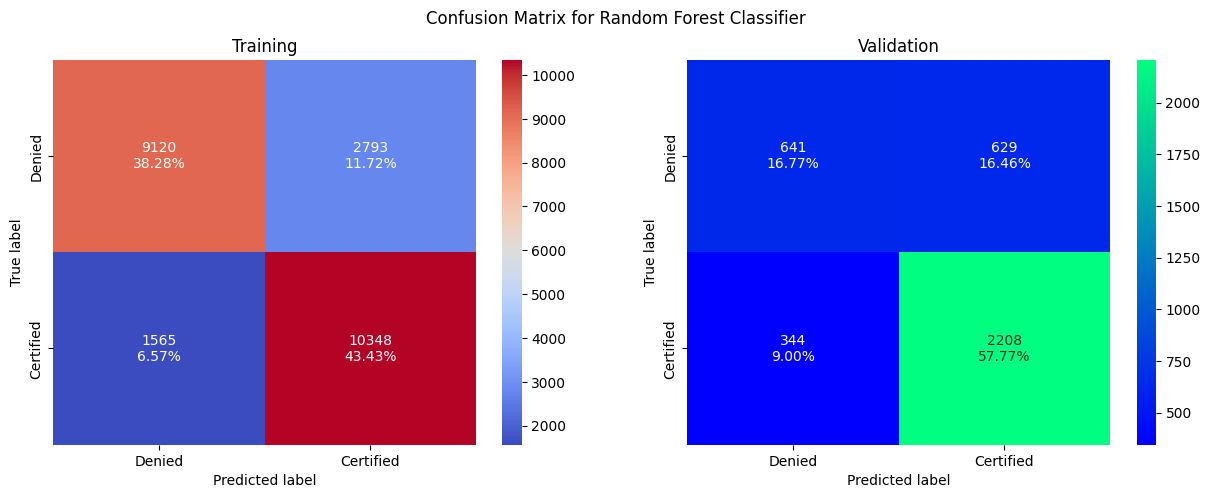

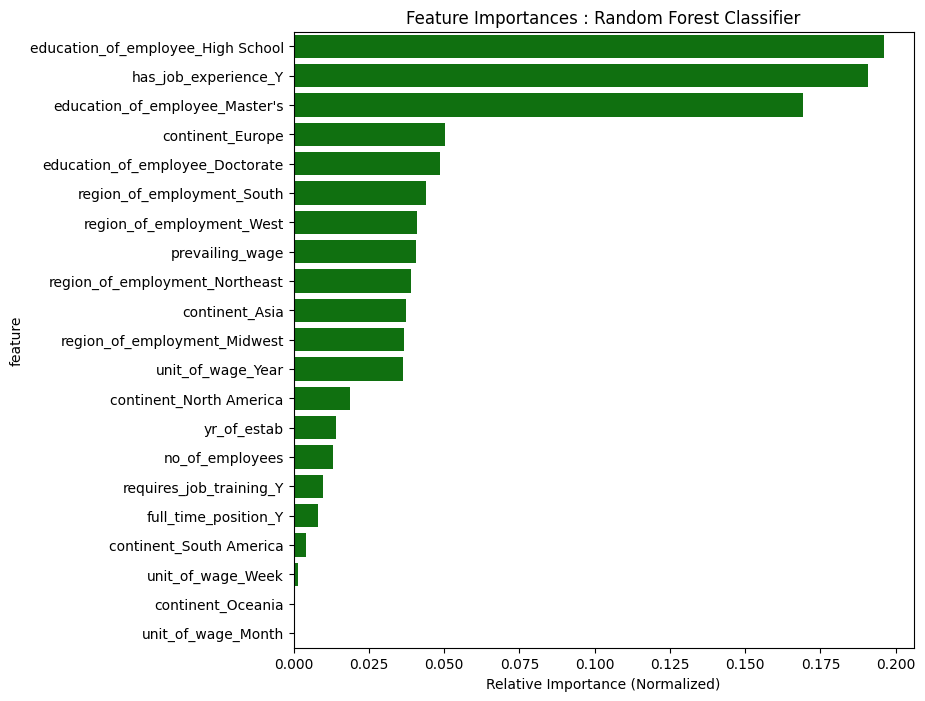

Gradient Boosting Classifier 

Param of best model by RandomizedSearchCV: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.04, 'loss': 'log_loss', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 160, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
GradientBoostingClassifier(learning_rate=0.04, max_depth=5, n_estimators=160,
                           random_state=1)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


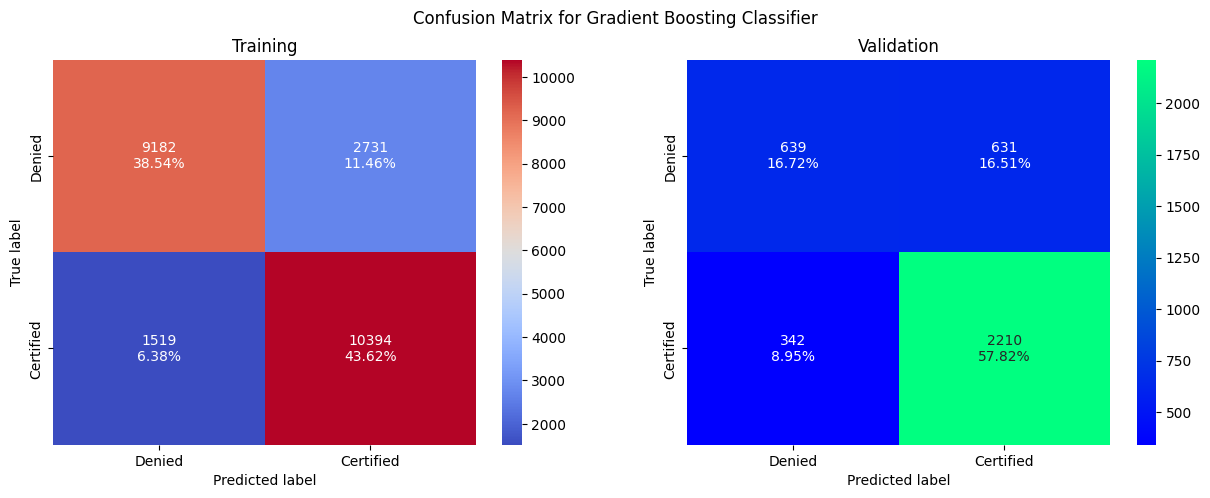

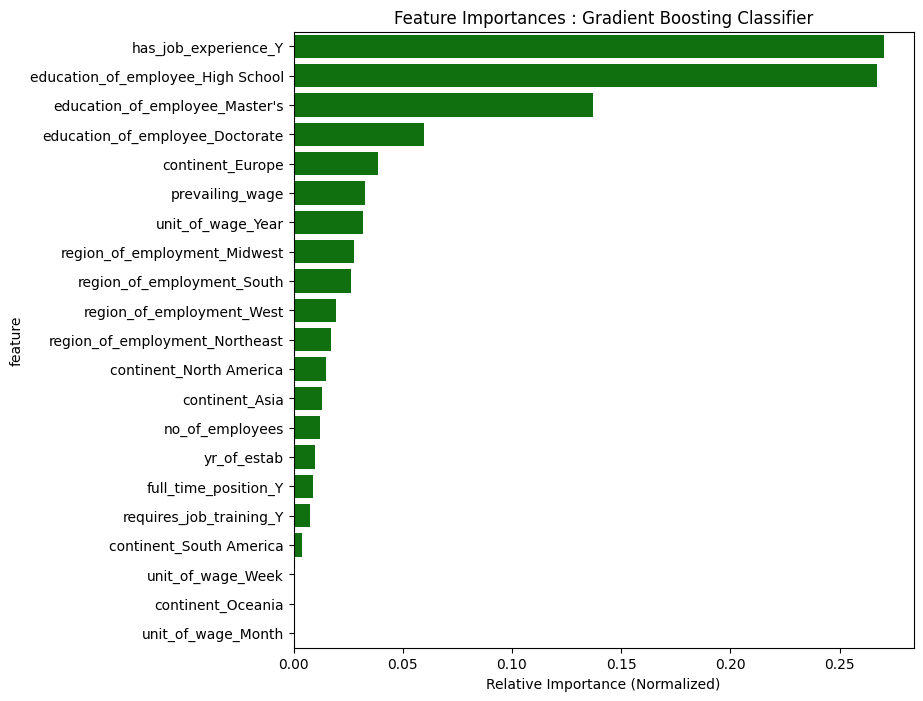

AdaBoost Classifier 

Param of best model by RandomizedSearchCV: {'algorithm': 'SAMME.R', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=5, random_state=1), 'learning_rate': 0.03, 'n_estimators': 140, 'random_state': 1}
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=1),
                   learning_rate=0.03, n_estimators=140, random_state=1)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:

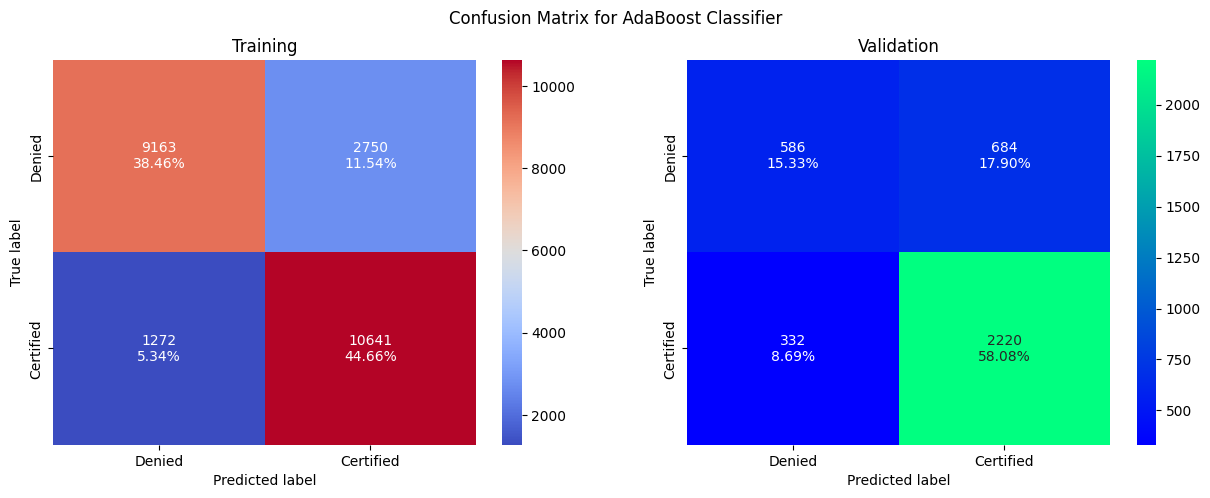

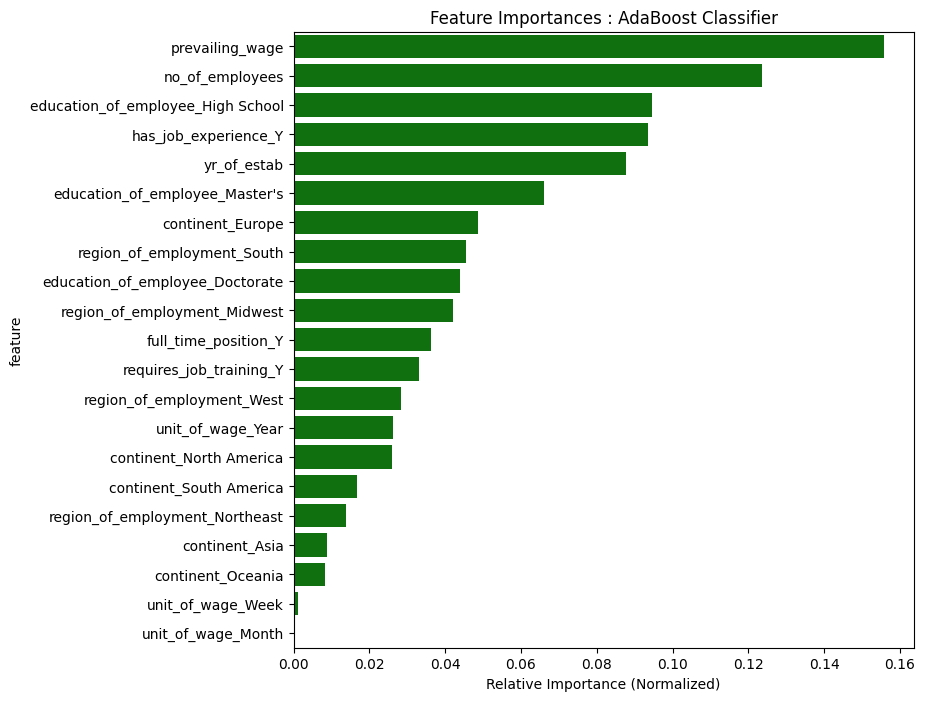

Decision Tree Classifier 

Param of best model by RandomizedSearchCV: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 1, 'splitter': 'best'}
DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=5,
                       min_samples_leaf=3, random_state=1)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


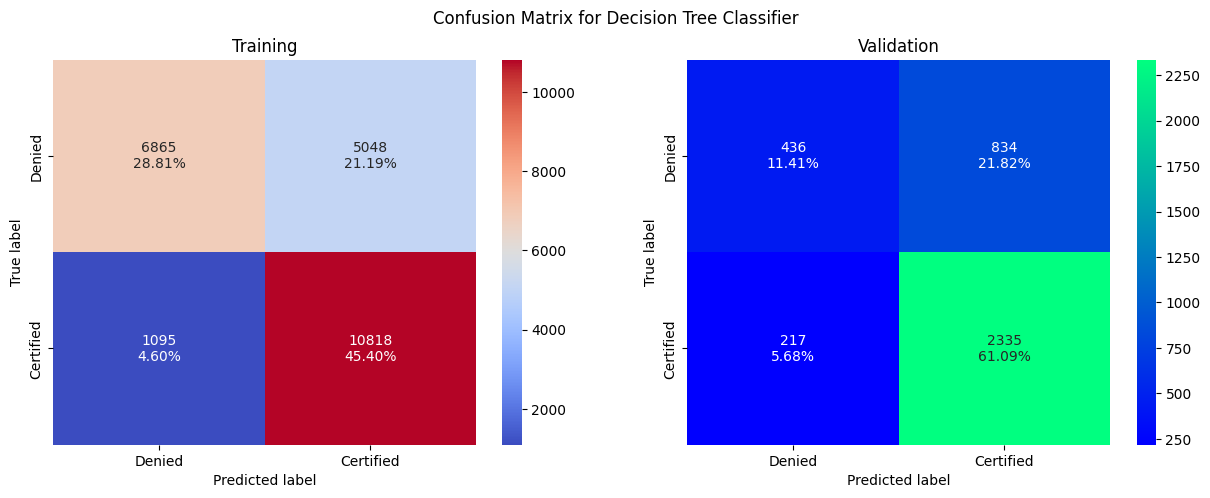

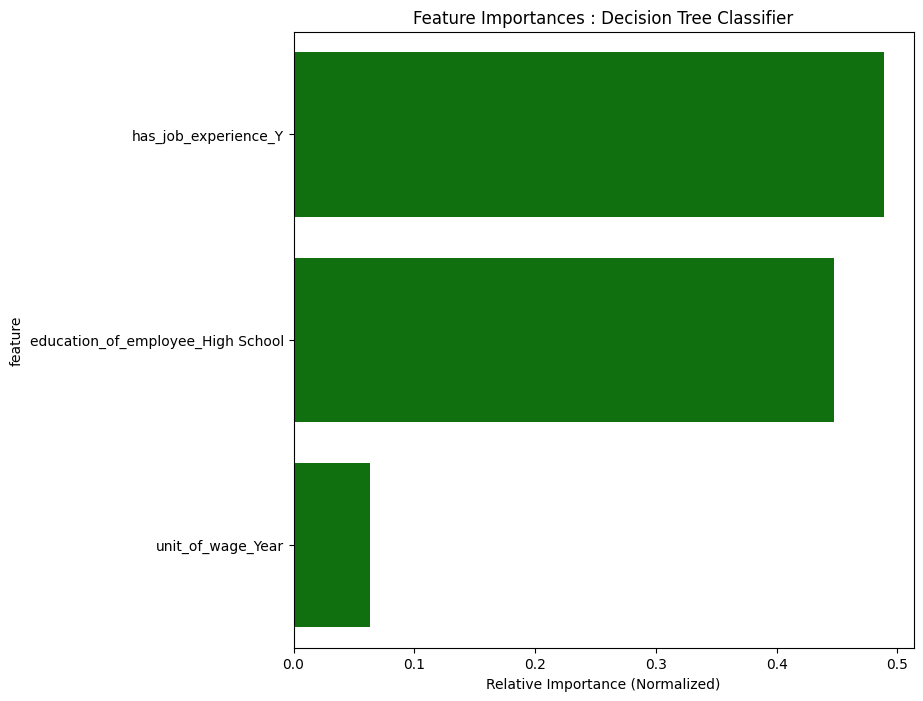

Logistic Regression 

Param of best model by RandomizedSearchCV: {'C': 0.91, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 289, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': True}
LogisticRegression(C=0.91, class_weight='balanced', max_iter=289,
                   random_state=1, warm_start=True)
Training dataset shape=(23826, 21) (Denied:11913, Certified:11913)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


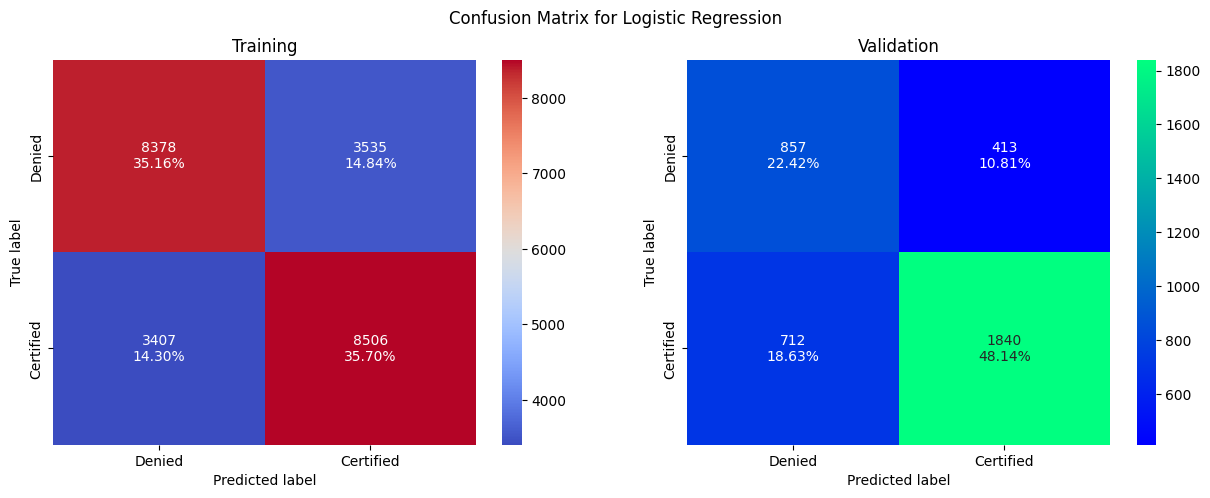

XGB Classifier 

Param of best model by RandomizedSearchCV: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': None, 'colsample_bytree': 0.7, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.04, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 190, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 1, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 2, 'subsample': 1, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
XGBClassifier(base_score=None, booster=None, call

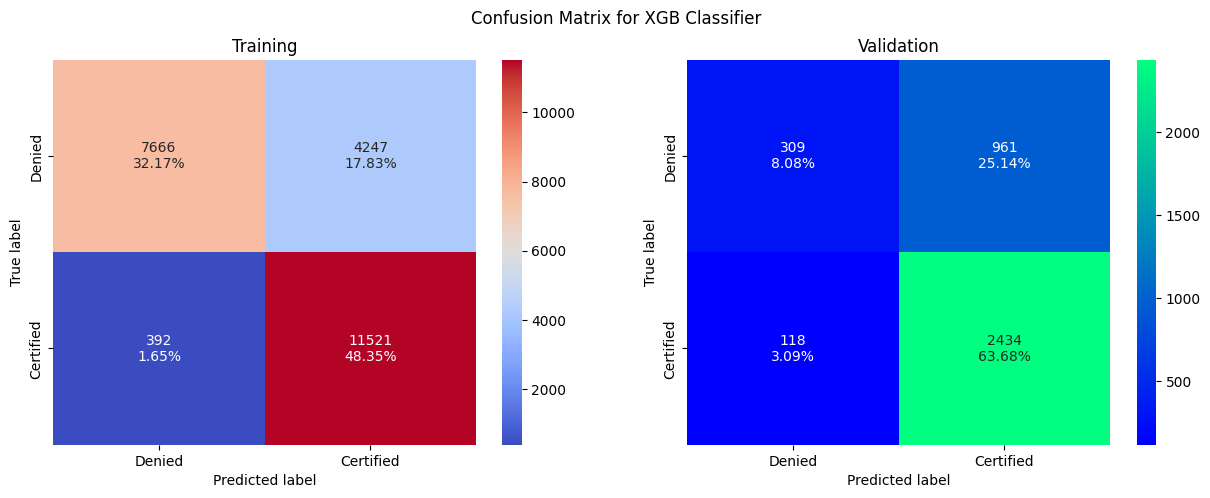

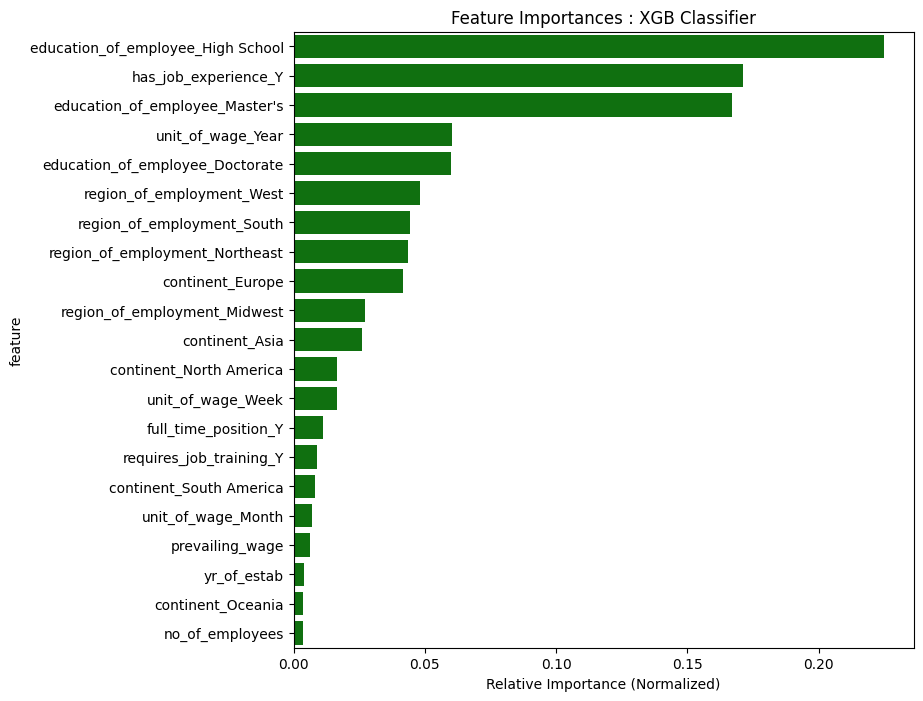

CPU times: total: 1min 17s
Wall time: 1h 8min 43s


In [75]:
%%time
print("Tune model & performance analysis for " +  get_bold_text("Over Sampled Train and Validation data"))
df_style, trained_models = tune_models_with_pipeline_of_multiple_classifier(models, tuned_param_dict, X_train_over, y_train_over, X_validation, y_validation, scorer=f1_scorer, use_grid_search = False, show_diff = True, show_conf_matx = True, random_state = 1, title=" for Over Sample Data after model Tuning")

all_trained_model[TUN][OVR] = trained_models
df_style

#### Observation
* Performance evaluation metrics on Training and Validation data set have yellow colored cells showing highest F1 Score.
* Differnce of evaluation metrics (F1) on training and validation data set have cyan colored cells showing the minimum. 
* Bagging model has overfitting as it has very high (almost 100%) Recall, Precission, and F1 on training but low on Validation set.
* XGBoost has the highest Recall and lowest precision.
* Decission Tree, and Ada Boosting have the high recall with low precision.
* Logistic Regression has the lowest F1-Score
* Gradient Boosting and Random Forest have almost same performance stat.
* **Gradient Boosting** has the best F1 score. 
* has_job_experience_Y, education_of_employee_High School, and employee_of_education_Master's are the most important features for Random Forest.

Tune model & performance analysis for Under Sampled Train and Validation data
Bagging Classifier 

Param of best model by RandomizedSearchCV: {'bootstrap': True, 'bootstrap_features': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': 'balanced', 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(class_weight='balanced', random_state=1), 'max_features': 0.95, 'max_samples': 1.0, 'n_estimators': 190, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
BaggingClassifier(bootstrap_features=True,
                  estimator=DecisionTreeClassifier(class_weight='balanced',
             

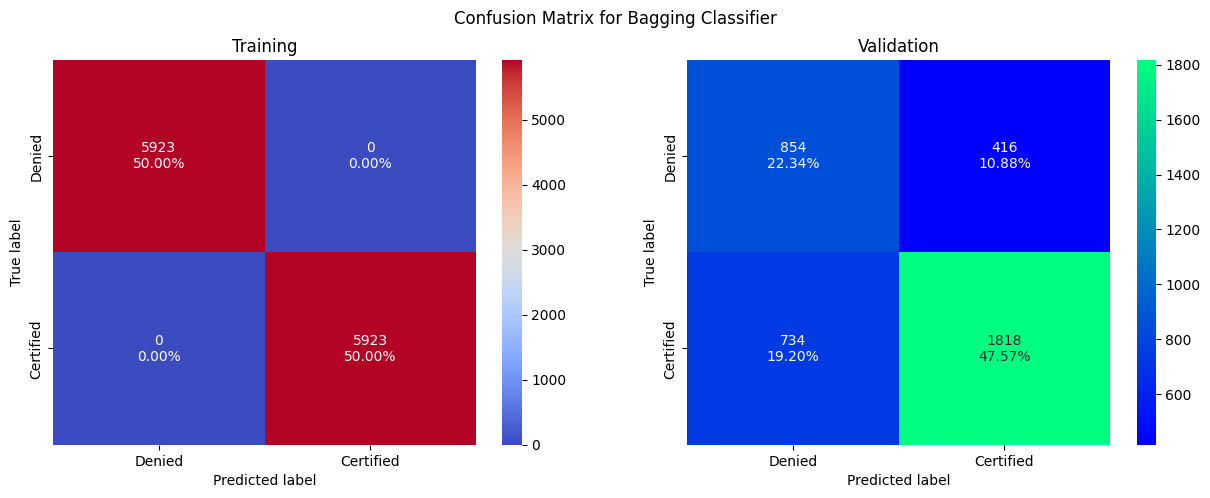

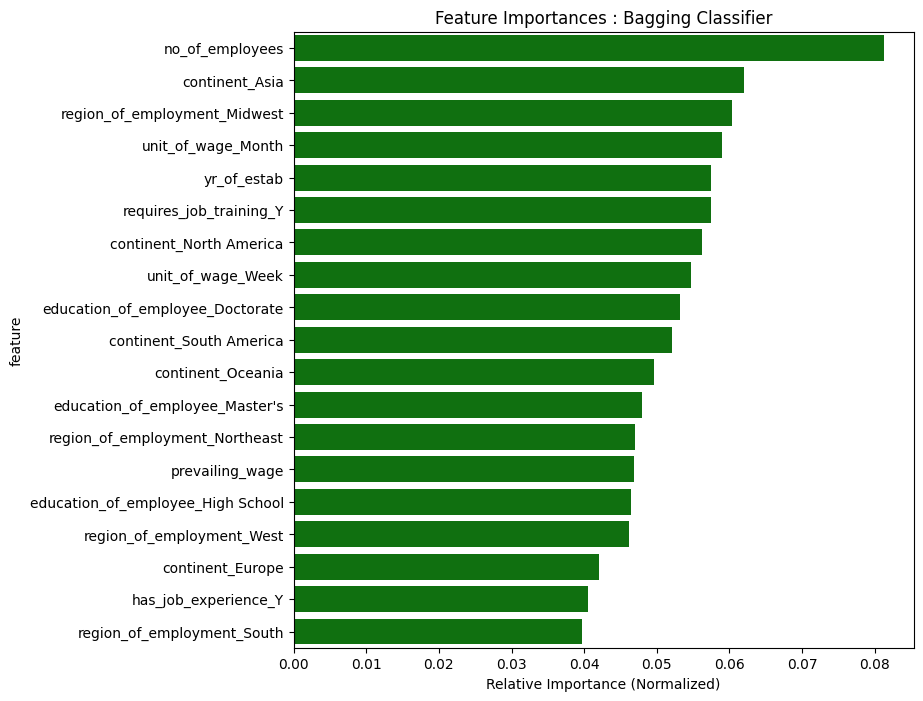

Random Forest Classifier 

Param of best model by RandomizedSearchCV: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 11, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=11, n_estimators=50, random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


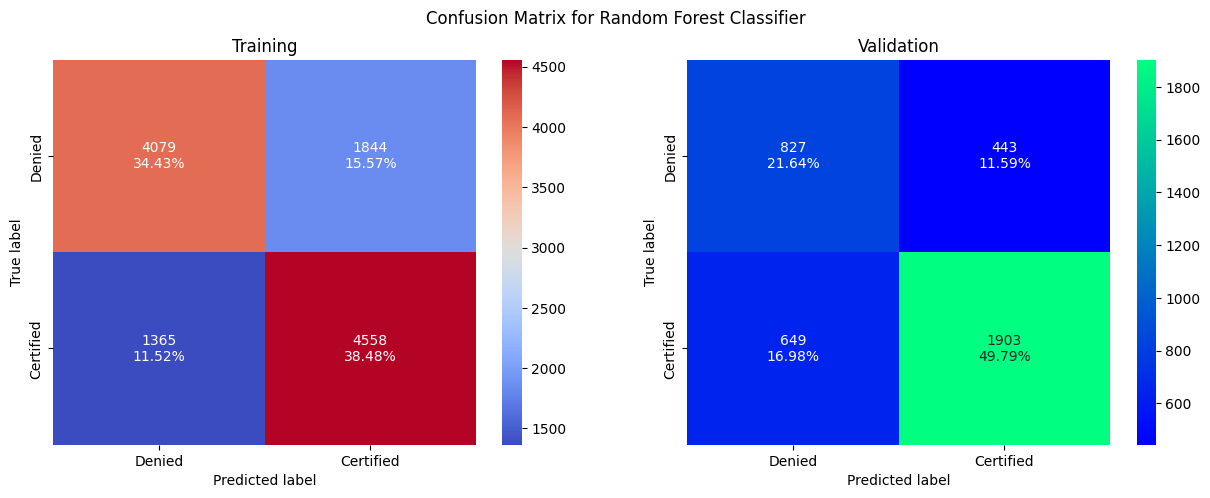

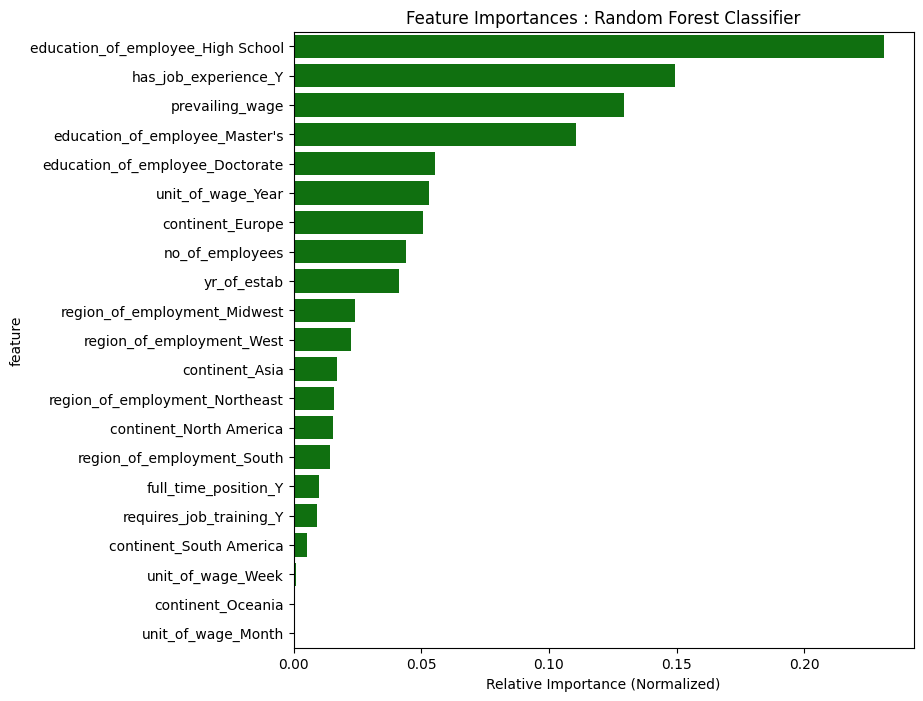

Gradient Boosting Classifier 

Param of best model by RandomizedSearchCV: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.03, 'loss': 'log_loss', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
GradientBoostingClassifier(learning_rate=0.03, max_depth=5, random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


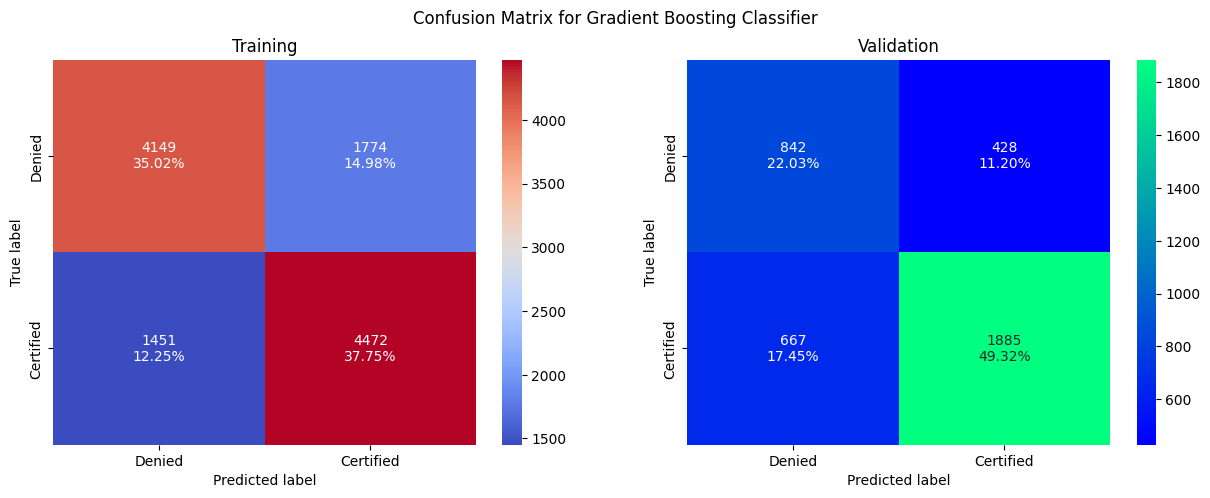

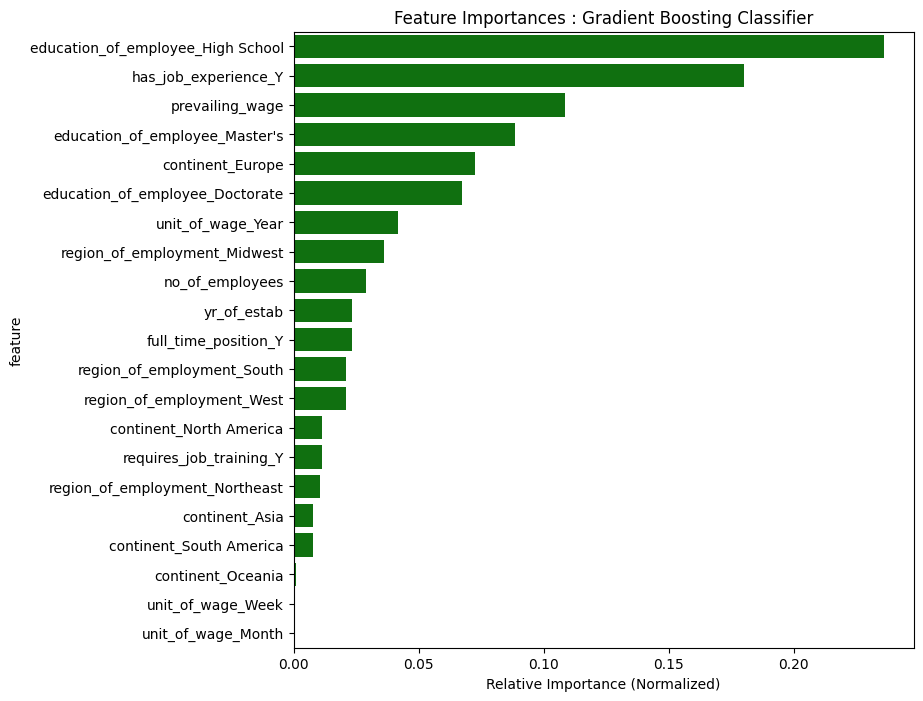

AdaBoost Classifier 

Param of best model by RandomizedSearchCV: {'algorithm': 'SAMME.R', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 6, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=6, random_state=1), 'learning_rate': 0.01, 'n_estimators': 60, 'random_state': 1}
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=60, random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552

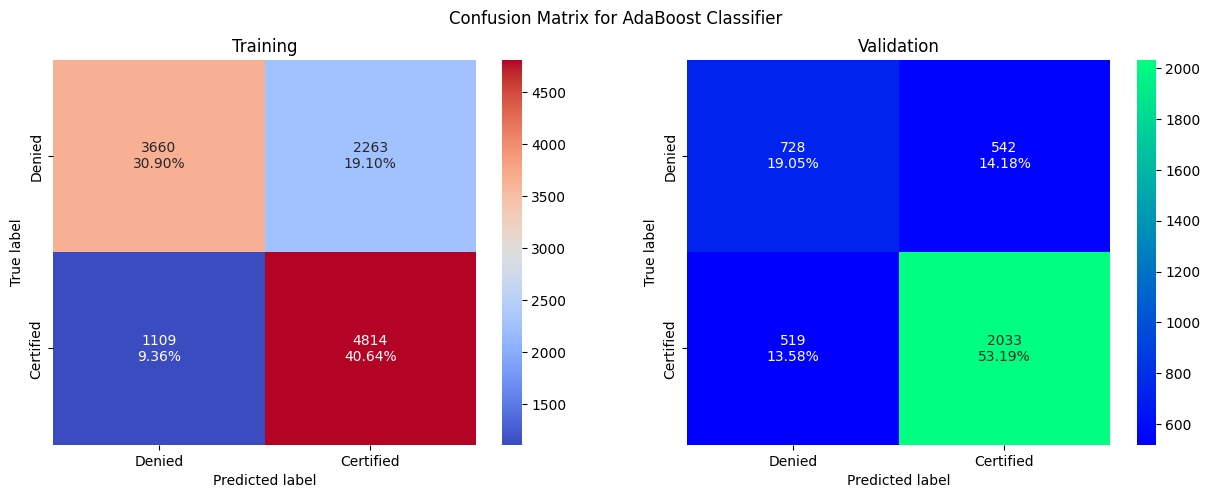

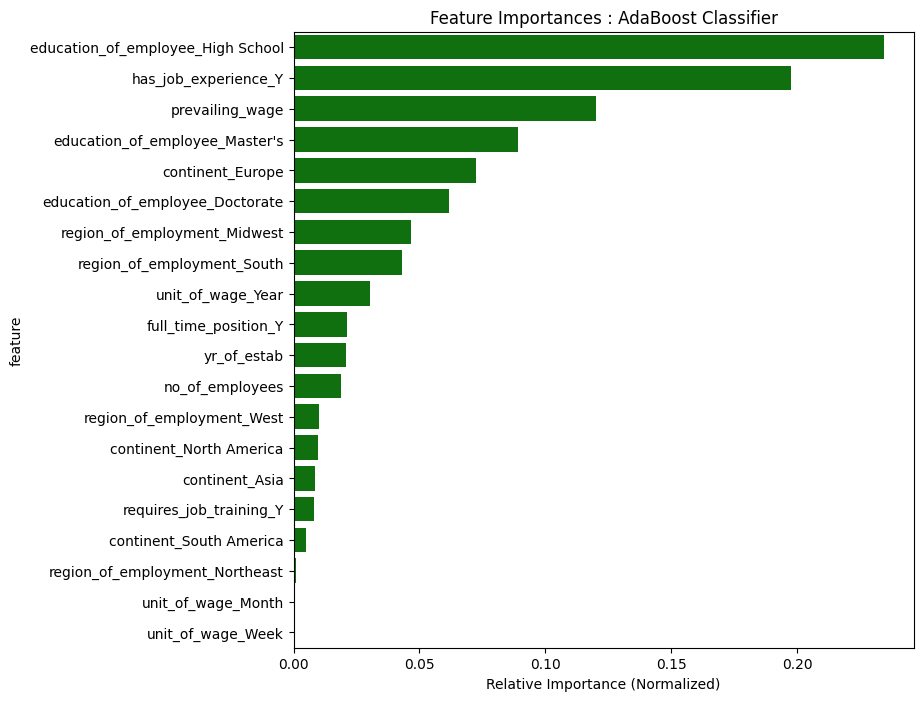

Decision Tree Classifier 

Param of best model by RandomizedSearchCV: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 1, 'splitter': 'best'}
DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_samples_leaf=3, random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


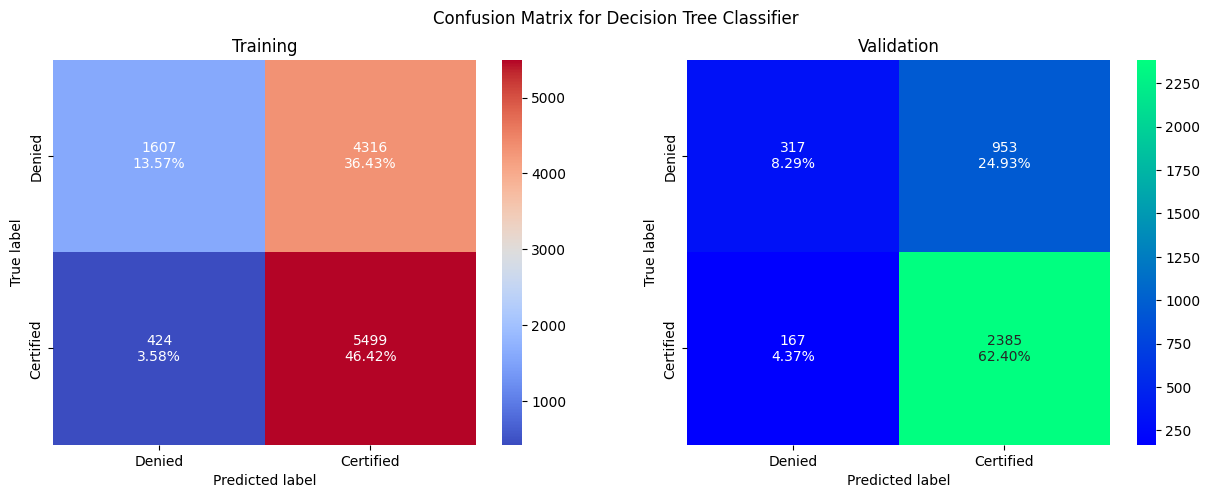

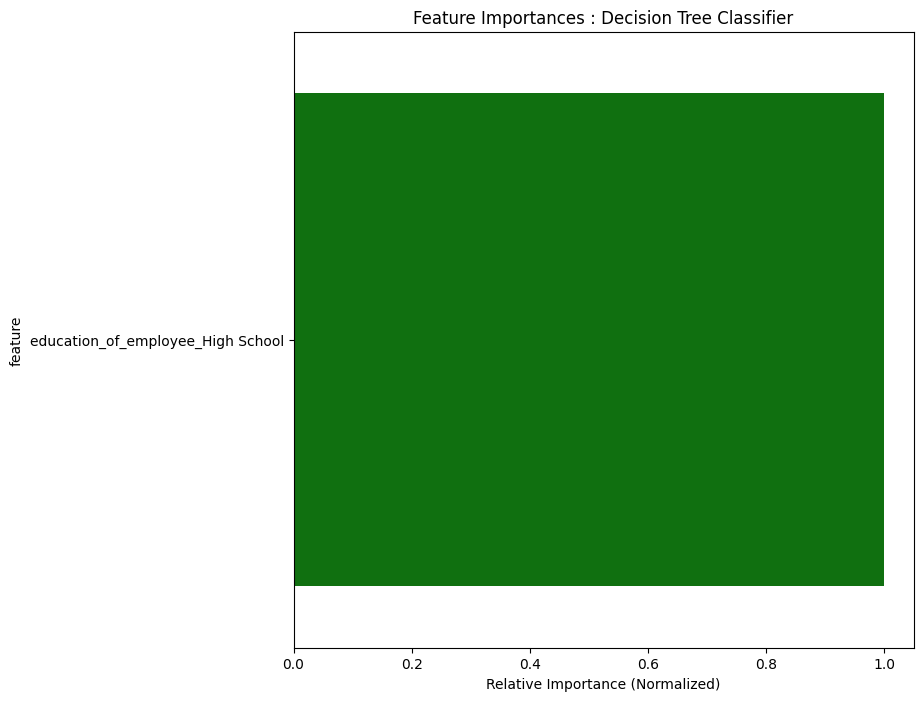

Logistic Regression 

Param of best model by RandomizedSearchCV: {'C': 0.92, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 157, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
LogisticRegression(C=0.92, class_weight='balanced', max_iter=157,
                   random_state=1)
Training dataset shape=(11846, 21) (Denied:5923, Certified:5923)
Testing/Validation  dataset shape=(3822, 21) (Denied:1270, Certified:2552)


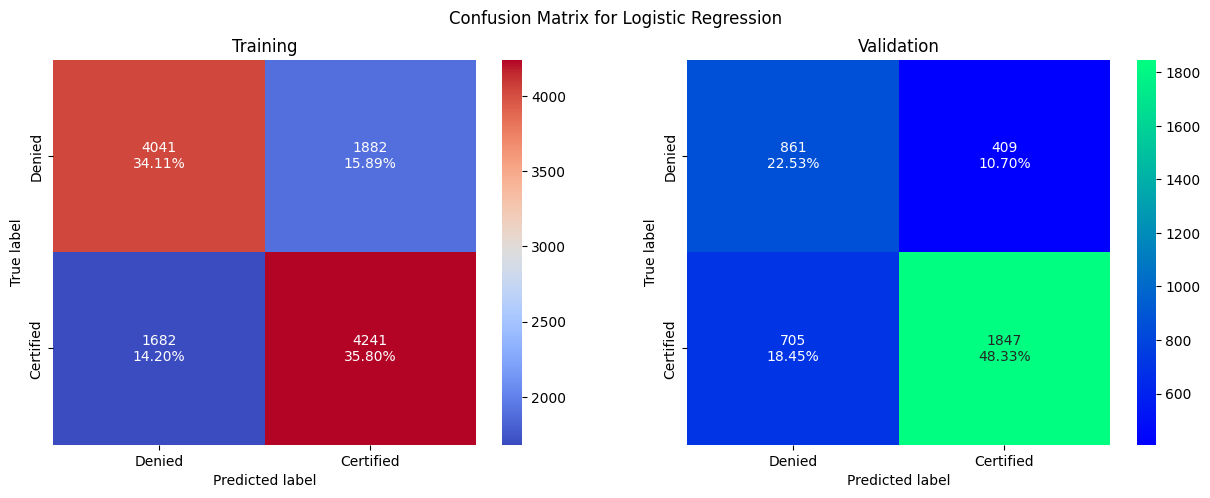

XGB Classifier 

Param of best model by RandomizedSearchCV: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': 0.7, 'colsample_bynode': None, 'colsample_bytree': 1, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 50, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 1, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 2, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
XGBClassifier(base_score=None, booster=None, call

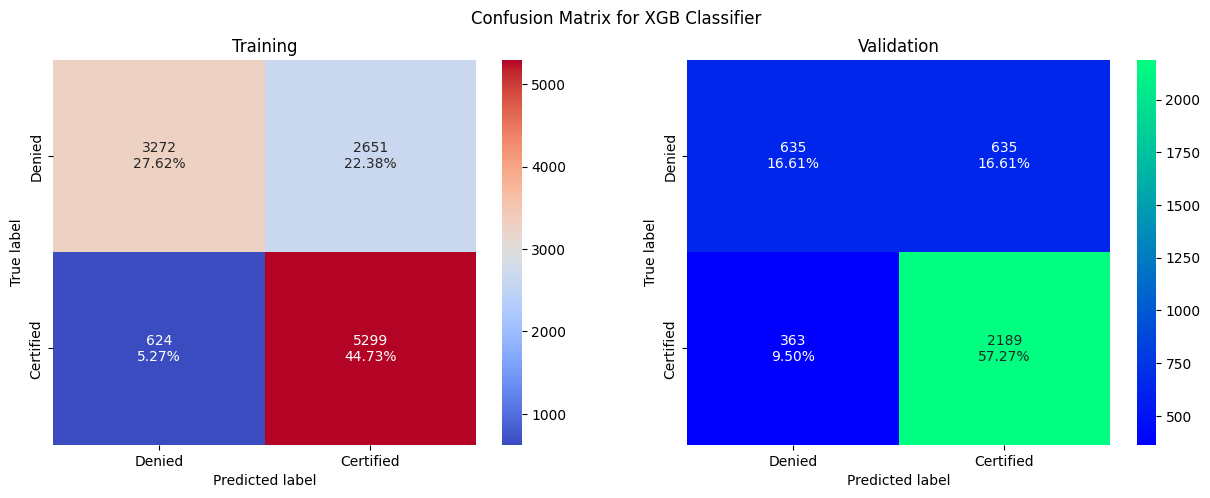

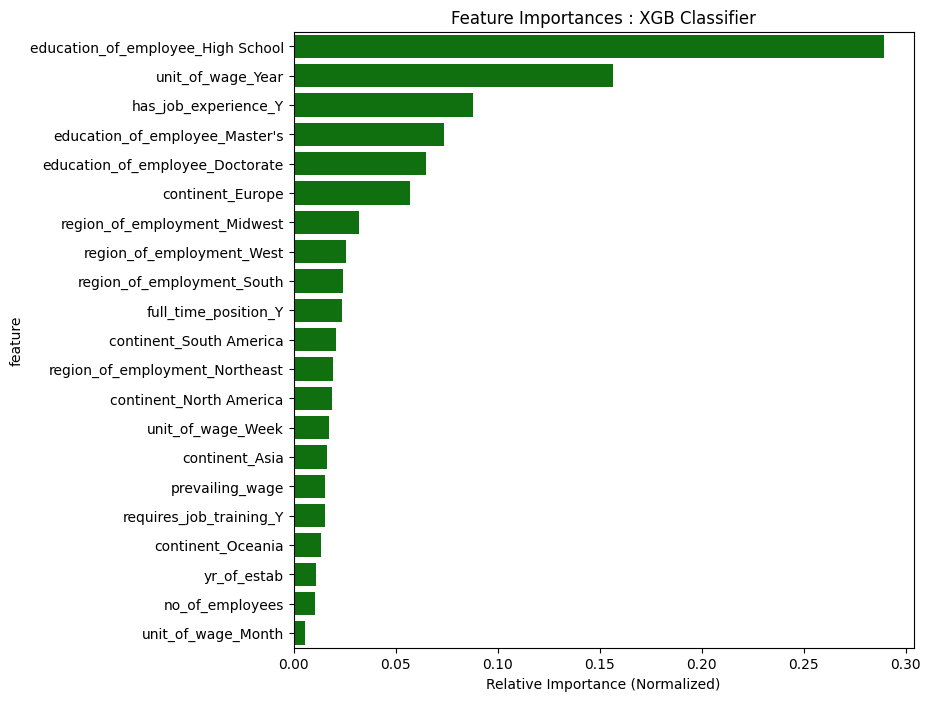

CPU times: total: 33.9 s
Wall time: 35min 38s


In [76]:
%%time
print("Tune model & performance analysis for " +  get_bold_text("Under Sampled Train and Validation data"))
df_style, trained_models = tune_models_with_pipeline_of_multiple_classifier(models, tuned_param_dict, X_train_un, y_train_un, X_validation, y_validation, scorer=f1_scorer, use_grid_search = False, show_diff = True, show_conf_matx = True, random_state = 1, title=" for Under Sample Data after model Tuning")

all_trained_model[TUN][UND] = trained_models
df_style

#### Observation
* Performance evaluation metrics on Training and Validation data set have yellow colored cells showing highest F1 Score.
* Differnce of evaluation metrics (F1) on training and validation data set have cyan colored cells showing the minimum.
* Bagging model has overfitting as it has very high (almost 100%) Recall, Precission, and F1 on training but low on Validation set.
* Random Forest, Gradient Boosting, Ada Boosting, and Logistic Regression have the lower F1-Score (.7 - .8)
* Decision Tree has high F1 but low precision. 
* **XGB** has the best F1-Score (.81)
* education_of_employee_High School, unit_of_wage_Year, has_job_exprerience are the most important features for XGB.

In [77]:
#print(all_trained_model[DEF][ORG])
# Function to generate model name by categories
# DEF = Default/Not tuned, TUN = Tuned Moded
# ORG = Original Data (without any sampling), OVR = Over Sampling of training data, UND = Under Sampling of Training Data
def get_mode_name(tune, data_type, model):
    name = ""
    if (tune == DEF) and (data_type == ORG):
        name = "{}".format(model)
    elif (tune == DEF) and (data_type == OVR):
        name = "{} with {}".format(model, OVR)
    elif (tune == DEF) and (data_type == UND):
        name = "{} with {}".format(model, UND)
    elif (tune == TUN) and (data_type == ORG):
        name = "{} {}".format(TUN, model)
    elif (tune == TUN) and (data_type == OVR):
        name = "{} {} with {}".format(TUN, model, OVR)
    elif (tune == TUN) and (data_type == UND):
        name = "{} {} with {}".format(TUN, model, UND)
    elif (tune == STACK):
        name = "{}".format(model)

    return name

# Function to show performance for best classifier for categories for training and validation dataset
def show_performance_from_best_classifiers(model_dict, models, show_diff = False, title=''):
    model_perf_record_list = []
    schema = None
    model_name = []
    
    for tune, data_type, model in models:

        name = get_mode_name(tune, data_type, model)
        model_train_perf = model_dict[tune][data_type][model][MODEL_TRAIN_PERF]
        model_test_perf =  model_dict[tune][data_type][model][MODEL_TEST_PERF]
        
        record, schema = extract_train_and_test_accuracy_add_diff(model_train_perf, model_test_perf, get_diff=show_diff)
        model_perf_record_list.append(record)
        model_name.append(name)
    
    if show_diff == True:
        return get_stylish_dataframe_for_model_evaluation(pd.DataFrame(model_perf_record_list,
                      index=pd.Index(model_name, name='Classifiers'),
                      columns=pd.MultiIndex.from_product([['Training', 'Validation', 'Diff(Training - Validation)'], schema], names=['Data set:', 'Metric:'])), show_diff, title)
    else:
        return get_stylish_dataframe_for_model_evaluation(pd.DataFrame(model_perf_record_list,
                      index=pd.Index(model_name, name='Classifiers'),
                      columns=pd.MultiIndex.from_product([['Training', 'Validation'], schema], names=['Data set:', 'Metric:'])), show_diff, title)

# Function to generate performance evaluation metric for test with style
def get_stylish_dataframe_for_model_evaluation_for_testing_dataset(model_perf_df_for_style, title=''):
    model_perf_df_style = set_common_df_style(model_perf_df_for_style.style, title=title)
    model_perf_df_style.set_table_styles({
        ('Testing', 'Accuracy'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                                   {'selector': 'td', 'props': 'border-left: 1px solid #000066'}],
      }, overwrite=False, axis=0)

        
    return model_perf_df_style


# Function to show performance for best classifier for categories for training and testing dataset
def show_performance_for_best_classifiers_on_testing_dataset(model_dict, models_with_ds, title='', 
                                                              show_conf_matx = True, is_feature_tree_available = True):
    model_perf_record_list = []
    schema = None
    model_name = []
    show_diff = False
    
    for tune, data_type, model, X_tst, y_tst, X_trn, y_trn in models_with_ds:

        name = get_mode_name(tune, data_type, model)
        
        model_train_perf = model_dict[tune][data_type][model][MODEL_TRAIN_PERF]
        classifier = model_dict[tune][data_type][model][MODEL]
        model_test_perf = model_performance_classification_sklearn(classifier, X_tst, y_tst)
    
        #Creating confusion matrix
        if show_conf_matx == True:
            print("Training dataset shape={} ({}:{}, {}:{})".format(X_trn.shape, classes[0], sum(y_trn == 0), classes[1], sum(y_trn == 1)))
            print("Testing  dataset shape={} ({}:{}, {}:{})".format(X_tst.shape, classes[0], sum(y_tst == 0), classes[1], sum(y_tst == 1)))
            y_trn_pred = classifier.predict(X_trn)
            y_tst_pred = classifier.predict(X_tst)
            confusion_matrix_sklearn("Best Model: " + name, y_trn, y_trn_pred, y_tst, y_tst_pred, True)
    
        if is_feature_tree_available == True:
            feature_names = X_trn.columns
            show_feature_importance(classifier, "Best Model (" + name + ")", feature_names)
        
   
        
        record, schema = extract_train_and_test_accuracy_add_diff(model_train_perf, model_test_perf, get_diff=show_diff)
        model_perf_record_list.append(record)
        model_name.append(name)
    
    
    return get_stylish_dataframe_for_model_evaluation_for_testing_dataset(pd.DataFrame(model_perf_record_list,
                      index=pd.Index(model_name, name='Classifiers'),
                      columns=pd.MultiIndex.from_product([['Training', 'Testing'], schema], names=['Data set:', 'Metric:'])), title)



### Stacking Model Building

Building model & performance analysis for Stacked Models
Building Model for Classifier: Stacked Model
StackingClassifier(estimators=[('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Gradient Boosting Over Sampling',
                                GradientBoostingClassifier(random_state=1)),
                               ('Tuned Gradient Boosting Over Sampling',
                                GradientBoostingClassifier(learning_rate=0.04,
                                                           max_depth=5,
                                                           n_estimators=160,
                                                           random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, boo...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                        

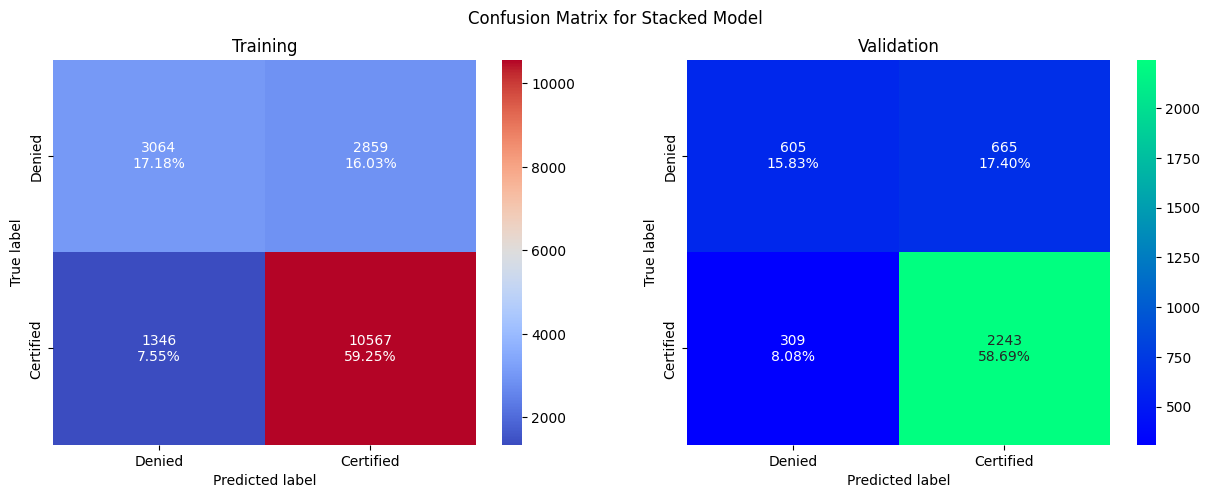

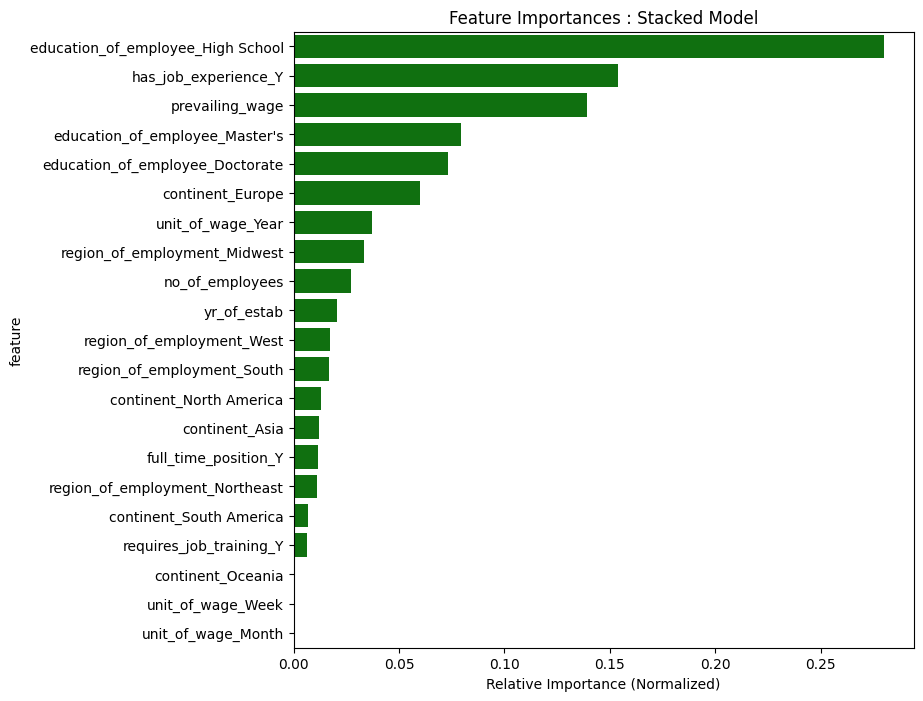

In [95]:
models = []
# We generate Stack Model.
# It takes base line estimator. We use two Gradient Boosting models (on original/regular training set, Oversampling training set) and
# another tune Gradient Boosting model on Over Sampling training set.

# Final estimator is Tuned XGB classifier that trained on original/regular training set)
STACK = 'Stacked Model'

estimators = [
    ('Gradient Boosting', all_trained_model[DEF][ORG][GBM][MODEL]),
    ('Gradient Boosting Over Sampling', all_trained_model[DEF][OVR][GBM][MODEL]),
    ('Tuned Gradient Boosting Over Sampling', all_trained_model[TUN][OVR][GBM][MODEL])]


models.append((STACK, StackingClassifier(
    estimators=estimators, final_estimator=all_trained_model[TUN][ORG][XGB][MODEL])
))

# Building Stacked model and validating models on Validation data
print("Building model & performance analysis for " +  get_bold_text("Stacked Models"))
df_style, trained_models = build_models_with_pipeline_of_multiple_classifier(models, X_train, y_train, X_validation, y_validation, show_conf_matx=True, show_diff=True, title='for Stacked Models')
tmp_dict = {}
tmp_dict[STACK] = trained_models
# We stored STACK model separate to avoid any collision. 
all_trained_model[STACK]=tmp_dict
df_style




### Observation
* We build a Stack Models of all best Gradient Boosing models as base classifiers and Tune ADA boosting as a final classifier.
* Stack Model shows high F1 (.821) with high precision (.77)
* education_of_the_employee_High School, has_job_experience_Y, and prevailing_wage are the top features.

## Model Performances - Summary

* We trained our models under Six categories:
   * models/classifiers on original training dataset, over sampled training dataset, and under sampled training dataset.
   * Tuned models/classifiers on original training dataset, over sampled training dataset, and under sampled training dataset.
   * We have selected the following four best models among them.

In [86]:
print("performance analysis for " +  get_bold_text("Best Models of each category on Train and Validation data"))
df_style = show_performance_from_best_classifiers(all_trained_model, [(DEF,ORG,GBM),(DEF,OVR,GBM),(TUN,ORG,XGB), (TUN,OVR,GBM),(TUN,UND,XGB),(STACK,STACK,STACK)], show_diff = False, title=" for best models from each category")
df_style


performance analysis for Best Models of each category on Train and Validation data


#### Observation
* Performance evaluation metrics on Training and Validation data set have yellow colored cells showing highest F1 Score (.8223) and highest Recall (.89).
* The rest of the models have almost similar F1-Score, Recall. However, **Tuned XGB Classifier** has the best F1-Score (.8223).
* Considering all of them, **Tuned XGB Classifier** has been chosen as the best model/classifier as it has highest F1-Score. 


## Best Model Performance On Testing Dataset

Best model is: Tuned  XGB Classifier
Training dataset shape=(17836, 21) (Denied:5923, Certified:11913)
Testing  dataset shape=(3822, 21) (Denied:1269, Certified:2553)


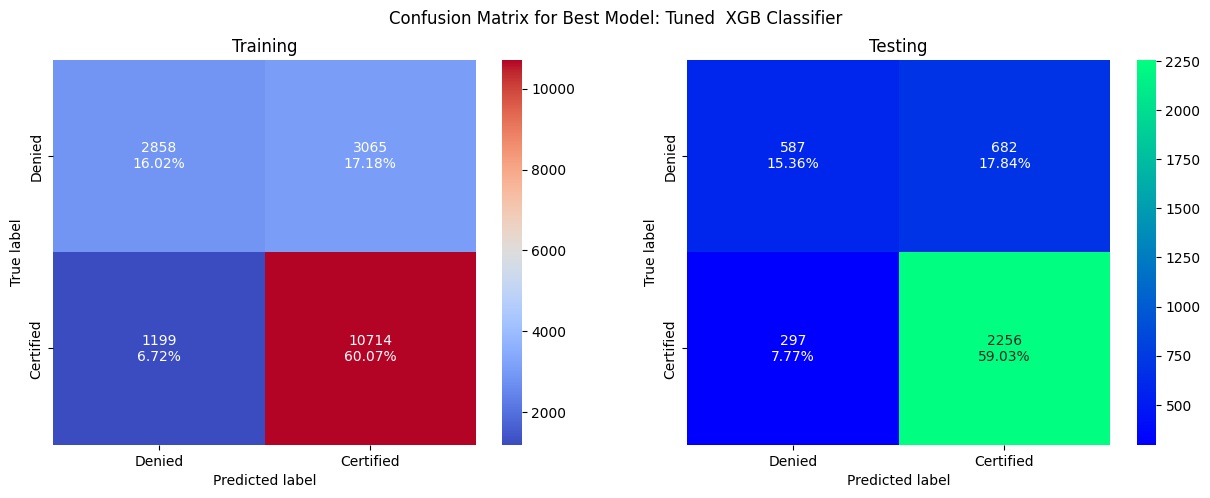

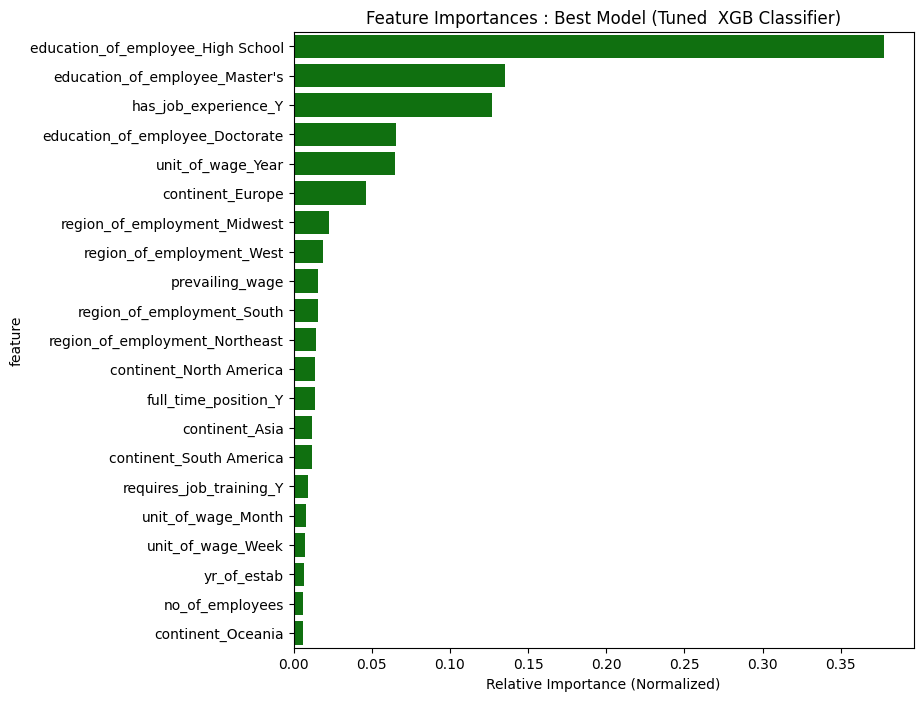

In [88]:
model_name = get_mode_name(TUN, ORG, XGB)
print("Best model is: {}".format(model_name))

best_model = [(TUN, ORG, XGB, X_test, y_test, X_train, y_train)]
show_performance_for_best_classifiers_on_testing_dataset(all_trained_model, best_model, title=' for best model ' + model_name)

#### Observation
* **Tuned XGB** shows the good F1-Score (.83) in both Training and (.822) in Testing dataset. 
* As we have imbalanced data (number of denied cases is very low to accepted cases), higher false positive is expected.
* **education_of_employee_High School, education_of_employee_Masters, has_job_exprerience_Y, education_of_employee_Doctorate, unit_of_wage_Year, continent_Europe** are the top important features of XGB classifier.
* Considering all of them, **Tuned XGB** has been chosen as the best model/classifier for production model deployment. 


## Actionable Insights and Recommendations

### Data Insight
* Dataset is imbalanace. 66.8% of applications are accepted and 33.2% of them are denied.
* 89.4% of applications are for full time.
* Application with prevailing_wage has more chance to be accepted
* Europe has the highest percentage (79%) of accepted applications and South American has the lowest percentage (57.8%)
* It seems that education_of_employee has a strong correlation with certified visa application. 87% of applications with Doctoral degree have been accepted.
* Applicants with job experience have higher chance (74%) to get their visa applications certfied.
* Midwest has the highest percentage (97%) of certified/accepted visa application. Northeast, South, and West receive most of the visa requests.
* Application with yearly job contract (unit of wage) has higher percentage(70%) chance to be accepted. 

### Actionable Items
Different job profiles can be designed and implemented based on the data analysis for initial scrutiny. 
For example, Applicant with higher educational degree, job experience, full time role with high yearly salary contract has a high chance to get his/her visa accepted. 
In the same way, another profile can be created geographically, like applicants from Europe/Asia applying jobs in Midwest and South region of USA have higher chance to get visa.   



### Machine Learning Model Insight
* We build models based on the past visa application dataset. The dataset has 25480 rows and 12 columns. The dataset is imbalance. Therefore, several techniques have been used (e.g., over sampling, undersampling, etc.) during model building and evaluation.
*  We took 7 base classifiers, build models on training data and validate it on valiadation dataset. We use F1-score for model evaluation as it balance both recall and precission as our objective is to minimize any prediction error and to increase efficiency. We apply over and under sampling to balance data set and use the base classifers to build models.  
Moreover, we tuned them models and finally select the best models based on F1-Score.
* We chose best models from each categories and apply stacking to see if performance improves.
* Finally, we choose the best model (**Tuned XGB Classifier**) with highest F1-Score (.82) on validation dataset. It also shows the similar F1-Score in test dataset (.82). 
*  **education_of_employee_High School, education_of_employee_Masters, has_job_exprerience_Y, education_of_employee_Doctorate, unit_of_wage_Year, continent_Europe**
 
### Actionable Items
* The machine learning model can be integrated to visa application process to reduce manual intervention and expedite the process.
* Model selection criteria can be discussed and evaluated as necessary.
* A quick short list process can be developed using top most important feature of the model. 

### Business Recommendation
* Based on available data analysis, and important model features, business can screen applications in multiple levels and sets a high priority/score. First, sorting by higher education, e.g., doctoral, masters, and high schools. Second, by job experience. Higher job experiences should be approved for visa., Third, wage/salary package, higher the better. Finally, job location (e.g., Midwest has more chance to be accepted), and applicant country (e.g., Europre has higher chance). Consequencely, any application that doesn't meet this will have lower priority/score and is subjected to quick denial.  

* Enforcing minimum requirement: OFLC can set the minimum requirement of applying the visa. For example, applicant should have minimum Bachelor degree with a 1-2 year job experience and atleast 40K yearly salary contract for full time position to apply for work visa.
* Asking business for more information like job sector, job level, application age, etc. for future model retrain, and deployment.
* Asking business for more data for model retrain and increase model performance in the future.   




<font size=6 color='blue'>Power Ahead</font>
___